# [Personal Project]
---
> ## * Subject: SALARY PREDICTION of Players who sign a FA Contract
>![](http://news.sportslogos.net/wp-content/uploads/2014/09/MLB.png)
>---
> ## * Content:
>    * The goal of this project is to predict the 2018 FA Salaries of qualified players in 2018 based on many data that analized stats of players in the past. (Based on the FA results from 2006 to 2017)
>
>    * The 2018 FA Salaries are predicted by 2017 stats(2017.04 ~ 2017.10)
>
>    * **Analysis : Regression**
>---
> ## * Composition of data
>    * Rows : 1,225
>    * Columns : 72
>    * Dependent Variable : Salary(Y)
>    * Independent Variables : All variables except Dependent Variable
>---
> ## * Process of Progress
>    * EDA(Exploratory data analysis)
>    * Feature selection
>    * Modeling(OLS Regression)
>    * Cross Validation
>    * Model selection

**---**
** 'Import' all the necessary packages **

In [1]:
from sklearn.preprocessing import normalize, LabelEncoder
from patsy import dmatrix
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn import cross_validation
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../dataset/mlb_fa_list2.csv')

print(df.shape)
df.tail()

(1225, 72)


Name    Yr          Team    G     AB     PA    H_b     1B  \
1220      Trevor Plouffe  2016         Twins   84  319.0  344.0   83.0   57.0   
1221          Tyson Ross  2016        Padres    1    0.0    0.0    0.0    0.0   
1222  Welington Castillo  2016  Diamondbacks  113  416.0  457.0  110.0   72.0   
1223        Wilson Ramos  2016     Nationals  131  482.0  523.0  148.0  101.0   
1224     Yoenis Cespedes  2016          Mets  132  479.0  543.0  134.0   77.0   

        2B   3B  HR_b   R_b   RBI  BB_b  IBB_b   SO_b  BB%    K%  BB/K  \
1220  13.0  1.0  12.0  35.0  47.0  19.0    0.0   60.0  5.5  17.4  0.32   
1221   0.0  0.0   0.0   0.0   0.0   0.0    0.0    0.0  0.0   0.0  0.00   
1222  24.0  0.0  14.0  41.0  68.0  33.0    3.0  121.0  7.2  26.5  0.27   
1223  25.0  0.0  22.0  58.0  80.0  35.0    2.0   79.0  6.7  15.1  0.44   
1224  25.0  1.0  31.0  72.0  86.0  51.0    8.0  108.0  9.4  19.9  0.47   

      BABIP_b  HBP_b   SF   SH   GDP   SB   CS  Def    ISO   wOBA  wRAA  \
1220    0.284    2.0  3.0  1.0  11.0  1.0  0.0 -8.4  0.160  0.311  -2.1   
1221    0.000    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000  0.000   0.0   
1222    0.337    4.0  4.0  0.0   5.0  2.0  0.0  9.8  0.159  0.319   0.4   
1223    0.327    2.0  4.0  0.0  17.0  0.0  0.0  8.4  0.189  0.361  18.7   
1224    0.298    7.0  6.0  0.0  14.0  3.0  1.0 -9.2  0.251  0.369  22.8   

        AVG    OBP    SLG    OPS  WAR   wRC+   WPA    W    L   GS   CG   IP  \
1220  0.260  0.303  0.420  0.723 -0.4   91.0  0.50  0.0  0.0  0.0  0.0  0.0   
1221  0.000  0.000  0.000  0.000  0.1    0.0 -0.24  0.0  1.0  1.0  0.0  5.1   
1222  0.264  0.322  0.423  0.745  1.6   91.0  0.64  0.0  0.0  0.0  0.0  0.0   
1223  0.307  0.354  0.496  0.850  3.4  124.0  2.58  0.0  0.0  0.0  0.0  0.0   
1224  0.280  0.354  0.530  0.884  3.2  135.0  3.21  0.0  0.0  0.0  0.0  0.0   

      H_p  HR_p  BB_p  SO_p  R_p   SV   BS   BK   ER  HBP_p  HLD  IBB_p  ShO  \
1220  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   
1221  9.0   0.0   1.0   5.0  8.0  0.0  0.0  0.0  7.0    2.0  0.0    0.0  0.0   
1222  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   
1223  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   
1224  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   

       TBF   WP  HR/9  BB/9   K/9  K/BB  K-BB%   GB%  HR/FB  LOB%    ERA  \
1220   0.0  0.0   0.0  0.00  0.00   0.0    0.0   0.0    0.0   0.0   0.00   
1221  27.0  1.0   0.0  1.69  8.44   5.0   14.8  47.4    0.0  33.3  11.81   
1222   0.0  0.0   0.0  0.00  0.00   0.0    0.0   0.0    0.0   0.0   0.00   
1223   0.0  0.0   0.0  0.00  0.00   0.0    0.0   0.0    0.0   0.0   0.00   
1224   0.0  0.0   0.0  0.00  0.00   0.0    0.0   0.0    0.0   0.0   0.00   

      BABIP_p   FIP  WHIP  Contract Yrs  Total Salary($)  Avg Salary($)  
1220    0.000  0.00  0.00           1.0        5250000.0      5250000.0  
1221    0.474  2.96  1.88           1.0        6000000.0      6000000.0  
1222    0.000  0.00  0.00           2.0       13000000.0      6500000.0  
1223    0.000  0.00  0.00           2.0       12500000.0      6250000.0  
1224    0.000  0.00  0.00           4.0      110000000.0     27500000.0

In [4]:
df.rename(columns={"wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs"}, inplace=True)
df.rename(columns={"BB%": "BB_Percent", "K%": "K_Percent", "K-BB%": "K_BB_Percent", "GB%": "GB_Percent",
                   "LOB%": "LOB_Percent"}, inplace=True)
df.rename(columns={"Avg Salary($)": "Salary", "Total Salary($)" : "Total_Salary"}, inplace=True)
df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples"}, inplace=True)
df.rename(columns={"BB/K" : "BB_per_K", "HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                   "HR/FB" : "HR_per_FB"}, inplace=True)

df.tail()

Name    Yr          Team    G     AB     PA    H_b   Hits  \
1220      Trevor Plouffe  2016         Twins   84  319.0  344.0   83.0   57.0   
1221          Tyson Ross  2016        Padres    1    0.0    0.0    0.0    0.0   
1222  Welington Castillo  2016  Diamondbacks  113  416.0  457.0  110.0   72.0   
1223        Wilson Ramos  2016     Nationals  131  482.0  523.0  148.0  101.0   
1224     Yoenis Cespedes  2016          Mets  132  479.0  543.0  134.0   77.0   

      Doubles  Triples  HR_b   R_b   RBI  BB_b  IBB_b   SO_b  BB_Percent  \
1220     13.0      1.0  12.0  35.0  47.0  19.0    0.0   60.0         5.5   
1221      0.0      0.0   0.0   0.0   0.0   0.0    0.0    0.0         0.0   
1222     24.0      0.0  14.0  41.0  68.0  33.0    3.0  121.0         7.2   
1223     25.0      0.0  22.0  58.0  80.0  35.0    2.0   79.0         6.7   
1224     25.0      1.0  31.0  72.0  86.0  51.0    8.0  108.0         9.4   

      K_Percent  BB_per_K  BABIP_b  HBP_b   SF   SH   GDP   SB   CS  Def  \
1220       17.4      0.32    0.284    2.0  3.0  1.0  11.0  1.0  0.0 -8.4   
1221        0.0      0.00    0.000    0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1222       26.5      0.27    0.337    4.0  4.0  0.0   5.0  2.0  0.0  9.8   
1223       15.1      0.44    0.327    2.0  4.0  0.0  17.0  0.0  0.0  8.4   
1224       19.9      0.47    0.298    7.0  6.0  0.0  14.0  3.0  1.0 -9.2   

        ISO   wOBA  wRAA    AVG    OBP    SLG    OPS  WAR  wRC_Plus   WPA  \
1220  0.160  0.311  -2.1  0.260  0.303  0.420  0.723 -0.4      91.0  0.50   
1221  0.000  0.000   0.0  0.000  0.000  0.000  0.000  0.1       0.0 -0.24   
1222  0.159  0.319   0.4  0.264  0.322  0.423  0.745  1.6      91.0  0.64   
1223  0.189  0.361  18.7  0.307  0.354  0.496  0.850  3.4     124.0  2.58   
1224  0.251  0.369  22.8  0.280  0.354  0.530  0.884  3.2     135.0  3.21   

        W    L   GS   CG   IP  H_p  HR_p  BB_p  SO_p  R_p   SV   BS   BK   ER  \
1220  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
1221  0.0  1.0  1.0  0.0  5.1  9.0   0.0   1.0   5.0  8.0  0.0  0.0  0.0  7.0   
1222  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
1223  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
1224  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   

      HBP_p  HLD  IBB_p  ShO   TBF   WP  HR_per_9  BB_per_9  K_per_9  \
1220    0.0  0.0    0.0  0.0   0.0  0.0       0.0      0.00     0.00   
1221    2.0  0.0    0.0  0.0  27.0  1.0       0.0      1.69     8.44   
1222    0.0  0.0    0.0  0.0   0.0  0.0       0.0      0.00     0.00   
1223    0.0  0.0    0.0  0.0   0.0  0.0       0.0      0.00     0.00   
1224    0.0  0.0    0.0  0.0   0.0  0.0       0.0      0.00     0.00   

      K_per_BB  K_BB_Percent  GB_Percent  HR_per_FB  LOB_Percent    ERA  \
1220       0.0           0.0         0.0        0.0          0.0   0.00   
1221       5.0          14.8        47.4        0.0         33.3  11.81   
1222       0.0           0.0         0.0        0.0          0.0   0.00   
1223       0.0           0.0         0.0        0.0          0.0   0.00   
1224       0.0           0.0         0.0        0.0          0.0   0.00   

      BABIP_p   FIP  WHIP  Contract_Yrs  Total_Salary      Salary  
1220    0.000  0.00  0.00           1.0     5250000.0   5250000.0  
1221    0.474  2.96  1.88           1.0     6000000.0   6000000.0  
1222    0.000  0.00  0.00           2.0    13000000.0   6500000.0  
1223    0.000  0.00  0.00           2.0    12500000.0   6250000.0  
1224    0.000  0.00  0.00           4.0   110000000.0  27500000.0

In [5]:
df.dtypes

Name             object
Yr                int64
Team             object
G                 int64
AB              float64
PA              float64
H_b             float64
Hits            float64
Doubles         float64
Triples         float64
HR_b            float64
R_b             float64
RBI             float64
BB_b            float64
IBB_b           float64
SO_b            float64
BB_Percent      float64
K_Percent       float64
BB_per_K        float64
BABIP_b         float64
HBP_b           float64
SF              float64
SH              float64
GDP             float64
SB              float64
CS              float64
Def             float64
ISO             float64
wOBA            float64
wRAA            float64
AVG             float64
OBP             float64
SLG             float64
OPS             float64
WAR             float64
wRC_Plus        float64
WPA             float64
W               float64
L               float64
GS              float64
CG              float64
IP              

In [6]:
## 각 변수별 기초통계량 확인

df.describe()

Yr            G           AB           PA          H_b  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean   2010.713469    78.243265   189.861224   212.893061    49.512653   
std       3.373100    44.031142   210.794712   236.325069    57.347995   
min    2005.000000     1.000000     0.000000     0.000000     0.000000   
25%    2009.000000    38.000000     0.000000     0.000000     0.000000   
50%    2011.000000    69.000000   115.000000   127.000000    27.000000   
75%    2014.000000   118.000000   374.000000   418.000000    93.000000   
max    2016.000000   162.000000   656.000000   729.000000   212.000000   

              Hits      Doubles      Triples        HR_b          R_b  \
count  1225.000000  1225.000000  1225.000000  1225.00000  1225.000000   
mean     32.977143     9.815510     0.844082     5.88000    24.641633   
std      38.905086    11.791777     1.735166     8.66145    29.706595   
min       0.000000     0.000000     0.000000     0.00000     0.000000   
25%       0.000000     0.000000     0.000000     0.00000     0.000000   
50%      17.000000     4.000000     0.000000     1.00000    11.000000   
75%      60.000000    18.000000     1.000000     9.00000    46.000000   
max     166.000000    52.000000    16.000000    47.00000   123.000000   

               RBI         BB_b        IBB_b         SO_b   BB_Percent  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean     24.104490    18.352653     1.332245    37.863673     4.477714   
std      29.899022    23.448624     2.799069    44.552864     4.822388   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%      10.000000     7.000000     0.000000    24.000000     3.900000   
75%      44.000000    32.000000     2.000000    68.000000     8.300000   
max     129.000000   116.000000    38.000000   208.000000    19.100000   

         K_Percent     BB_per_K      BABIP_b        HBP_b           SF  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean     10.136816     0.266882     0.156652     1.991837     1.582041   
std      10.684621     0.302980     0.147938     3.232029     2.237165   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       9.500000     0.210000     0.229000     0.000000     0.000000   
75%      18.700000     0.490000     0.299000     3.000000     3.000000   
max      49.300000     1.590000     0.394000    26.000000    11.000000   

               SH          GDP           SB           CS          Def  \
count  1225.00000  1225.000000  1225.000000  1225.000000  1225.000000   
mean      1.07102     4.404082     2.777959     1.071837    -0.564163   
std       2.35439     5.722689     6.594809     2.117018     6.452877   
min       0.00000     0.000000     0.000000     0.000000   -44.800000   
25%       0.00000     0.000000     0.000000     0.000000    -1.200000   
50%       0.00000     1.000000     0.000000     0.000000     0.000000   
75%       1.00000     8.000000     2.000000     1.000000     0.100000   
max      20.00000    29.000000    60.000000    17.000000    31.700000   

               ISO         wOBA         wRAA          AVG          OBP  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean      0.078505     0.169473     0.764490     0.136124     0.172531   
std       0.085018     0.160529     8.998061     0.129135     0.163066   
min       0.000000     0.000000   -32.100000     0.000000     0.000000   
25%       0.000000     0.000000    -1.100000     0.000000     0.000000   
50%       0.061000     0.258000     0.000000     0.200000     0.270000   
75%       0.149000     0.320000     0.000000     0.259000     0.325000   
max       0.344000     0.439000    54.600000     0.346000     0.426000   

               SLG          OPS 

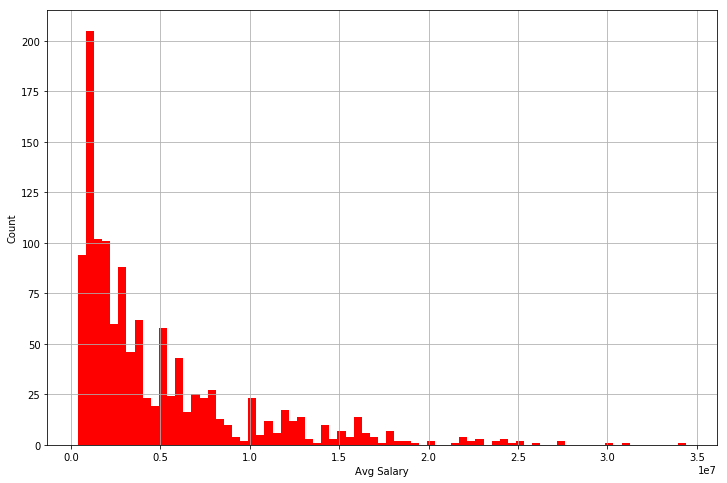

In [7]:
## Check distribution by Salary

plt.figure(figsize=(12, 8))
plt.hist(df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

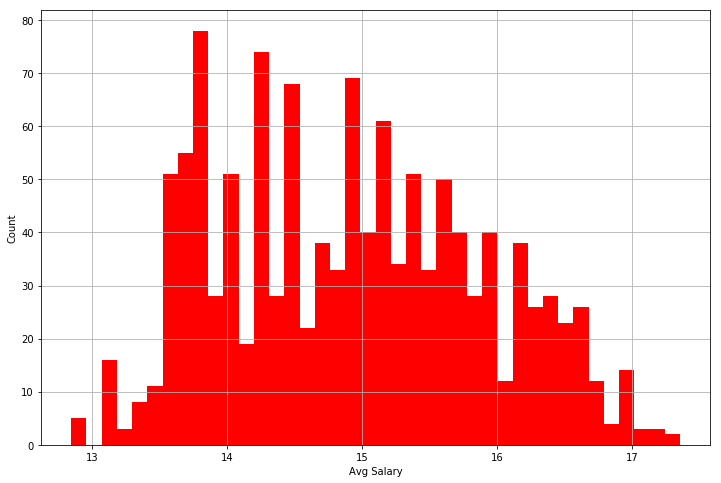

In [8]:
dfY_log = np.log(df['Salary'])

plt.figure(figsize=(12, 8))
plt.hist(dfY_log, bins=40, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

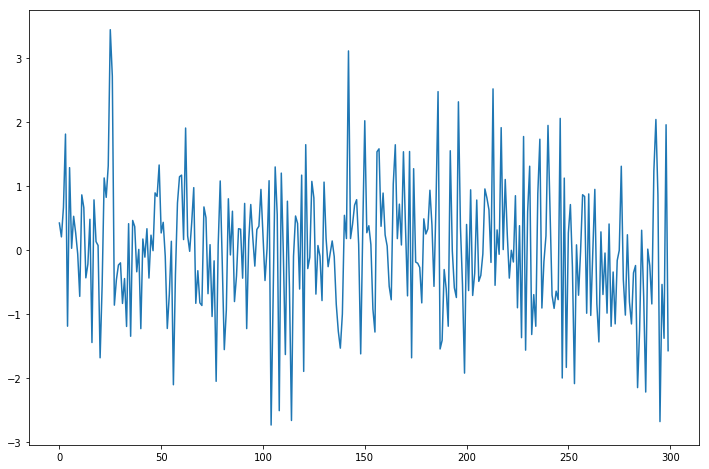

In [9]:
## Checking Gaussina white noise based on the year.

date = df['Yr'].copy()
date = sp.stats.norm.rvs(size=300)
plt.figure(figsize=(12, 8))
plt.plot(date)

In [10]:
## Grasping the number of players who sign a FA contract by year

df.groupby('Yr').count()['Name']

Yr
2005    109
2006     81
2007     91
2009    215
2010     91
2011     88
2012    117
2013    120
2014    105
2015    119
2016     89
Name: Name, dtype: int64

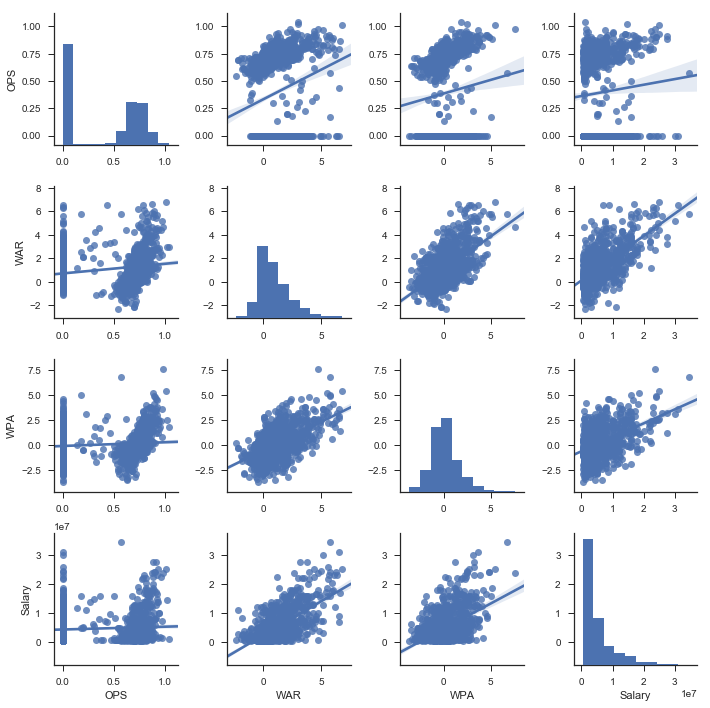

In [11]:
## Check the relationship between 'Salary' and the major indicators chosen among the various performance indicators by pairplot.

cols = ["OPS", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(df[cols], kind="reg")

#### * Encoding Two Categorical Columns

In [12]:
def encode_df_x1(df):
    
    ## categorical variables of Yr
    df_yr_le = LabelEncoder()
    df['Yr'] = df_yr_le.fit_transform(df['Yr'])
    
    enc_dict_yr = {'Yr' : df_yr_le}
    
    return df, enc_dict_yr
    
def encode_df_x2(df):
    
    ## categorical variables of Team
    df_team_le = LabelEncoder()
    df['Team'] = df_team_le.fit_transform(df['Team'])
    
    enc_dict_team = {'Team' : df_team_le}
    
    return df, enc_dict_team

train_df_x1 = encode_df_x1(df)
train_df_x2 = encode_df_x2(df)

In [13]:
df.tail()

Name  Yr  Team    G     AB     PA    H_b   Hits  Doubles  \
1220      Trevor Plouffe  10    29   84  319.0  344.0   83.0   57.0     13.0   
1221          Tyson Ross  10    19    1    0.0    0.0    0.0    0.0      0.0   
1222  Welington Castillo  10    10  113  416.0  457.0  110.0   72.0     24.0   
1223        Wilson Ramos  10    17  131  482.0  523.0  148.0  101.0     25.0   
1224     Yoenis Cespedes  10    16  132  479.0  543.0  134.0   77.0     25.0   

      Triples  HR_b   R_b   RBI  BB_b  IBB_b   SO_b  BB_Percent  K_Percent  \
1220      1.0  12.0  35.0  47.0  19.0    0.0   60.0         5.5       17.4   
1221      0.0   0.0   0.0   0.0   0.0    0.0    0.0         0.0        0.0   
1222      0.0  14.0  41.0  68.0  33.0    3.0  121.0         7.2       26.5   
1223      0.0  22.0  58.0  80.0  35.0    2.0   79.0         6.7       15.1   
1224      1.0  31.0  72.0  86.0  51.0    8.0  108.0         9.4       19.9   

      BB_per_K  BABIP_b  HBP_b   SF   SH   GDP   SB   CS  Def    ISO   wOBA  \
1220      0.32    0.284    2.0  3.0  1.0  11.0  1.0  0.0 -8.4  0.160  0.311   
1221      0.00    0.000    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000  0.000   
1222      0.27    0.337    4.0  4.0  0.0   5.0  2.0  0.0  9.8  0.159  0.319   
1223      0.44    0.327    2.0  4.0  0.0  17.0  0.0  0.0  8.4  0.189  0.361   
1224      0.47    0.298    7.0  6.0  0.0  14.0  3.0  1.0 -9.2  0.251  0.369   

      wRAA    AVG    OBP    SLG    OPS  WAR  wRC_Plus   WPA    W    L   GS  \
1220  -2.1  0.260  0.303  0.420  0.723 -0.4      91.0  0.50  0.0  0.0  0.0   
1221   0.0  0.000  0.000  0.000  0.000  0.1       0.0 -0.24  0.0  1.0  1.0   
1222   0.4  0.264  0.322  0.423  0.745  1.6      91.0  0.64  0.0  0.0  0.0   
1223  18.7  0.307  0.354  0.496  0.850  3.4     124.0  2.58  0.0  0.0  0.0   
1224  22.8  0.280  0.354  0.530  0.884  3.2     135.0  3.21  0.0  0.0  0.0   

       CG   IP  H_p  HR_p  BB_p  SO_p  R_p   SV   BS   BK   ER  HBP_p  HLD  \
1220  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
1221  0.0  5.1  9.0   0.0   1.0   5.0  8.0  0.0  0.0  0.0  7.0    2.0  0.0   
1222  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
1223  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
1224  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   

      IBB_p  ShO   TBF   WP  HR_per_9  BB_per_9  K_per_9  K_per_BB  \
1220    0.0  0.0   0.0  0.0       0.0      0.00     0.00       0.0   
1221    0.0  0.0  27.0  1.0       0.0      1.69     8.44       5.0   
1222    0.0  0.0   0.0  0.0       0.0      0.00     0.00       0.0   
1223    0.0  0.0   0.0  0.0       0.0      0.00     0.00       0.0   
1224    0.0  0.0   0.0  0.0       0.0      0.00     0.00       0.0   

      K_BB_Percent  GB_Percent  HR_per_FB  LOB_Percent    ERA  BABIP_p   FIP  \
1220           0.0         0.0        0.0          0.0   0.00    0.000  0.00   
1221          14.8        47.4        0.0         33.3  11.81    0.474  2.96   
1222           0.0         0.0        0.0          0.0   0.00    0.000  0.00   
1223           0.0         0.0        0.0          0.0   0.00    0.000  0.00   
1224           0.0         0.0        0.0          0.0   0.00    0.000  0.00   

      WHIP  Contract_Yrs  Total_Salary      Salary  
1220  0.00           1.0     5250000.0   5250000.0  
1221  1.88           1.0     6000000.0   6000000.0  
1222  0.00           2.0    13000000.0   6500000.0  
1223  0.00           2.0    12500000.0   6250000.0  
1224  0.00           4.0   110000000.0  27500000.0

## * Splitting Dependent & Independent Variables

In [14]:
df_x = df.iloc[:, 1:69]

In [15]:
print(df_x.shape)
df_x.tail()

(1225, 68)


Yr  Team    G     AB     PA    H_b   Hits  Doubles  Triples  HR_b   R_b  \
1220  10    29   84  319.0  344.0   83.0   57.0     13.0      1.0  12.0  35.0   
1221  10    19    1    0.0    0.0    0.0    0.0      0.0      0.0   0.0   0.0   
1222  10    10  113  416.0  457.0  110.0   72.0     24.0      0.0  14.0  41.0   
1223  10    17  131  482.0  523.0  148.0  101.0     25.0      0.0  22.0  58.0   
1224  10    16  132  479.0  543.0  134.0   77.0     25.0      1.0  31.0  72.0   

       RBI  BB_b  IBB_b   SO_b  BB_Percent  K_Percent  BB_per_K  BABIP_b  \
1220  47.0  19.0    0.0   60.0         5.5       17.4      0.32    0.284   
1221   0.0   0.0    0.0    0.0         0.0        0.0      0.00    0.000   
1222  68.0  33.0    3.0  121.0         7.2       26.5      0.27    0.337   
1223  80.0  35.0    2.0   79.0         6.7       15.1      0.44    0.327   
1224  86.0  51.0    8.0  108.0         9.4       19.9      0.47    0.298   

      HBP_b   SF   SH   GDP   SB   CS  Def    ISO   wOBA  wRAA    AVG    OBP  \
1220    2.0  3.0  1.0  11.0  1.0  0.0 -8.4  0.160  0.311  -2.1  0.260  0.303   
1221    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000  0.000   0.0  0.000  0.000   
1222    4.0  4.0  0.0   5.0  2.0  0.0  9.8  0.159  0.319   0.4  0.264  0.322   
1223    2.0  4.0  0.0  17.0  0.0  0.0  8.4  0.189  0.361  18.7  0.307  0.354   
1224    7.0  6.0  0.0  14.0  3.0  1.0 -9.2  0.251  0.369  22.8  0.280  0.354   

        SLG    OPS  WAR  wRC_Plus   WPA    W    L   GS   CG   IP  H_p  HR_p  \
1220  0.420  0.723 -0.4      91.0  0.50  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1221  0.000  0.000  0.1       0.0 -0.24  0.0  1.0  1.0  0.0  5.1  9.0   0.0   
1222  0.423  0.745  1.6      91.0  0.64  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1223  0.496  0.850  3.4     124.0  2.58  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1224  0.530  0.884  3.2     135.0  3.21  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

      BB_p  SO_p  R_p   SV   BS   BK   ER  HBP_p  HLD  IBB_p  ShO   TBF   WP  \
1220   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   
1221   1.0   5.0  8.0  0.0  0.0  0.0  7.0    2.0  0.0    0.0  0.0  27.0  1.0   
1222   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   
1223   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   
1224   0.0   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   

      HR_per_9  BB_per_9  K_per_9  K_per_BB  K_BB_Percent  GB_Percent  \
1220       0.0      0.00     0.00       0.0           0.0         0.0   
1221       0.0      1.69     8.44       5.0          14.8        47.4   
1222       0.0      0.00     0.00       0.0           0.0         0.0   
1223       0.0      0.00     0.00       0.0           0.0         0.0   
1224       0.0      0.00     0.00       0.0           0.0         0.0   

      HR_per_FB  LOB_Percent    ERA  BABIP_p   FIP  WHIP  
1220        0.0          0.0   0.00    0.000  0.00  0.00  
1221        0.0         33.3  11.81    0.474  2.96  1.88  
1222        0.0          0.0   0.00    0.000  0.00  0.00  
1223        0.0          0.0   0.00    0.000  0.00  0.00  
1224        0.0          0.0   0.00    0.000  0.00  0.00

In [16]:
print(min(df['wRAA']))
print(min(df['Def']))
print(min(df['WAR']))
print(min(df['WPA']))

-32.1
-44.8
-2.3
-3.68


In [17]:
df_x_temp = df_x.copy()
df_x_temp[df_x_temp < 0] = 0
df_x = df_x_temp
df_x.head(10)

Yr  Team    G     AB     PA    H_b   Hits  Doubles  Triples  HR_b    R_b  \
0   0    13  143  511.0  565.0  124.0   88.0     19.0      1.0  16.0   61.0   
1   0    20   62    0.0    0.0    0.0    0.0      0.0      0.0   0.0    0.0   
2   0    19   24    0.0    0.0    0.0    0.0      0.0      0.0   0.0    0.0   
3   0     1  129  416.0  460.0  125.0  100.0     23.0      0.0   2.0   49.0   
4   0    31   67    0.0    0.0    0.0    0.0      0.0      0.0   0.0    0.0   
5   0    24   96  250.0  273.0   58.0   43.0      8.0      4.0   3.0   25.0   
6   0    15  130  435.0  478.0  115.0   80.0     30.0      1.0   9.0   47.0   
7   0    22  156  637.0  682.0  171.0   90.0     43.0      2.0  36.0  102.0   
8   0     2   33   62.0   79.0    5.0    5.0      0.0      0.0   0.0    1.0   
9   0     8  123  463.0  506.0  140.0   79.0     30.0      0.0  31.0   72.0   

     RBI  BB_b  IBB_b   SO_b  BB_Percent  K_Percent  BB_per_K  BABIP_b  HBP_b  \
0   60.0  35.0    3.0   92.0         6.2       16.3      0.38    0.264    9.0   
1    0.0   0.0    0.0    0.0         0.0        0.0      0.00    0.000    0.0   
2    0.0   0.0    0.0    0.0         0.0        0.0      0.00    0.000    0.0   
3   37.0  29.0    1.0   64.0         6.3       13.9      0.45    0.348    7.0   
4    0.0   0.0    0.0    0.0         0.0        0.0      0.00    0.000    0.0   
5   24.0  11.0    0.0   30.0         4.0       11.0      0.37    0.250    5.0   
6   45.0  31.0   10.0   81.0         6.8       19.3      0.38    0.316    5.0   
7  104.0  33.0    3.0  125.0         4.8       18.3      0.26    0.281    7.0   
8    3.0   1.0    0.0   19.0         1.3       24.1      0.05    0.114    0.0   
9   92.0  35.0    4.0   60.0         6.9       11.9      0.58    0.291    6.0   

    SF    SH   GDP    SB   CS   Def    ISO   wOBA  wRAA    AVG    OBP    SLG  \
0  6.0   4.0  16.0   9.0  3.0   0.0  0.135  0.296   0.0  0.243  0.299  0.378   
1  0.0   0.0   0.0   0.0  0.0   0.0  0.000  0.000   0.0  0.000  0.000  0.000   
2  0.0   0.0   0.0   0.0  0.0   0.0  0.000  0.000   0.0  0.000  0.000  0.000   
3  3.0   5.0   5.0  19.0  4.0  15.5  0.070  0.323   0.0  0.300  0.354  0.370   
4  0.0   0.0   0.0   0.0  0.0   0.0  0.000  0.000   0.0  0.000  0.000  0.000   
5  3.0   4.0   6.0   7.0  2.0  11.0  0.100  0.268   0.0  0.232  0.275  0.332   
6  3.0   4.0  13.0   5.0  3.0  11.8  0.140  0.320   0.0  0.269  0.323  0.410   
7  5.0   0.0   6.0  30.0  2.0   0.0  0.243  0.347  12.2  0.268  0.309  0.512   
8  1.0  15.0   0.0   0.0  0.0   8.0  0.000  0.081   0.0  0.081  0.094  0.081   
9  2.0   0.0  15.0   0.0  1.0   0.0  0.266  0.392  27.5  0.302  0.358  0.568   

     OPS  WAR  wRC_Plus   WPA     W    L    GS   CG     IP    H_p  HR_p  BB_p  \
0  0.677  0.2      80.0  0.00   0.0  0.0   0.0  0.0    0.0    0.0   0.0   0.0   
1  0.000  0.6       0.0  0.09   4.0  0.0   0.0  0.0   72.1   47.0   6.0  23.0   
2  0.000  1.7       0.0  0.00  11.0  5.0  22.0  0.0  128.2  140.0  14.0  44.0   
3  0.724  3.2      98.0  0.82   0.0  0.0   0.0  0.0    0.0    0.0   0.0   0.0   
4  0.000  0.0       0.0  0.00   2.0  5.0   0.0  0.0   52.0   62.0  10.0  14.0   
5  0.607  0.7      59.0  0.00   0.0  0.0   0.0  0.0    0.0    0.0   0.0   0.0   
6  0.733  2.1      96.0  0.30   0.0  0.0   0.0  0.0    0.0    0.0   0.0   0.0   
7  0.821  2.4     108.0  1.45   0.0  0.0   0.0  0.0    0.0    0.0   0.0   0.0   
8  0.174  5.8       0.0  5.02  17.0  9.0  33.0  0.0  222.1  188.0  17.0  41.0   
9  0.926  2.9     136.0  2.99   0.0  0.0   0.0  0.0    0.0    0.0   0.0   0.0   

    SO_p   R_p   SV   BS   BK    ER  HBP_p   HLD  IBB_p  ShO    TBF   WP  \
0    0.0   0.0  0.0  0.0  0.0   0.0    0.0   0.0    0.0  0.0    0.0  0.0   
1   54.0  21.0  0.0  1.0  0.0  18.0    5.0   2.0    2.0  0.0  286.0  0.0   
2  100.0  70.0  0.0  0.0  0.0  61.0    5.0   0.0    6.0  0.0  568.0  5.0   
3    0.0   0.0  0.0  0.0  0.0   0.0    0.0   0.0    0.0  0.0    0.0  0.0   
4   38.0  47.0  1.0  2.0  1.0  44.0    2.0  10.0    3.0  0.0  231.0  1.0   
5    0.0   0

In [18]:
df_y = pd.DataFrame(df['Salary'])

print(df_y.shape)
df_y.tail()

(1225, 1)


Salary
1220   5250000.0
1221   6000000.0
1222   6500000.0
1223   6250000.0
1224  27500000.0

In [19]:
df_x_corr = df_x.corr()
df_x_corr.tail()

Yr      Team         G        AB        PA       H_b  \
LOB_Percent  0.085814 -0.004271 -0.737424 -0.834416 -0.833830 -0.805638   
ERA          0.045769  0.042912 -0.725933 -0.748055 -0.747715 -0.721790   
BABIP_p      0.087114  0.016844 -0.761655 -0.835046 -0.834625 -0.805748   
FIP          0.039577  0.017976 -0.754958 -0.801940 -0.801461 -0.774317   
WHIP         0.060169  0.025404 -0.760090 -0.820380 -0.819959 -0.791651   

                 Hits   Doubles   Triples      HR_b       R_b       RBI  \
LOB_Percent -0.792231 -0.771840 -0.454795 -0.634219 -0.772804 -0.752884   
ERA         -0.709549 -0.692196 -0.406944 -0.568412 -0.693166 -0.674748   
BABIP_p     -0.791750 -0.773324 -0.455416 -0.634966 -0.773858 -0.753235   
FIP         -0.761633 -0.741426 -0.436225 -0.609394 -0.742985 -0.723700   
WHIP        -0.778235 -0.759091 -0.446694 -0.623450 -0.760014 -0.739980   

                 BB_b     IBB_b      SO_b  BB_Percent  K_Percent  BB_per_K  \
LOB_Percent -0.728583 -0.448724 -0.776992   -0.854971  -0.794930 -0.818162   
ERA         -0.653501 -0.402022 -0.697168   -0.766132  -0.717353 -0.732783   
BABIP_p     -0.730240 -0.448738 -0.778565   -0.855142  -0.796807 -0.817683   
FIP         -0.700035 -0.431525 -0.746347   -0.821583  -0.764727 -0.786441   
WHIP        -0.716656 -0.440867 -0.764588   -0.840378  -0.785601 -0.803753   

              BABIP_b     HBP_b        SF        SH       GDP        SB  \
LOB_Percent -0.946350 -0.578303 -0.661015 -0.297222 -0.726020 -0.388487   
ERA         -0.850102 -0.517558 -0.594719 -0.281065 -0.648758 -0.350253   
BABIP_p     -0.946770 -0.577731 -0.662928 -0.303114 -0.723820 -0.391431   
FIP         -0.910081 -0.555665 -0.636904 -0.294577 -0.697865 -0.373688   
WHIP        -0.931809 -0.567642 -0.651367 -0.304416 -0.711951 -0.383589   

                   CS       Def       ISO      wOBA      wRAA       AVG  \
LOB_Percent -0.467588 -0.311780 -0.846597 -0.957012 -0.373032 -0.952412   
ERA         -0.421636 -0.290901 -0.759446 -0.858991 -0.334243 -0.855103   
BABIP_p     -0.471258 -0.319801 -0.847632 -0.957507 -0.372745 -0.952791   
FIP         -0.449755 -0.303139 -0.813420 -0.920101 -0.358923 -0.915870   
WHIP        -0.461698 -0.315533 -0.832865 -0.941741 -0.366444 -0.937399   

                  OBP       SLG       OPS       WAR  wRC_Plus       WPA  \
LOB_Percent -0.958676 -0.942325 -0.954100 -0.105135 -0.914656  0.048520   
ERA         -0.860445 -0.845780 -0.856345 -0.173522 -0.819670 -0.139077   
BABIP_p     -0.959002 -0.942993 -0.954620 -0.116411 -0.914655 -0.029281   
FIP         -0.921775 -0.905882 -0.917279 -0.183151 -0.878957 -0.084708   
WHIP        -0.943315 -0.927316 -0.938862 -0.158420 -0.898828 -0.072411   

                    W         L        GS        CG        IP       H_p  \
LOB_Percent  0.641647  0.632923  0.446973  0.234548  0.711523  0.678969   
ERA          0.549611  0.671602  0.480246  0.216034  0.644028  0.667956   
BABIP_p      0.633915  0.680384  0.484102  0.246698  0.719539  0.715664   
FIP          0.608529  0.681231  0.493524  0.226093  0.695648  0.696624   
WHIP         0.604623  0.674946  0.476605  0.224019  0.694741  0.699218   

                 HR_p      BB_p      SO_p       R_p        SV        BS  \
LOB_Percent  0.648604  0.716588  0.734023  0.654048  0.311100  0.477719   
ERA          0.659471  0.690091  0.618575  0.707067  0.154051  0.339133   
BABIP_p      0.661457  0.734542  0.727968  0.708771  0.252911  0.437705   
FIP          0.711109  0.739194  0.669342  0.714439  0.198138  0.394011   
WHIP         0.658478  0.745249  0.685620  0.707603  0.219841  0.416907   

                   BK        ER     HBP_p       HLD     IBB_p       ShO  \
LOB_Percent  0.298027  0.653851  0.603393  0.484843  0.636549  0.207372   
ERA          0.302377  0.711192  0.590654  0.295164  0.559294  0.193712   
BABIP_p      0.308799  0.708692  0.620064  0.431702  0.643119  0.218322   
FIP          0.327762  0.715222  0.629403  0.367330  0.607533  0.202868   
WHIP         0.316

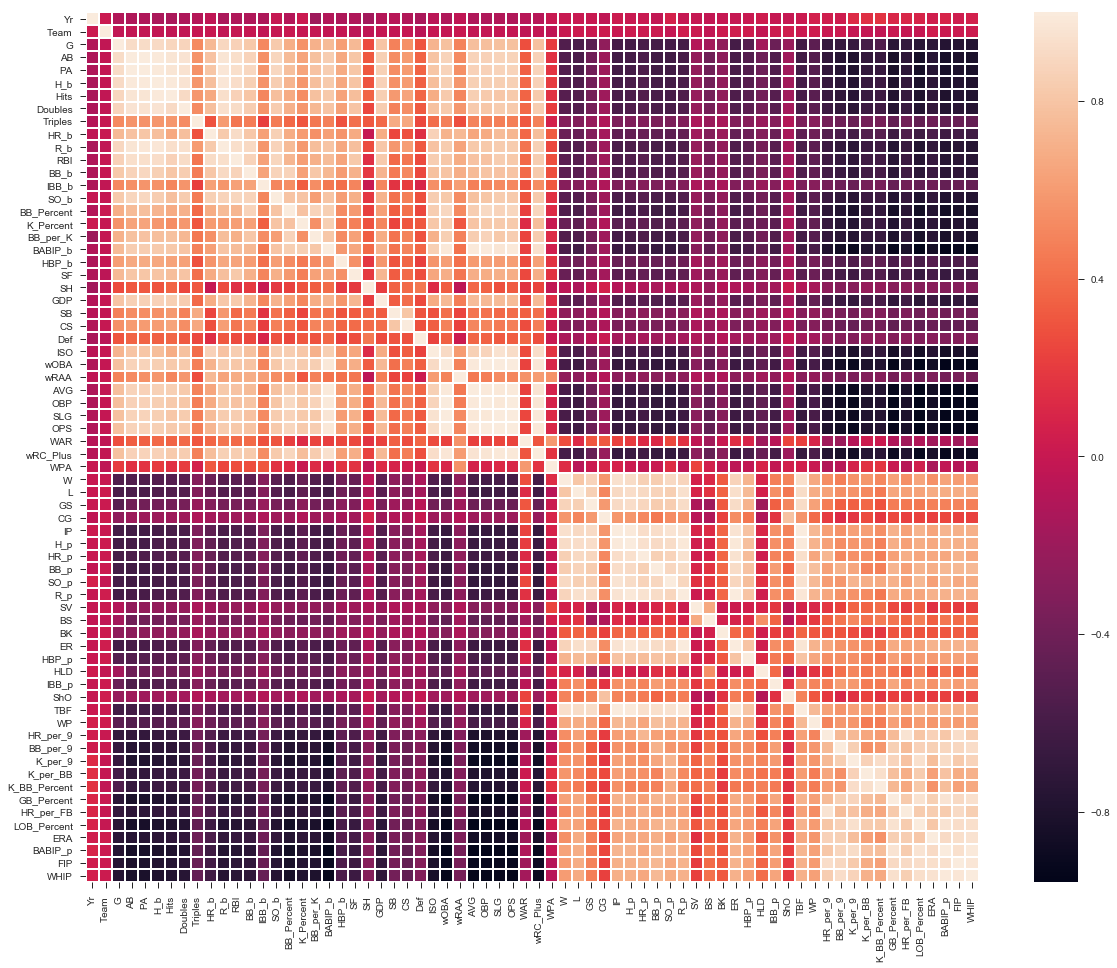

In [20]:
plt.figure(figsize=(20, 16))
corr_data = pd.DataFrame.corr(df_x)
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

## * Checking p-value using OLS Analysis

### * 1st OLS analysis

In [21]:
dfX1 = sm.add_constant(df_x)
dfY = pd.DataFrame(df_y, columns=["Salary"])
df_mlb = pd.concat([dfX1, dfY], axis=1)

In [22]:
model1 = sm.OLS(dfY, dfX1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     35.88
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.67e-236
Time:                        14:34:39   Log-Likelihood:                -19942.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1156   BIC:                         4.037e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.652e+06   1.09e+06      2.430   

## * Eliminating Outliers above OLS analysis RESULT

In [23]:
def elim_outliers(result, dfX):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [24]:
idx1 = elim_outliers(result1, dfX1)
print(idx1, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx1)))

[   7   11   13   19   24   28   32   36   44   65   66   77  105  113  115
  119  144  153  155  157  174  187  197  200  202  220  244  248  252  259
  270  272  291  314  331  391  393  394  397  401  405  411  416  438  446
  460  499  507  539  540  549  558  571  597  605  683  737  743  747  753
  757  782  791  794  797  801  804  814  826  837  914  918  950  958  993
 1000 1020 1041 1049 1059 1073 1077 1088 1091 1096 1106 1115 1135 1156 1188
 1196 1209 1221 1224] 

There are '94' Outliers according to Fox criteria


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [25]:
dfX1_idx = dfX1.drop(idx1)
dfY_idx = dfY.drop(idx1)

### * 1-1 OLS analysis

In [26]:
dfX1_idx_elimVer = sm.add_constant(dfX1_idx)
model1_idx_elimVer = sm.OLS(dfY_idx, dfX1_idx_elimVer)
result1_idx_elimVer = model1_idx_elimVer.fit()
print(result1_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     43.86
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.01e-260
Time:                        14:34:39   Log-Likelihood:                -18065.
No. Observations:                1131   AIC:                         3.627e+04
Df Residuals:                    1062   BIC:                         3.661e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.423e+06   9.63e+05      2.516   

## * Filtrating P-VALUE under 5% above model

In [27]:
def extracted_pvals(result, cond):
    pvals = pd.DataFrame(result.pvalues)
    pvals.columns = ['P_values']
    pvals['P_values'] = pvals[pvals.P_values < cond]
    pvals = pvals.dropna().sort_values('P_values')
    
    return pvals

In [28]:
df_elim_pvals = extracted_pvals(result1_idx_elimVer, 0.05)

extracted_feature_elim = df_elim_pvals.index.values
extracted_elim_x = dfX1_idx_elimVer.loc[:, extracted_feature_elim]

### * 1-2 OLS analysis

In [29]:
dfX1_idx_elim2 = sm.add_constant(extracted_elim_x)

model1_idx_elim2 = sm.OLS(dfY_idx, dfX1_idx_elim2)
result1_idx_elim2 = model1_idx_elim2.fit()
print(result1_idx_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     125.7
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.76e-275
Time:                        14:34:39   Log-Likelihood:                -18132.
No. Observations:                1131   AIC:                         3.631e+04
Df Residuals:                    1109   BIC:                         3.642e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WAR         9.398e+05   1.06e+05      8.865      0.0

## * Filtrating P-VALUE under 5% above model 2

In [30]:
df_elim_pvals2 = extracted_pvals(result1_idx_elim2, 0.05)

extracted_feature_elim2 = df_elim_pvals2.index.values
extracted_elim_x2 = dfX1_idx_elim2.loc[:, extracted_feature_elim2]

### * 1-3 OLS analysis

In [31]:
dfX1_idx_elim3 = sm.add_constant(extracted_elim_x2)

model1_idx_elim3 = sm.OLS(dfY_idx, dfX1_idx_elim3)
result1_idx_elim3 = model1_idx_elim3.fit()
print(result1_idx_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     155.2
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.08e-279
Time:                        14:34:39   Log-Likelihood:                -18134.
No. Observations:                1131   AIC:                         3.630e+04
Df Residuals:                    1113   BIC:                         3.639e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SO_p          6.8e+04   6504.778     10.453      0.0

## * Scaling the variables

In [32]:
cols = df_x.columns.tolist()

cat_cols = cols[:2]
num_cols = cols[2:70]

cat_cols_list = []
num_cols_list = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols:
        cat_cols_list.append("C(" + item1 + ")")
        
    for item2 in num_cols:
        num_cols_list.append("scale(" + item2 + ")")
        
    return cat_cols_list, num_cols_list

converted_cols = r_style_cat_cols(cat_cols, num_cols)

converted_cols_list = " + ".join(cat_cols_list + num_cols_list)
model_str = "Salary ~ "

## zero; To eliminate Intercept of Scaling categorical valiable.
zero = ' + 0'

ols_str_list = model_str + converted_cols_list + zero
merging_converted_cols = cat_cols_list + num_cols_list

# print(ols_str_list)
# print(converted_cols_list)
# print(converted_cols)

### * 2nd OLS analysis (Not include 'ZERO')

In [33]:
dfX2 = dmatrix(converted_cols_list, data=df_x)
dfX2_columns = dfX2.design_info.column_names
dfX2 = pd.DataFrame(dfX2, columns=dfX2_columns)

In [34]:
model2 = sm.OLS(dfY, dfX2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     24.02
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.10e-222
Time:                        14:34:40   Log-Likelihood:                -19906.
No. Observations:                1225   AIC:                         4.003e+04
Df Residuals:                    1117   BIC:                         4.058e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.775e+06   2

In [35]:
model2 = sm.OLS(dfY, dfX2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     24.02
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.10e-222
Time:                        14:34:40   Log-Likelihood:                -19906.
No. Observations:                1225   AIC:                         4.003e+04
Df Residuals:                    1117   BIC:                         4.058e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.775e+06   2

## * 1st Pre-processing Variables of model2 that failed the 5% P-VALUE Condition test

In [36]:
p_values3 = extracted_pvals(result2, 0.05)
# print(len(p_values))
# print(p_values)

extracted_features3 = list(p_values3.index.values)
extracted_df_x3 = dfX2.loc[:, extracted_features3]

extracted_df_x3.tail()

scale(G)  scale(WAR)  scale(SV)  scale(SB)  scale(wRAA)  scale(SO_p)  \
1220  0.130796   -0.860528  -0.271484  -0.269710    -0.395374    -0.715004   
1221 -1.755004   -0.784712  -0.271484  -0.421406    -0.395374    -0.609591   
1222  0.789689    0.352529  -0.271484  -0.118014    -0.339063    -0.715004   
1223  1.198658    1.717219  -0.271484  -0.421406     2.237176    -0.715004   
1224  1.221379    1.565586  -0.271484   0.033683     2.814366    -0.715004   

      C(Yr)[T.10]  scale(GDP)  scale(IBB_b)  C(Yr)[T.9]  scale(SLG)  \
1220          1.0    1.153062     -0.476154         0.0    0.993282   
1221          1.0   -0.769897     -0.476154         0.0   -1.037828   
1222          1.0    0.104175      0.596068         0.0    1.007790   
1223          1.0    2.201948      0.238661         0.0    1.360816   
1224          1.0    1.677505      2.383106         0.0    1.525240   

      scale(OPS)  scale(HR_p)  scale(OBP)  scale(ER)  scale(GB_Percent)  \
1220    0.912641    -0.648139    0.800426  -0.672842          -0.928598   
1221   -1.051964    -0.648139   -1.058482  -0.431779           1.147591   
1222    0.972422    -0.648139    0.916991  -0.672842          -0.928598   
1223    1.257738    -0.648139    1.113311  -0.672842          -0.928598   
1224    1.350126    -0.648139    1.113311  -0.672842          -0.928598   

      scale(BK)  scale(HLD)  scale(W)  
1220  -0.299392   -0.445154 -0.628874  
1221  -0.299392   -0.445154 -0.628874  
1222  -0.299392   -0.445154 -0.628874  
1223  -0.299392   -0.445154 -0.628874  
1224  -0.299392   -0.445154 -0.628874

### * 3-1 OLS analysis

In [37]:
dfX3_1 = sm.add_constant(extracted_df_x3)

model3_1 = sm.OLS(dfY, dfX3_1)
result3_1 = model3_1.fit()
print(result3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     108.7
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.42e-245
Time:                        14:34:40   Log-Likelihood:                -20026.
No. Observations:                1225   AIC:                         4.009e+04
Df Residuals:                    1205   BIC:                         4.019e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.532e+06   9.66e+0

## * 2nd Pre-processing Variables of model3-1 that failed the 5% P-VALUE Condition test

In [38]:
p_values3_1 = extracted_pvals(result3_1, 0.05)

extracted_features3_1 = p_values3_1.index.values
extracted_df_x3_1 = dfX3_1.loc[:, extracted_features3_1]

### 3-1-1 OLS analysis

In [39]:
dfX3_1_1 = sm.add_constant(extracted_df_x3_1)

model3_1_1 = sm.OLS(dfY, dfX3_1_1)
result3_1_1 = model3_1_1.fit()
print(result3_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.22e-246
Time:                        14:34:40   Log-Likelihood:                -20027.
No. Observations:                1225   AIC:                         4.009e+04
Df Residuals:                    1207   BIC:                         4.018e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.529e+06   9.66e+04     46.910   

### * 2-2 OLS analysis (Include 'ZERO')
#### [zero; Constant Term to eliminate Intercept of Scaling categorical valiable]

In [40]:
ols_str_list

'Salary ~ C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 2-2 OLS analysis

In [41]:
model2_2 = sm.OLS.from_formula(ols_str_list, df)
result2_2 = model2_2.fit()
print(result2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     23.71
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.67e-220
Time:                        14:34:41   Log-Likelihood:                -19911.
No. Observations:                1225   AIC:                         4.004e+04
Df Residuals:                    1117   BIC:                         4.059e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]              5.77e+06    

## * 1st Pre-processing Variables of model2-2 that failed the 5% P-VALUE Condition test

In [42]:
df_x_copy = df_x.copy()
df_x_copy_list = list(df_x_copy.columns)
df_x_conv_list = cat_cols_list + num_cols_list

for item, item2 in zip(df_x_copy_list, df_x_conv_list):
    df_x_copy.rename(columns={item : item2}, inplace=True)
        
df_x_copy.tail()

C(Yr)  C(Team)  scale(G)  scale(AB)  scale(PA)  scale(H_b)  scale(Hits)  \
1220     10       29        84      319.0      344.0        83.0         57.0   
1221     10       19         1        0.0        0.0         0.0          0.0   
1222     10       10       113      416.0      457.0       110.0         72.0   
1223     10       17       131      482.0      523.0       148.0        101.0   
1224     10       16       132      479.0      543.0       134.0         77.0   

      scale(Doubles)  scale(Triples)  scale(HR_b)  scale(R_b)  scale(RBI)  \
1220            13.0             1.0         12.0        35.0        47.0   
1221             0.0             0.0          0.0         0.0         0.0   
1222            24.0             0.0         14.0        41.0        68.0   
1223            25.0             0.0         22.0        58.0        80.0   
1224            25.0             1.0         31.0        72.0        86.0   

      scale(BB_b)  scale(IBB_b)  scale(SO_b)  scale(BB_Percent)  \
1220         19.0           0.0         60.0                5.5   
1221          0.0           0.0          0.0                0.0   
1222         33.0           3.0        121.0                7.2   
1223         35.0           2.0         79.0                6.7   
1224         51.0           8.0        108.0                9.4   

      scale(K_Percent)  scale(BB_per_K)  scale(BABIP_b)  scale(HBP_b)  \
1220              17.4             0.32           0.284           2.0   
1221               0.0             0.00           0.000           0.0   
1222              26.5             0.27           0.337           4.0   
1223              15.1             0.44           0.327           2.0   
1224              19.9             0.47           0.298           7.0   

      scale(SF)  scale(SH)  scale(GDP)  scale(SB)  scale(CS)  scale(Def)  \
1220        3.0        1.0        11.0        1.0        0.0         0.0   
1221        0.0        0.0         0.0        0.0        0.0         0.0   
1222        4.0        0.0         5.0        2.0        0.0         9.8   
1223        4.0        0.0        17.0        0.0        0.0         8.4   
1224        6.0        0.0        14.0        3.0        1.0         0.0   

      scale(ISO)  scale(wOBA)  scale(wRAA)  scale(AVG)  scale(OBP)  \
1220       0.160        0.311          0.0       0.260       0.303   
1221       0.000        0.000          0.0       0.000       0.000   
1222       0.159        0.319          0.4       0.264       0.322   
1223       0.189        0.361         18.7       0.307       0.354   
1224       0.251        0.369         22.8       0.280       0.354   

      scale(SLG)  scale(OPS)  scale(WAR)  scale(wRC_Plus)  scale(WPA)  \
1220       0.420       0.723         0.0             91.0        0.50   
1221       0.000       0.000         0.1              0.0        0.00   
1222       0.423       0.745         1.6             91.0        0.64   
1223       0.496       0.850         3.4            124.0        2.58   
1224       0.530       0.884         3.2            135.0        3.21   

      scale(W)  scale(L)  scale(GS)  scale(CG)  scale(IP)  scale(H_p)  \
1220       0.0       0.0        0.0        0.0        0.0         0.0   
1221       0.0       1.0        1.0        0.0        5.1         9.0   
1222       0.0       0.0        0.0        0.0        0.0         0.0   
1223       0.0       0.0        0.0        0.0        0.0         0.0   
1224       0.0       0.0        0.0        0.0        0.0         0.0   

      scale(HR_p)  scale(BB_p)  scale(SO_p)  scale(R_p)  scale(SV)  scale(BS)  \
1220          0.0          0.0          0.0         0.0        0.0        0.0   
1221          0.0          1.0          5.0         8.0        0.0        0.0   
1222          0.0          0.0          0.0         0.0        0.0        0.0   
1223          0.0          0.0          0.0         0.0        0.0        0.0   
1224          0.0          0.0          0.0         0

In [43]:
ols_model_cols = " + ".join(df_x_copy.columns) + zero
ols_model_cols

'C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [44]:
dfX3_2 = dmatrix(ols_model_cols, data=df_x)
dfX3_2_columns = dfX3_2.design_info.column_names
dfX3_2 = pd.DataFrame(dfX3_2, columns=dfX3_2_columns)

In [45]:
p_values3_2 = extracted_pvals(result2_2, 0.05)
# # print(len(p_values3_2))
# print(p_values3_2)

extracted_features3_2 = list(p_values3_2.index.values)
extracted_df_x3_2 = dfX3_2.loc[:, extracted_features3_2]

extracted_df_x3_2.tail()

scale(G)  scale(SV)  scale(IBB_b)  scale(GDP)  scale(SB)  scale(WAR)  \
1220  0.130796  -0.271484     -0.476154    1.153062  -0.269710   -0.860528   
1221 -1.755004  -0.271484     -0.476154   -0.769897  -0.421406   -0.784712   
1222  0.789689  -0.271484      0.596068    0.104175  -0.118014    0.352529   
1223  1.198658  -0.271484      0.238661    2.201948  -0.421406    1.717219   
1224  1.221379  -0.271484      2.383106    1.677505   0.033683    1.565586   

      scale(wRAA)  scale(SO_p)  scale(HR_p)  scale(SLG)  C(Yr)[10]  C(Yr)[9]  \
1220    -0.395374    -0.715004    -0.648139    0.993282        1.0       0.0   
1221    -0.395374    -0.609591    -0.648139   -1.037828        1.0       0.0   
1222    -0.339063    -0.715004    -0.648139    1.007790        1.0       0.0   
1223     2.237176    -0.715004    -0.648139    1.360816        1.0       0.0   
1224     2.814366    -0.715004    -0.648139    1.525240        1.0       0.0   

      scale(ER)  scale(BK)  C(Yr)[1]  scale(OPS)  C(Yr)[8]  C(Yr)[7]  \
1220  -0.672842  -0.299392       0.0    0.912641       0.0       0.0   
1221  -0.431779  -0.299392       0.0   -1.051964       0.0       0.0   
1222  -0.672842  -0.299392       0.0    0.972422       0.0       0.0   
1223  -0.672842  -0.299392       0.0    1.257738       0.0       0.0   
1224  -0.672842  -0.299392       0.0    1.350126       0.0       0.0   

      C(Yr)[2]  scale(OBP)  C(Yr)[6]  scale(BB_per_9)  
1220       0.0    0.800426       0.0        -0.850686  
1221       0.0   -1.058482       0.0         0.083349  
1222       0.0    0.916991       0.0        -0.850686  
1223       0.0    1.113311       0.0        -0.850686  
1224       0.0    1.113311       0.0        -0.850686

#### ----------------------------------------------------------------------- Simple test(data scaling) -----------------------------------------------------------------------

In [46]:
scaleG_test = df_x_copy['scale(G)'].copy()

In [47]:
df_x_copy2 = df_x_copy.copy()

In [48]:
def scale2(series):
    return (series - series.mean()) / series.std()

In [49]:
%%time
for col in df_x_copy2.columns:
    if col[:5] == 'scale':
        df_x_copy2[col] = scale2(df_x_copy2[col])

Wall time: 30 ms


In [50]:
df_x_copy2.tail()

C(Yr)  C(Team)  scale(G)  scale(AB)  scale(PA)  scale(H_b)  scale(Hits)  \
1220     10       29  0.130742   0.612628   0.554774    0.583932     0.617473   
1221     10       19 -1.754287  -0.900693  -0.900848   -0.863372    -0.847631   
1222     10       10  0.789367   1.072792   1.032929    1.054742     1.003027   
1223     10       17  1.198169   1.385892   1.312205    1.717363     1.748431   
1224     10       16  1.220880   1.371660   1.396834    1.473240     1.131545   

      scale(Doubles)  scale(Triples)  scale(HR_b)  scale(R_b)  scale(RBI)  \
1220        0.270060        0.089858     0.706579    0.348689    0.765761   
1221       -0.832403       -0.486456    -0.678870   -0.829500   -0.806197   
1222        1.202914       -0.486456     0.937487    0.550665    1.468125   
1223        1.287719       -0.486456     1.861120    1.122928    1.869476   
1224        1.287719        0.089858     2.900207    1.594204    2.070152   

      scale(BB_b)  scale(IBB_b)  scale(SO_b)  scale(BB_Percent)  \
1220     0.027607     -0.475960     0.496855           0.211987   
1221    -0.782675     -0.475960    -0.849859          -0.928526   
1222     0.624657      0.595825     1.866015           0.564510   
1223     0.709950      0.238563     0.923315           0.460827   
1224     1.392293      2.382134     1.574227           1.020715   

      scale(K_Percent)  scale(BB_per_K)  scale(BABIP_b)  scale(HBP_b)  \
1220          0.679779         0.175320        0.860821      0.002526   
1221         -0.948730        -0.880855       -1.058908     -0.616281   
1222          1.531471         0.010292        1.219081      0.621332   
1223          0.464517         0.571385        1.151484      0.002526   
1224          0.913760         0.670402        0.955456      1.549542   

      scale(SF)  scale(SH)  scale(GDP)  scale(SB)  scale(CS)  scale(Def)  \
1220   0.633820  -0.030165    1.152591  -0.269600  -0.506296   -0.429905   
1221  -0.707163  -0.454903   -0.769583  -0.421234  -0.506296   -0.429905   
1222   1.080814  -0.454903    0.104133  -0.117965  -0.506296    2.284272   
1223   1.080814  -0.454903    2.201049  -0.421234  -0.506296    1.896533   
1224   1.974803  -0.454903    1.676820   0.033669  -0.033933   -0.429905   

      scale(ISO)  scale(wOBA)  scale(wRAA)  scale(AVG)  scale(OBP)  \
1220    0.958559     0.881624    -0.395212    0.959272    0.800099   
1221   -0.923397    -1.055717    -0.395212   -1.054120   -1.058050   
1222    0.946797     0.931460    -0.338924    0.990247    0.916617   
1223    1.299664     1.193094     2.236263    1.323231    1.112857   
1224    2.028922     1.242929     2.813218    1.114148    1.112857   

      scale(SLG)  scale(OPS)  scale(WAR)  scale(wRC_Plus)  scale(WPA)  \
1220    0.992877    0.912269   -0.860177         0.803857   -0.066330   
1221   -1.037405   -1.051535   -0.784391        -0.983053   -0.580139   
1222    1.007379    0.972025    0.352385         0.803857    0.077537   
1223    1.360261    1.257225    1.716517         1.451857    2.071118   
1224    1.524617    1.349575    1.564947         1.667857    2.718518   

      scale(W)  scale(L)  scale(GS)  scale(CG)  scale(IP)  scale(H_p)  \
1220 -0.628617 -0.649253  -0.461267  -0.237925  -0.703986   -0.683260   
1221 -0.628617 -0.392029  -0.363861  -0.237925  -0.621077   -0.541661   
1222 -0.628617 -0.649253  -0.461267  -0.237925  -0.703986   -0.683260   
1223 -0.628617 -0.649253  -0.461267  -0.237925  -0.703986   -0.683260   
1224 -0.628617 -0.649253  -0.461267  -0.237925  -0.703986   -0.683260   

      scale(HR_p)  scale(BB_p)  scale(SO_p)  scale(R_p)  scale(SV)  scale(BS)  \
1220    -0.647875    -0.713254    -0.714712   -0.673220  -0.271374   -0.44308   
1221    -0.647875    -0.663466    -0.609342   -0.419634  -0.271374   -0.44308   
1222    -0.647875    -0.713254    -0.714712   -0.673220  -0.271374   -0.44308   
1223    -0.647875    -0.713254    -0.714712   -0.673220  -0.271374   -0.44308   
1224    -0.647875    -0.713254    -0.714712   -0.6732

In [51]:
scaleG_mu = scaleG_test.mean()

In [52]:
scaleG_s = scaleG_test.std()

In [53]:
((scaleG_test - scaleG_mu) / scaleG_s).tail()

1220    0.130742
1221   -1.754287
1222    0.789367
1223    1.198169
1224    1.220880
Name: scale(G), dtype: float64

#### ----------------------------------------------------------------------- The end of Simple test -----------------------------------------------------------------------

### * 3-2 OLS analysis 

In [54]:
dfX3_2 = sm.add_constant(extracted_df_x3_2)

model3_2 = sm.OLS(dfY, dfX3_2)
result3_2 = model3_2.fit()
print(result3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     96.45
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.97e-247
Time:                        14:34:42   Log-Likelihood:                -20014.
No. Observations:                1225   AIC:                         4.007e+04
Df Residuals:                    1202   BIC:                         4.019e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.063e+06   1.38e+05     

## * 2nd Pre-processing Variables of model3-2 that failed the 5% P-VALUE Condition test

In [55]:
p_values3_2_2 = extracted_pvals(result3_2, 0.05)
extracted_features3_2_2 = list(p_values3_2_2.index.values)
extracted_df_x3_2_2 = dfX3_2.loc[:, extracted_features3_2_2]

extracted_df_x3_2_2.tail()

const  scale(SO_p)  scale(WAR)  scale(GDP)  scale(wRAA)  C(Yr)[10]  \
1220    1.0    -0.715004   -0.860528    1.153062    -0.395374        1.0   
1221    1.0    -0.609591   -0.784712   -0.769897    -0.395374        1.0   
1222    1.0    -0.715004    0.352529    0.104175    -0.339063        1.0   
1223    1.0    -0.715004    1.717219    2.201948     2.237176        1.0   
1224    1.0    -0.715004    1.565586    1.677505     2.814366        1.0   

      scale(SV)  scale(IBB_b)  C(Yr)[9]  scale(ER)  scale(SB)  scale(G)  \
1220  -0.271484     -0.476154       0.0  -0.672842  -0.269710  0.130796   
1221  -0.271484     -0.476154       0.0  -0.431779  -0.421406 -1.755004   
1222  -0.271484      0.596068       0.0  -0.672842  -0.118014  0.789689   
1223  -0.271484      0.238661       0.0  -0.672842  -0.421406  1.198658   
1224  -0.271484      2.383106       0.0  -0.672842   0.033683  1.221379   

      C(Yr)[8]  C(Yr)[7]  scale(SLG)  scale(OPS)  scale(OBP)  scale(HR_p)  \
1220       0.0       0.0    0.993282    0.912641    0.800426    -0.648139   
1221       0.0       0.0   -1.037828   -1.051964   -1.058482    -0.648139   
1222       0.0       0.0    1.007790    0.972422    0.916991    -0.648139   
1223       0.0       0.0    1.360816    1.257738    1.113311    -0.648139   
1224       0.0       0.0    1.525240    1.350126    1.113311    -0.648139   

      scale(BB_per_9)  C(Yr)[6]  C(Yr)[1]  scale(BK)  
1220        -0.850686       0.0       0.0  -0.299392  
1221         0.083349       0.0       0.0  -0.299392  
1222        -0.850686       0.0       0.0  -0.299392  
1223        -0.850686       0.0       0.0  -0.299392  
1224        -0.850686       0.0       0.0  -0.299392

### * 3-2-2 OLS analysis 

In [56]:
dfX3_2_2 = sm.add_constant(extracted_df_x3_2_2)

model3_2_2 = sm.OLS(dfY, dfX3_2_2)
result3_2_2 = model3_2_2.fit()
print(result3_2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.10e-247
Time:                        14:34:42   Log-Likelihood:                -20015.
No. Observations:                1225   AIC:                         4.007e+04
Df Residuals:                    1203   BIC:                         4.019e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.115e+06   1.27e+05     

## * Eliminating Outliers of 3-2-2 OLS analysis RESULT

In [57]:
idx = elim_outliers(result3_2_2, dfX3_2_2)
print(idx, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx)))

[   7   11   13   19   36   41   66  111  113  115  118  119  132  137  144
  155  157  169  174  187  202  207  220  244  248  252  270  272  304  391
  393  397  401  405  411  416  438  457  460  462  499  502  507  539  546
  549  558  571  605  696  737  742  747  753  757  766  773  782  785  791
  800  801  804  814  826  837  914  923  953  958  976  993 1000 1017 1020
 1036 1049 1059 1073 1077 1088 1091 1096 1106 1135 1164 1171 1180 1183 1188
 1189 1199 1202 1209 1223 1224] 

There are '96' Outliers according to Fox criteria


In [58]:
dfX3_2_2_idx = dfX3_2_2.drop(idx)
dfY_idx = dfY.drop(idx)

In [59]:
print(dfX3_2_2_idx.shape, dfY_idx.shape)

(1129, 22) (1129, 1)


### * 4th OLS analysis (Outliers Elim version of 3-2-2 model)

In [60]:
dfX4_idx_elimVer = sm.add_constant(dfX3_2_2_idx)

model4_idx_elimVer = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer = model4_idx_elimVer.fit()
print(result4_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     117.7
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.99e-264
Time:                        14:34:42   Log-Likelihood:                -18068.
No. Observations:                1129   AIC:                         3.618e+04
Df Residuals:                    1107   BIC:                         3.629e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.967e+06   9.38e+04     

## * Filtrating P-VALUE under 5% of 4th OLS model

In [61]:
p_values4 = extracted_pvals(result4_idx_elimVer, 0.05)
extracted_features4 = p_values4.index.values
extracted_df_x4 = dfX4_idx_elimVer.loc[:, extracted_features4]
extracted_df_x4.tail()

const  scale(WAR)  scale(SO_p)  scale(wRAA)  scale(GDP)  C(Yr)[10]  \
1218    1.0   -0.784712     0.275882    -0.395374   -0.769897        1.0   
1219    1.0   -0.860528     0.676453    -0.395374   -0.769897        1.0   
1220    1.0   -0.860528    -0.715004    -0.395374    1.153062        1.0   
1221    1.0   -0.784712    -0.609591    -0.395374   -0.769897        1.0   
1222    1.0    0.352529    -0.715004    -0.339063    0.104175        1.0   

      scale(ER)  scale(SV)  scale(IBB_b)  C(Yr)[9]  scale(SB)  C(Yr)[8]  \
1218   0.015912  -0.271484     -0.476154       0.0  -0.421406       0.0   
1219   0.015912  -0.271484     -0.476154       0.0  -0.421406       0.0   
1220  -0.672842  -0.271484     -0.476154       0.0  -0.269710       0.0   
1221  -0.431779  -0.271484     -0.476154       0.0  -0.421406       0.0   
1222  -0.672842  -0.271484      0.596068       0.0  -0.118014       0.0   

      scale(G)  C(Yr)[7]  scale(HR_p)  
1218 -0.028248       0.0     0.425338  
1219 -0.641700       0.0     0.291153  
1220  0.130796       0.0    -0.648139  
1221 -1.755004       0.0    -0.648139  
1222  0.789689       0.0    -0.648139

## * 4-1 OLS analysis

In [62]:
dfX4_idx_elimVer = sm.add_constant(extracted_df_x4)

model4_idx_elimVer_filt = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer_filt = model4_idx_elimVer_filt.fit()
print(result4_idx_elimVer_filt.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.00e-268
Time:                        14:34:42   Log-Likelihood:                -18077.
No. Observations:                1129   AIC:                         3.618e+04
Df Residuals:                    1114   BIC:                         3.626e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.047e+06   8.18e+04     49.443   

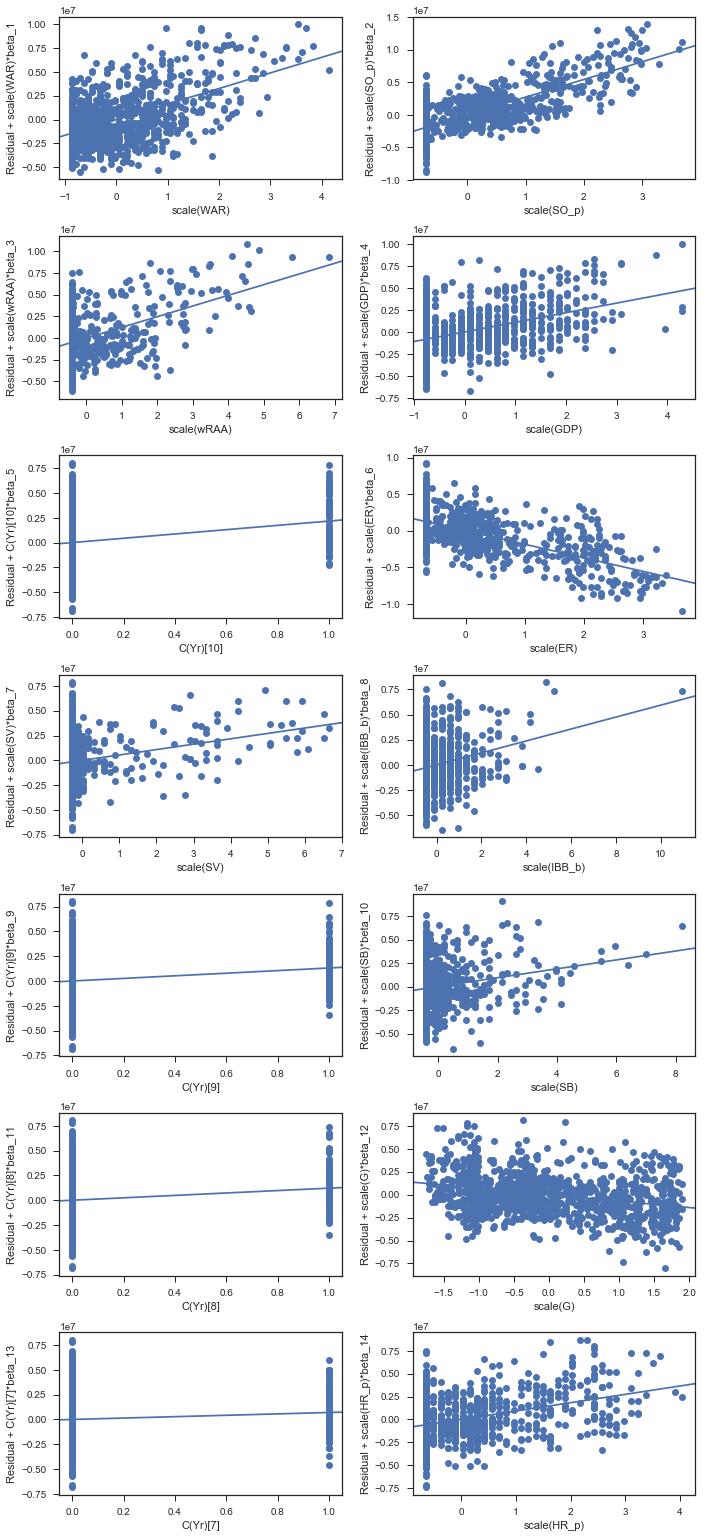

In [63]:
fig = plt.figure(figsize=(10, 25))
sm.graphics.plot_ccpr_grid(result4_idx_elimVer_filt, fig=fig)
fig.suptitle("")
plt.show()

## * Trying to another OLS Modeling

## 1. Numeric Variables ONLY

In [64]:
converted_num_ols = " + ".join(num_cols_list)

num_ols_model = model_str + converted_num_ols
num_ols_model

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP)'

### * 5th OLS analysis

In [65]:
model5 = sm.OLS.from_formula(num_ols_model, df)
result5 = model5.fit()
print(result5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     35.19
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.04e-229
Time:                        14:34:45   Log-Likelihood:                -19963.
No. Observations:                1225   AIC:                         4.006e+04
Df Residuals:                    1158   BIC:                         4.040e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.817e+06    

In [66]:
dfX_num1 = df_x.iloc[:, 2:68]
dfX_num1.tail()

G     AB     PA    H_b   Hits  Doubles  Triples  HR_b   R_b   RBI  \
1220   84  319.0  344.0   83.0   57.0     13.0      1.0  12.0  35.0  47.0   
1221    1    0.0    0.0    0.0    0.0      0.0      0.0   0.0   0.0   0.0   
1222  113  416.0  457.0  110.0   72.0     24.0      0.0  14.0  41.0  68.0   
1223  131  482.0  523.0  148.0  101.0     25.0      0.0  22.0  58.0  80.0   
1224  132  479.0  543.0  134.0   77.0     25.0      1.0  31.0  72.0  86.0   

      BB_b  IBB_b   SO_b  BB_Percent  K_Percent  BB_per_K  BABIP_b  HBP_b  \
1220  19.0    0.0   60.0         5.5       17.4      0.32    0.284    2.0   
1221   0.0    0.0    0.0         0.0        0.0      0.00    0.000    0.0   
1222  33.0    3.0  121.0         7.2       26.5      0.27    0.337    4.0   
1223  35.0    2.0   79.0         6.7       15.1      0.44    0.327    2.0   
1224  51.0    8.0  108.0         9.4       19.9      0.47    0.298    7.0   

       SF   SH   GDP   SB   CS  Def    ISO   wOBA  wRAA    AVG    OBP    SLG  \
1220  3.0  1.0  11.0  1.0  0.0  0.0  0.160  0.311   0.0  0.260  0.303  0.420   
1221  0.0  0.0   0.0  0.0  0.0  0.0  0.000  0.000   0.0  0.000  0.000  0.000   
1222  4.0  0.0   5.0  2.0  0.0  9.8  0.159  0.319   0.4  0.264  0.322  0.423   
1223  4.0  0.0  17.0  0.0  0.0  8.4  0.189  0.361  18.7  0.307  0.354  0.496   
1224  6.0  0.0  14.0  3.0  1.0  0.0  0.251  0.369  22.8  0.280  0.354  0.530   

        OPS  WAR  wRC_Plus   WPA    W    L   GS   CG   IP  H_p  HR_p  BB_p  \
1220  0.723  0.0      91.0  0.50  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
1221  0.000  0.1       0.0  0.00  0.0  1.0  1.0  0.0  5.1  9.0   0.0   1.0   
1222  0.745  1.6      91.0  0.64  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
1223  0.850  3.4     124.0  2.58  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
1224  0.884  3.2     135.0  3.21  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   

      SO_p  R_p   SV   BS   BK   ER  HBP_p  HLD  IBB_p  ShO   TBF   WP  \
1220   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   
1221   5.0  8.0  0.0  0.0  0.0  7.0    2.0  0.0    0.0  0.0  27.0  1.0   
1222   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   
1223   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   
1224   0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0    0.0  0.0   0.0  0.0   

      HR_per_9  BB_per_9  K_per_9  K_per_BB  K_BB_Percent  GB_Percent  \
1220       0.0      0.00     0.00       0.0           0.0         0.0   
1221       0.0      1.69     8.44       5.0          14.8        47.4   
1222       0.0      0.00     0.00       0.0           0.0         0.0   
1223       0.0      0.00     0.00       0.0           0.0         0.0   
1224       0.0      0.00     0.00       0.0           0.0         0.0   

      HR_per_FB  LOB_Percent    ERA  BABIP_p   FIP  WHIP  
1220        0.0          0.0   0.00    0.000  0.00  0.00  
1221        0.0         33.3  11.81    0.474  2.96  1.88  
1222        0.0          0.0   0.00    0.000  0.00  0.00  
1223        0.0          0.0   0.00    0.000  0.00  0.00  
1224        0.0          0.0   0.00    0.000  0.00  0.00

In [67]:
model5_1 = sm.OLS(dfY, dfX_num1)
result5_1 = model5_1.fit()
print(result5_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     83.05
Date:                Wed, 24 Jan 2018   Prob (F-statistic):               0.00
Time:                        14:34:45   Log-Likelihood:                -19968.
No. Observations:                1225   AIC:                         4.007e+04
Df Residuals:                    1159   BIC:                         4.041e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
G            -4.047e+04   8325.723     -4.861   

In [68]:
dfX_num2 = df_x_copy.iloc[:, 2:68]
dfX_num2.tail()

scale(G)  scale(AB)  scale(PA)  scale(H_b)  scale(Hits)  scale(Doubles)  \
1220        84      319.0      344.0        83.0         57.0            13.0   
1221         1        0.0        0.0         0.0          0.0             0.0   
1222       113      416.0      457.0       110.0         72.0            24.0   
1223       131      482.0      523.0       148.0        101.0            25.0   
1224       132      479.0      543.0       134.0         77.0            25.0   

      scale(Triples)  scale(HR_b)  scale(R_b)  scale(RBI)  scale(BB_b)  \
1220             1.0         12.0        35.0        47.0         19.0   
1221             0.0          0.0         0.0         0.0          0.0   
1222             0.0         14.0        41.0        68.0         33.0   
1223             0.0         22.0        58.0        80.0         35.0   
1224             1.0         31.0        72.0        86.0         51.0   

      scale(IBB_b)  scale(SO_b)  scale(BB_Percent)  scale(K_Percent)  \
1220           0.0         60.0                5.5              17.4   
1221           0.0          0.0                0.0               0.0   
1222           3.0        121.0                7.2              26.5   
1223           2.0         79.0                6.7              15.1   
1224           8.0        108.0                9.4              19.9   

      scale(BB_per_K)  scale(BABIP_b)  scale(HBP_b)  scale(SF)  scale(SH)  \
1220             0.32           0.284           2.0        3.0        1.0   
1221             0.00           0.000           0.0        0.0        0.0   
1222             0.27           0.337           4.0        4.0        0.0   
1223             0.44           0.327           2.0        4.0        0.0   
1224             0.47           0.298           7.0        6.0        0.0   

      scale(GDP)  scale(SB)  scale(CS)  scale(Def)  scale(ISO)  scale(wOBA)  \
1220        11.0        1.0        0.0         0.0       0.160        0.311   
1221         0.0        0.0        0.0         0.0       0.000        0.000   
1222         5.0        2.0        0.0         9.8       0.159        0.319   
1223        17.0        0.0        0.0         8.4       0.189        0.361   
1224        14.0        3.0        1.0         0.0       0.251        0.369   

      scale(wRAA)  scale(AVG)  scale(OBP)  scale(SLG)  scale(OPS)  scale(WAR)  \
1220          0.0       0.260       0.303       0.420       0.723         0.0   
1221          0.0       0.000       0.000       0.000       0.000         0.1   
1222          0.4       0.264       0.322       0.423       0.745         1.6   
1223         18.7       0.307       0.354       0.496       0.850         3.4   
1224         22.8       0.280       0.354       0.530       0.884         3.2   

      scale(wRC_Plus)  scale(WPA)  scale(W)  scale(L)  scale(GS)  scale(CG)  \
1220             91.0        0.50       0.0       0.0        0.0        0.0   
1221              0.0        0.00       0.0       1.0        1.0        0.0   
1222             91.0        0.64       0.0       0.0        0.0        0.0   
1223            124.0        2.58       0.0       0.0        0.0        0.0   
1224            135.0        3.21       0.0       0.0        0.0        0.0   

      scale(IP)  scale(H_p)  scale(HR_p)  scale(BB_p)  scale(SO_p)  \
1220        0.0         0.0          0.0          0.0          0.0   
1221        5.1         9.0          0.0          1.0          5.0   
1222        0.0         0.0          0.0          0.0          0.0   
1223        0.0         0.0          0.0          0.0          0.0   
1224        0.0         0.0          0.0          0.0          0.0   

      scale(R_p)  scale(SV)  scale(BS)  scale(BK)  scale(ER)  scale(HBP_p)  \
1220         0.0        0.0        0.0        0.0        0.0           0.0   
1221         8.0        0.0        0.0        0.0        7.0           2.0   
1222         0.0        0.0        0.0        0.0        0.0           0.0   
1223    

In [69]:
model5_2 = sm.OLS(dfY, dfX_num2)
result5_2 = model5_2.fit()
print(result5_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     83.05
Date:                Wed, 24 Jan 2018   Prob (F-statistic):               0.00
Time:                        14:34:45   Log-Likelihood:                -19968.
No. Observations:                1225   AIC:                         4.007e+04
Df Residuals:                    1159   BIC:                         4.041e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
scale(G)            -4.047e+04   8

## * Eliminating Outliers of 5th OLS analysis RESULT

In [70]:
def elim_outliers(result, dfX):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [71]:
idx5_1 = elim_outliers(result5_1, dfX_num1)
print(idx5_1, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx5_1)))

[   6    7    8   11   13   19   24   28   36   44   49   54   65   66  105
  113  115  119  144  158  187  197  200  202  244  248  252  270  272  291
  314  331  333  391  393  394  401  405  411  416  438  446  447  460  465
  499  507  539  540  549  558  571  605  683  691  696  737  743  747  753
  757  766  782  791  794  797  801  814  826  837  914  918  958  993 1000
 1020 1027 1049 1059 1073 1077 1088 1091 1096 1106 1108 1115 1135 1156 1188
 1196 1221 1224] 

There are '93' Outliers according to Fox criteria


In [72]:
idx5_2 = elim_outliers(result5_2, dfX_num2)
print(idx5_2, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx5_2)))

[   6    7    8   11   13   19   24   28   36   44   49   54   65   66  105
  113  115  119  144  158  187  197  200  202  244  248  252  270  272  291
  314  331  333  391  393  394  401  405  411  416  438  446  447  460  465
  499  507  539  540  549  558  571  605  683  691  696  737  743  747  753
  757  766  782  791  794  797  801  814  826  837  914  918  958  993 1000
 1020 1027 1049 1059 1073 1077 1088 1091 1096 1106 1108 1115 1135 1156 1188
 1196 1221 1224] 

There are '93' Outliers according to Fox criteria


In [73]:
dfX5_idx = dfX_num1.drop(idx5_1)
dfY_idx5 = dfY.drop(idx5_1)

### * 5-1 OLS analysis

In [74]:
dfX5_idx_elimVer = sm.add_constant(dfX5_idx)
model5_idx_elimVer = sm.OLS(dfY_idx5, dfX5_idx_elimVer)
result5_idx_elimVer = model5_idx_elimVer.fit()
print(result5_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     43.58
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.28e-253
Time:                        14:34:45   Log-Likelihood:                -18110.
No. Observations:                1132   AIC:                         3.635e+04
Df Residuals:                    1066   BIC:                         3.668e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.871e+06   9.99e+05      1.872   

## * Filtrating P-VALUE under 5% above model

In [75]:
dfX_num_elim_pvals = extracted_pvals(result5_idx_elimVer, 0.05)

extracted_features5_num_elim = list(dfX_num_elim_pvals.index.values)
extracted_df_num_elim_x = dfX5_idx_elimVer.loc[:, extracted_features5_num_elim]

### * 5-2 OLS analysis

In [76]:
dfX_num_elim = sm.add_constant(extracted_df_num_elim_x)

model_df_num_elim = sm.OLS(dfY_idx5, dfX_num_elim)
result_df_num_elim = model_df_num_elim.fit()
print(result_df_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.91e-257
Time:                        14:34:45   Log-Likelihood:                -18201.
No. Observations:                1132   AIC:                         3.644e+04
Df Residuals:                    1111   BIC:                         3.655e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.74e+06   5.14e+05      3.386      0.0

## * Filtrating P-VALUE under 5% above model 2

In [77]:
dfX_num_elim_pvals2 = extracted_pvals(result_df_num_elim, 0.05)

extracted_features5_num_elim2 = list(dfX_num_elim_pvals2.index.values)
extracted_df_num_elim_x2 = dfX_num_elim.loc[:, extracted_features5_num_elim2]

### * 5-3 OLS analysis

In [78]:
dfX_num_elim3 = sm.add_constant(extracted_df_num_elim_x2)

model_df_num_elim3 = sm.OLS(dfY_idx5, dfX_num_elim3)
result_df_num_elim3 = model_df_num_elim3.fit()
print(result_df_num_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     146.9
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.10e-261
Time:                        14:34:45   Log-Likelihood:                -18202.
No. Observations:                1132   AIC:                         3.644e+04
Df Residuals:                    1115   BIC:                         3.652e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SO_p        5.766e+04   5266.359     10.948      0.0

## * 1st Filtrating P-VALUE under 5% of 5th OLS model

In [79]:
dfX5 = dmatrix(converted_num_ols, data=df_x)
dfX_columns5 = dfX5.design_info.column_names
dfX5 = pd.DataFrame(dfX5, columns=dfX_columns5)

In [80]:
p_values5 = extracted_pvals(result5, 0.05)

extracted_features5 = list(p_values5.index.values)
extracted_df_x5 = dfX5.loc[:, extracted_features5]

print(extracted_df_x5.shape)
extracted_df_x5.tail()

(1225, 21)


Intercept  scale(wRAA)  scale(G)  scale(SV)  scale(GDP)  scale(SO_p)  \
1220        1.0    -0.395374  0.130796  -0.271484    1.153062    -0.715004   
1221        1.0    -0.395374 -1.755004  -0.271484   -0.769897    -0.609591   
1222        1.0    -0.339063  0.789689  -0.271484    0.104175    -0.715004   
1223        1.0     2.237176  1.198658  -0.271484    2.201948    -0.715004   
1224        1.0     2.814366  1.221379  -0.271484    1.677505    -0.715004   

      scale(SB)  scale(WAR)  scale(wOBA)  scale(IBB_b)  scale(HR_p)  \
1220  -0.269710   -0.860528     0.881984     -0.476154    -0.648139   
1221  -0.421406   -0.784712    -1.056148     -0.476154    -0.648139   
1222  -0.118014    0.352529     0.931840      0.596068    -0.648139   
1223  -0.421406    1.717219     1.193581      0.238661    -0.648139   
1224   0.033683    1.565586     1.243437      2.383106    -0.648139   

      scale(SLG)  scale(BK)  scale(OBP)  scale(W)  scale(IBB_p)  scale(OPS)  \
1220    0.993282  -0.299392    0.800426 -0.628874     -0.625037    0.912641   
1221   -1.037828  -0.299392   -1.058482 -0.628874     -0.625037   -1.051964   
1222    1.007790  -0.299392    0.916991 -0.628874     -0.625037    0.972422   
1223    1.360816  -0.299392    1.113311 -0.628874     -0.625037    1.257738   
1224    1.525240  -0.299392    1.113311 -0.628874     -0.625037    1.350126   

      scale(K_Percent)  scale(K_per_9)  scale(BABIP_b)  scale(BB_per_9)  
1220          0.680057       -0.897374        0.861173        -0.850686  
1221         -0.949117        1.241561       -1.059341         0.083349  
1222          1.532096       -0.897374        1.219578        -0.850686  
1223          0.464706       -0.897374        1.151955        -0.850686  
1224          0.914134       -0.897374        0.955846        -0.850686

### * 6th OLS analysis

In [81]:
dfX6 = sm.add_constant(extracted_df_x5)

model6 = sm.OLS(dfY, dfX6)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     94.11
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.90e-229
Time:                        14:34:46   Log-Likelihood:                -20061.
No. Observations:                1225   AIC:                         4.016e+04
Df Residuals:                    1204   BIC:                         4.027e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.817e+06   9.02e+04  

## * 2nd Filtrating P-VALUE under 5% of 6th OLS model

In [82]:
p_values6 = extracted_pvals(result6, 0.05)

extracted_features6 = list(p_values6.index.values)
extracted_df_x6 = dfX6.loc[:, extracted_features6]

print(extracted_df_x6.shape)
extracted_df_x6.tail()

(1225, 17)


Intercept  scale(WAR)  scale(wRAA)  scale(SO_p)  scale(GDP)  scale(SV)  \
1220        1.0   -0.860528    -0.395374    -0.715004    1.153062  -0.271484   
1221        1.0   -0.784712    -0.395374    -0.609591   -0.769897  -0.271484   
1222        1.0    0.352529    -0.339063    -0.715004    0.104175  -0.271484   
1223        1.0    1.717219     2.237176    -0.715004    2.201948  -0.271484   
1224        1.0    1.565586     2.814366    -0.715004    1.677505  -0.271484   

      scale(SB)  scale(IBB_p)  scale(HR_p)  scale(G)  scale(BB_per_9)  \
1220  -0.269710     -0.625037    -0.648139  0.130796        -0.850686   
1221  -0.421406     -0.625037    -0.648139 -1.755004         0.083349   
1222  -0.118014     -0.625037    -0.648139  0.789689        -0.850686   
1223  -0.421406     -0.625037    -0.648139  1.198658        -0.850686   
1224   0.033683     -0.625037    -0.648139  1.221379        -0.850686   

      scale(IBB_b)  scale(K_Percent)  scale(SLG)  scale(OBP)  scale(OPS)  \
1220     -0.476154          0.680057    0.993282    0.800426    0.912641   
1221     -0.476154         -0.949117   -1.037828   -1.058482   -1.051964   
1222      0.596068          1.532096    1.007790    0.916991    0.972422   
1223      0.238661          0.464706    1.360816    1.113311    1.257738   
1224      2.383106          0.914134    1.525240    1.113311    1.350126   

      scale(BABIP_b)  
1220        0.861173  
1221       -1.059341  
1222        1.219578  
1223        1.151955  
1224        0.955846

### * 7th OLS analysis

In [83]:
dfX7 = sm.add_constant(extracted_df_x6)

model7 = sm.OLS(dfY, dfX7)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.02e-231
Time:                        14:34:46   Log-Likelihood:                -20064.
No. Observations:                1225   AIC:                         4.016e+04
Df Residuals:                    1208   BIC:                         4.025e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.817e+06   9.04e+04  

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [84]:
yr_str = 'C(Yr) + '

cat_num_ols_list = model_str + yr_str + converted_num_ols + zero
cat_num_ols_list

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 8th OLS analysis

In [85]:
model8 = sm.OLS.from_formula(cat_num_ols_list, df)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     32.76
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          7.43e-235
Time:                        14:34:47   Log-Likelihood:                -19931.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1148   BIC:                         4.041e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             4.356e+06   3

In [86]:
dfX8_num1 = df_x_copy.iloc[:, 0:1]
dfX8_num2 = df_x_copy.iloc[:, 2:68]
dfX8_num = pd.concat([dfX8_num1, dfX8_num2], axis=1)
dfX8_num.tail()

C(Yr)  scale(G)  scale(AB)  scale(PA)  scale(H_b)  scale(Hits)  \
1220     10        84      319.0      344.0        83.0         57.0   
1221     10         1        0.0        0.0         0.0          0.0   
1222     10       113      416.0      457.0       110.0         72.0   
1223     10       131      482.0      523.0       148.0        101.0   
1224     10       132      479.0      543.0       134.0         77.0   

      scale(Doubles)  scale(Triples)  scale(HR_b)  scale(R_b)  scale(RBI)  \
1220            13.0             1.0         12.0        35.0        47.0   
1221             0.0             0.0          0.0         0.0         0.0   
1222            24.0             0.0         14.0        41.0        68.0   
1223            25.0             0.0         22.0        58.0        80.0   
1224            25.0             1.0         31.0        72.0        86.0   

      scale(BB_b)  scale(IBB_b)  scale(SO_b)  scale(BB_Percent)  \
1220         19.0           0.0         60.0                5.5   
1221          0.0           0.0          0.0                0.0   
1222         33.0           3.0        121.0                7.2   
1223         35.0           2.0         79.0                6.7   
1224         51.0           8.0        108.0                9.4   

      scale(K_Percent)  scale(BB_per_K)  scale(BABIP_b)  scale(HBP_b)  \
1220              17.4             0.32           0.284           2.0   
1221               0.0             0.00           0.000           0.0   
1222              26.5             0.27           0.337           4.0   
1223              15.1             0.44           0.327           2.0   
1224              19.9             0.47           0.298           7.0   

      scale(SF)  scale(SH)  scale(GDP)  scale(SB)  scale(CS)  scale(Def)  \
1220        3.0        1.0        11.0        1.0        0.0         0.0   
1221        0.0        0.0         0.0        0.0        0.0         0.0   
1222        4.0        0.0         5.0        2.0        0.0         9.8   
1223        4.0        0.0        17.0        0.0        0.0         8.4   
1224        6.0        0.0        14.0        3.0        1.0         0.0   

      scale(ISO)  scale(wOBA)  scale(wRAA)  scale(AVG)  scale(OBP)  \
1220       0.160        0.311          0.0       0.260       0.303   
1221       0.000        0.000          0.0       0.000       0.000   
1222       0.159        0.319          0.4       0.264       0.322   
1223       0.189        0.361         18.7       0.307       0.354   
1224       0.251        0.369         22.8       0.280       0.354   

      scale(SLG)  scale(OPS)  scale(WAR)  scale(wRC_Plus)  scale(WPA)  \
1220       0.420       0.723         0.0             91.0        0.50   
1221       0.000       0.000         0.1              0.0        0.00   
1222       0.423       0.745         1.6             91.0        0.64   
1223       0.496       0.850         3.4            124.0        2.58   
1224       0.530       0.884         3.2            135.0        3.21   

      scale(W)  scale(L)  scale(GS)  scale(CG)  scale(IP)  scale(H_p)  \
1220       0.0       0.0        0.0        0.0        0.0         0.0   
1221       0.0       1.0        1.0        0.0        5.1         9.0   
1222       0.0       0.0        0.0        0.0        0.0         0.0   
1223       0.0       0.0        0.0        0.0        0.0         0.0   
1224       0.0       0.0        0.0        0.0        0.0         0.0   

      scale(HR_p)  scale(BB_p)  scale(SO_p)  scale(R_p)  scale(SV)  scale(BS)  \
1220          0.0          0.0          0.0         0.0        0.0        0.0   
1221          0.0          1.0          5.0         8.0        0.0        0.0   
1222          0.0          0.0          0.0         0.0        0.0        0.0   
1223          0.0          0.0          0.0         0.0        0.0        0.0   
1224          0.0          0.0          0.0         0.0        0.0        0.0   

      scale(BK)  scale(ER

In [87]:
dfX8_1 = sm.add_constant(dfX8_num)
model8_1 = sm.OLS(dfY, dfX8_1)
result8_1 = model8_1.fit()
print(result8_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     36.26
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.87e-236
Time:                        14:34:47   Log-Likelihood:                -19944.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1157   BIC:                         4.037e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.012e+06   1

## * Eliminating Outliers of 8th Model

In [88]:
converted_yr_num_list = yr_str + converted_num_ols +zero
converted_yr_num_list

'C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [89]:
dfX8_elim = dmatrix(converted_yr_num_list, df)
dfX8_columns_elim = dfX8_elim.design_info.column_names
dfX8_elim = pd.DataFrame(dfX8_elim, columns=dfX8_columns_elim)

In [90]:
def elim_outliers(result, dfX):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [91]:
idx_yr_num = elim_outliers(result8, dfX8_num)
print(idx_yr_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_yr_num)))

[   7    8   11   13   19   28   36   41   43   44   65   66  105  113  115
  118  119  132  137  144  155  158  187  200  202  220  244  248  252  259
  270  272  291  333  393  397  405  411  438  460  499  507  539  549  558
  571  605  631  683  737  743  747  753  766  791  800  801  802  814  826
  837  914  958  993 1000 1020 1036 1041 1049 1073 1077 1088 1091 1096 1106
 1115 1135 1156 1174 1180 1188 1196 1209 1221 1224] 

There are '85' Outliers according to Fox criteria


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [92]:
dfX8_yr_num_idx = dfX8_elim.drop(idx_yr_num)
dfY8_yr_num_idx = dfY.drop(idx_yr_num)

### * 8-1 OLS analysis

In [93]:
dfX8_yr_num_idx_elim = sm.add_constant(dfX8_yr_num_idx)
model8_yr_num_idx_elim = sm.OLS(dfY8_yr_num_idx, dfX8_yr_num_idx_elim)
result8_yr_num_idx_elim = model8_yr_num_idx_elim.fit()
print(result8_yr_num_idx_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     38.58
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.16e-253
Time:                        14:34:48   Log-Likelihood:                -18208.
No. Observations:                1140   AIC:                         3.657e+04
Df Residuals:                    1063   BIC:                         3.696e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.282e+06   6

## * Filtrating P-VALUE under 5% above model

In [94]:
idx_yr_num2 = extracted_pvals(result8_yr_num_idx_elim, 0.05)

extracted_feature_yr_num_elim = idx_yr_num2.index.values
extracted_yr_num_elim_x = dfX8_yr_num_idx_elim.loc[:, extracted_feature_yr_num_elim]

### * 8-2 OLS analysis

In [95]:
dfX8_yr_num_idx_elim2 = sm.add_constant(extracted_yr_num_elim_x)
model8_yr_num_idx_elim2 = sm.OLS(dfY8_yr_num_idx, dfX8_yr_num_idx_elim2)
result8_yr_num_idx_elim2 = model8_yr_num_idx_elim2.fit()
print(result8_yr_num_idx_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     80.46
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.71e-244
Time:                        14:34:48   Log-Likelihood:                -18332.
No. Observations:                1140   AIC:                         3.672e+04
Df Residuals:                    1111   BIC:                         3.687e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.453e+06   1.08e+0

## * Filtrating P-VALUE under 5% above model

In [96]:
idx_yr_num3 = extracted_pvals(result8_yr_num_idx_elim2, 0.05)

extracted_feature_yr_num_elim2 = idx_yr_num3.index.values
extracted_yr_num_elim_x2 = dfX8_yr_num_idx_elim2.loc[:, extracted_feature_yr_num_elim2]

### * 8-3 OLS analysis

In [97]:
dfX8_yr_num_idx_elim3 = sm.add_constant(extracted_yr_num_elim_x2)
model8_yr_num_idx_elim3 = sm.OLS(dfY8_yr_num_idx, dfX8_yr_num_idx_elim3)
result8_yr_num_idx_elim3 = model8_yr_num_idx_elim3.fit()
print(result8_yr_num_idx_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.74e-251
Time:                        14:34:48   Log-Likelihood:                -18334.
No. Observations:                1140   AIC:                         3.671e+04
Df Residuals:                    1119   BIC:                         3.682e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.434e+06   9.41e+04  

## * 1st Filtrating P-VALUE under 5% of 8th OLS model

In [98]:
filtration_str_list = yr_str + converted_num_ols + zero

dfX8 = dmatrix(filtration_str_list, data=df_x)
dfX_columns8 = dfX8.design_info.column_names
dfX8 = pd.DataFrame(dfX8, columns=dfX_columns8)

In [99]:
p_values8 = extracted_pvals(result8, 0.05)

extracted_features8 = list(p_values8.index.values)
extracted_df_x8 = dfX8.loc[:, extracted_features8]

print(extracted_df_x8.shape)
extracted_df_x8.tail()

(1225, 30)


C(Yr)[9]  C(Yr)[10]  C(Yr)[3]  C(Yr)[7]  C(Yr)[6]  C(Yr)[8]  C(Yr)[0]  \
1220       0.0        1.0       0.0       0.0       0.0       0.0       0.0   
1221       0.0        1.0       0.0       0.0       0.0       0.0       0.0   
1222       0.0        1.0       0.0       0.0       0.0       0.0       0.0   
1223       0.0        1.0       0.0       0.0       0.0       0.0       0.0   
1224       0.0        1.0       0.0       0.0       0.0       0.0       0.0   

      C(Yr)[1]  C(Yr)[2]  C(Yr)[4]  C(Yr)[5]  scale(G)  scale(SV)  \
1220       0.0       0.0       0.0       0.0  0.130796  -0.271484   
1221       0.0       0.0       0.0       0.0 -1.755004  -0.271484   
1222       0.0       0.0       0.0       0.0  0.789689  -0.271484   
1223       0.0       0.0       0.0       0.0  1.198658  -0.271484   
1224       0.0       0.0       0.0       0.0  1.221379  -0.271484   

      scale(IBB_b)  scale(GDP)  scale(WAR)  scale(SB)  scale(wRAA)  \
1220     -0.476154    1.153062   -0.860528  -0.269710    -0.395374   
1221     -0.476154   -0.769897   -0.784712  -0.421406    -0.395374   
1222      0.596068    0.104175    0.352529  -0.118014    -0.339063   
1223      0.238661    2.201948    1.717219  -0.421406     2.237176   
1224      2.383106    1.677505    1.565586   0.033683     2.814366   

      scale(SO_p)  scale(HR_p)  scale(SLG)  scale(BK)  scale(OPS)  scale(ER)  \
1220    -0.715004    -0.648139    0.993282  -0.299392    0.912641  -0.672842   
1221    -0.609591    -0.648139   -1.037828  -0.299392   -1.051964  -0.431779   
1222    -0.715004    -0.648139    1.007790  -0.299392    0.972422  -0.672842   
1223    -0.715004    -0.648139    1.360816  -0.299392    1.257738  -0.672842   
1224    -0.715004    -0.648139    1.525240  -0.299392    1.350126  -0.672842   

      scale(K_Percent)  scale(BB_per_9)  scale(OBP)  scale(W)  scale(BABIP_b)  \
1220          0.680057        -0.850686    0.800426 -0.628874        0.861173   
1221         -0.949117         0.083349   -1.058482 -0.628874       -1.059341   
1222          1.532096        -0.850686    0.916991 -0.628874        1.219578   
1223          0.464706        -0.850686    1.113311 -0.628874        1.151955   
1224          0.914134        -0.850686    1.113311 -0.628874        0.955846   

      scale(IBB_p)  
1220     -0.625037  
1221     -0.625037  
1222     -0.625037  
1223     -0.625037  
1224     -0.625037

### * 9th OLS analysis

In [100]:
dfX9 = sm.add_constant(extracted_df_x8)

model9 = sm.OLS(dfY, dfX9)
result9 = model9.fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     76.48
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.26e-248
Time:                        14:34:49   Log-Likelihood:                -19994.
No. Observations:                1225   AIC:                         4.005e+04
Df Residuals:                    1195   BIC:                         4.020e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.502e+06   8.14e+04  

## * 2nd Filtrating P-VALUE under 5% of 9th OLS model

In [101]:
p_values9 = extracted_pvals(result9, 0.05)

extracted_features9 = list(p_values9.index.values)
extracted_df_x9 = dfX9.loc[:, extracted_features9]

print(extracted_df_x9.shape)
extracted_df_x9.tail()

(1225, 23)


const  scale(WAR)  scale(SO_p)  scale(GDP)  scale(wRAA)  scale(SV)  \
1220    1.0   -0.860528    -0.715004    1.153062    -0.395374  -0.271484   
1221    1.0   -0.784712    -0.609591   -0.769897    -0.395374  -0.271484   
1222    1.0    0.352529    -0.715004    0.104175    -0.339063  -0.271484   
1223    1.0    1.717219    -0.715004    2.201948     2.237176  -0.271484   
1224    1.0    1.565586    -0.715004    1.677505     2.814366  -0.271484   

      scale(SB)  scale(ER)  C(Yr)[10]  C(Yr)[9]  scale(IBB_b)  C(Yr)[8]  \
1220  -0.269710  -0.672842        1.0       0.0     -0.476154       0.0   
1221  -0.421406  -0.431779        1.0       0.0     -0.476154       0.0   
1222  -0.118014  -0.672842        1.0       0.0      0.596068       0.0   
1223  -0.421406  -0.672842        1.0       0.0      0.238661       0.0   
1224   0.033683  -0.672842        1.0       0.0      2.383106       0.0   

      scale(G)  scale(W)  C(Yr)[3]  scale(IBB_p)  scale(SLG)  scale(OPS)  \
1220  0.130796 -0.628874       0.0     -0.625037    0.993282    0.912641   
1221 -1.755004 -0.628874       0.0     -0.625037   -1.037828   -1.051964   
1222  0.789689 -0.628874       0.0     -0.625037    1.007790    0.972422   
1223  1.198658 -0.628874       0.0     -0.625037    1.360816    1.257738   
1224  1.221379 -0.628874       0.0     -0.625037    1.525240    1.350126   

      scale(OBP)  scale(BABIP_b)  C(Yr)[7]  scale(BK)  scale(HR_p)  
1220    0.800426        0.861173       0.0  -0.299392    -0.648139  
1221   -1.058482       -1.059341       0.0  -0.299392    -0.648139  
1222    0.916991        1.219578       0.0  -0.299392    -0.648139  
1223    1.113311        1.151955       0.0  -0.299392    -0.648139  
1224    1.113311        0.955846       0.0  -0.299392    -0.648139

### * 10th OLS analysis

In [102]:
dfX10 = sm.add_constant(extracted_df_x9)

model10 = sm.OLS(dfY, dfX10)
result10 = model10.fit()
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.90e-253
Time:                        14:34:49   Log-Likelihood:                -20000.
No. Observations:                1225   AIC:                         4.005e+04
Df Residuals:                    1202   BIC:                         4.016e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.481e+06   1.27e+05     35.

## Eliminating Outliers of 10th OLS analysis RESULT

In [103]:
def elim_outliers(result):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX10.columns) - 1)
    idx10 = np.where(cooks_d2 > fox_cr)[0]
    
    return idx10

In [104]:
idx10 = elim_outliers(result10)
print(idx10, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx10)))

[   7   13   15   19   28   36   41   53   66  105  113  115  119  137  144
  157  187  197  202  248  252  270  272  304  391  393  397  401  405  411
  416  438  457  460  462  489  499  501  502  507  539  540  549  558  571
  605  737  747  766  782  791  797  800  804  814  826  837  914  923  926
  953  958  976  993 1000 1020 1022 1036 1041 1049 1059 1073 1077 1088 1091
 1096 1106 1135 1156 1164 1177 1180 1183 1188 1189 1199 1202 1209 1223 1224] 

There are '90' Outliers according to Fox criteria


In [105]:
dfX10_idx = dfX10.drop(idx10)
dfY_idx10 = dfY.drop(idx10)

### * 10-1 OLS analysis

In [106]:
dfX10_idx_elimVer = sm.add_constant(dfX10_idx)
model10_idx_elimVer = sm.OLS(dfY_idx10, dfX10_idx_elimVer)
result10_idx_elimVer = model10_idx_elimVer.fit()
print(result10_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          3.16e-264
Time:                        14:34:50   Log-Likelihood:                -18189.
No. Observations:                1135   AIC:                         3.642e+04
Df Residuals:                    1112   BIC:                         3.654e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.287e+06   9.74e+04     44.

##  Filtrating P-VALUE under 5% of 10-1 OLS model

In [107]:
p_values10_1 = extracted_pvals(result10_idx_elimVer, 0.05)

extracted_features10_1 = list(p_values10_1.index.values)
extracted_df_x10_1= dfX10_idx_elimVer.loc[:, extracted_features10_1]

### * 10-2 OLS analysis

In [108]:
dfX10_2 = sm.add_constant(extracted_df_x10_1)

model10_2 = sm.OLS(dfY_idx10, dfX10_2)
result10_2 = model10_2.fit()
print(result10_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     151.5
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.76e-266
Time:                        14:34:50   Log-Likelihood:                -18199.
No. Observations:                1135   AIC:                         3.643e+04
Df Residuals:                    1118   BIC:                         3.652e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.294e+06   9.76e+04     43.989   

## 3. Categorical Variable(Team) + Numeric Variables + ZERO

In [109]:
team_str = 'C(Team) + '

cat_num_ols_list2 = model_str + team_str + converted_num_ols + zero
cat_num_ols_list2

'Salary ~ C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 11th OLS analysis

In [110]:
model11 = sm.OLS.from_formula(cat_num_ols_list2, df)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     24.50
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.29e-215
Time:                        14:34:50   Log-Likelihood:                -19942.
No. Observations:                1225   AIC:                         4.008e+04
Df Residuals:                    1127   BIC:                         4.058e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]           7.098e+06   3

In [111]:
dfX11_num1 = df_x_copy.iloc[:, 1:2]
dfX11_num2 = df_x_copy.iloc[:, 2:68]
dfX11_num = pd.concat([dfX11_num1, dfX11_num2], axis=1)
dfX11_num.tail()

C(Team)  scale(G)  scale(AB)  scale(PA)  scale(H_b)  scale(Hits)  \
1220       29        84      319.0      344.0        83.0         57.0   
1221       19         1        0.0        0.0         0.0          0.0   
1222       10       113      416.0      457.0       110.0         72.0   
1223       17       131      482.0      523.0       148.0        101.0   
1224       16       132      479.0      543.0       134.0         77.0   

      scale(Doubles)  scale(Triples)  scale(HR_b)  scale(R_b)  scale(RBI)  \
1220            13.0             1.0         12.0        35.0        47.0   
1221             0.0             0.0          0.0         0.0         0.0   
1222            24.0             0.0         14.0        41.0        68.0   
1223            25.0             0.0         22.0        58.0        80.0   
1224            25.0             1.0         31.0        72.0        86.0   

      scale(BB_b)  scale(IBB_b)  scale(SO_b)  scale(BB_Percent)  \
1220         19.0           0.0         60.0                5.5   
1221          0.0           0.0          0.0                0.0   
1222         33.0           3.0        121.0                7.2   
1223         35.0           2.0         79.0                6.7   
1224         51.0           8.0        108.0                9.4   

      scale(K_Percent)  scale(BB_per_K)  scale(BABIP_b)  scale(HBP_b)  \
1220              17.4             0.32           0.284           2.0   
1221               0.0             0.00           0.000           0.0   
1222              26.5             0.27           0.337           4.0   
1223              15.1             0.44           0.327           2.0   
1224              19.9             0.47           0.298           7.0   

      scale(SF)  scale(SH)  scale(GDP)  scale(SB)  scale(CS)  scale(Def)  \
1220        3.0        1.0        11.0        1.0        0.0         0.0   
1221        0.0        0.0         0.0        0.0        0.0         0.0   
1222        4.0        0.0         5.0        2.0        0.0         9.8   
1223        4.0        0.0        17.0        0.0        0.0         8.4   
1224        6.0        0.0        14.0        3.0        1.0         0.0   

      scale(ISO)  scale(wOBA)  scale(wRAA)  scale(AVG)  scale(OBP)  \
1220       0.160        0.311          0.0       0.260       0.303   
1221       0.000        0.000          0.0       0.000       0.000   
1222       0.159        0.319          0.4       0.264       0.322   
1223       0.189        0.361         18.7       0.307       0.354   
1224       0.251        0.369         22.8       0.280       0.354   

      scale(SLG)  scale(OPS)  scale(WAR)  scale(wRC_Plus)  scale(WPA)  \
1220       0.420       0.723         0.0             91.0        0.50   
1221       0.000       0.000         0.1              0.0        0.00   
1222       0.423       0.745         1.6             91.0        0.64   
1223       0.496       0.850         3.4            124.0        2.58   
1224       0.530       0.884         3.2            135.0        3.21   

      scale(W)  scale(L)  scale(GS)  scale(CG)  scale(IP)  scale(H_p)  \
1220       0.0       0.0        0.0        0.0        0.0         0.0   
1221       0.0       1.0        1.0        0.0        5.1         9.0   
1222       0.0       0.0        0.0        0.0        0.0         0.0   
1223       0.0       0.0        0.0        0.0        0.0         0.0   
1224       0.0       0.0        0.0        0.0        0.0         0.0   

      scale(HR_p)  scale(BB_p)  scale(SO_p)  scale(R_p)  scale(SV)  scale(BS)  \
1220          0.0          0.0          0.0         0.0        0.0        0.0   
1221          0.0          1.0          5.0         8.0        0.0        0.0   
1222          0.0          0.0          0.0         0.0        0.0        0.0   
1223          0.0          0.0          0.0         0.0        0.0        0.0   
1224          0.0          0.0          0.0         0.0        0.0        0.0   

      scale(B

In [112]:
dfX11_1 = sm.add_constant(dfX11_num)
model11_1 = sm.OLS(dfY, dfX11_1)
result11_1 = model11_1.fit()
print(result11_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     35.04
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          7.80e-231
Time:                        14:34:51   Log-Likelihood:                -19958.
No. Observations:                1225   AIC:                         4.005e+04
Df Residuals:                    1157   BIC:                         4.040e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.669e+06   1

## * Eliminating Outliers of 11th Model

In [113]:
converted_team_num_list = team_str + converted_num_ols +zero
converted_team_num_list

'C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [114]:
dfX11_elim = dmatrix(converted_team_num_list, df)
dfX11_columns_elim = dfX11_elim.design_info.column_names
dfX11_elim = pd.DataFrame(dfX11_elim, columns=dfX11_columns_elim)

In [115]:
def elim_outliers(result, dfX):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [116]:
idx_team_num = elim_outliers(result11, dfX11_num)
print(idx_team_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_team_num)))

[   6    7    8   11   13   19   28   36   43   44   66   72  105  113  115
  119  137  144  153  187  197  200  220  244  248  252  270  272  291  313
  314  331  333  377  393  394  397  405  411  416  438  446  460  499  507
  539  549  558  571  605  631  737  745  747  753  785  791  800  801  814
  826  837  887  914  958  993 1000 1020 1036 1049 1073 1077 1088 1091 1096
 1106 1115 1135 1156 1188 1196 1221 1224] 

There are '83' Outliers according to Fox criteria


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [117]:
dfX11_team_num_idx = dfX11_elim.drop(idx_team_num)
dfY11_team_num_idx = dfY.drop(idx_team_num)

### * 11-1 OLS analysis

In [118]:
dfX11_team_num_idx_elim = sm.add_constant(dfX11_team_num_idx)
model11_team_num_idx_elim = sm.OLS(dfY11_team_num_idx, dfX11_team_num_idx_elim)
result11_team_num_idx_elim = model11_team_num_idx_elim.fit()
print(result11_team_num_idx_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     29.99
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.28e-238
Time:                        14:34:52   Log-Likelihood:                -18245.
No. Observations:                1142   AIC:                         3.668e+04
Df Residuals:                    1045   BIC:                         3.717e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.501e+06   9

## * Filtrating P-VALUE under 5% above model

In [119]:
idx_team_num2 = extracted_pvals(result11_team_num_idx_elim, 0.05)

extracted_feature_team_num_elim = idx_team_num2.index.values
extracted_team_num_elim_x = dfX11_team_num_idx_elim.loc[:, extracted_feature_team_num_elim]

### * 11-2 OLS analysis

In [120]:
dfX11_team_num_idx_elim2 = sm.add_constant(extracted_team_num_elim_x)
model11_team_num_idx_elim2 = sm.OLS(dfY11_team_num_idx, dfX11_team_num_idx_elim2)
result11_team_num_idx_elim2 = model11_team_num_idx_elim2.fit()
print(result11_team_num_idx_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     86.66
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          3.83e-246
Time:                        14:34:52   Log-Likelihood:                -18369.
No. Observations:                1142   AIC:                         3.679e+04
Df Residuals:                    1115   BIC:                         3.693e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.463e+06   7.63e+0

## * Filtrating P-VALUE under 5% above model

In [121]:
idx_team_num3 = extracted_pvals(result11_team_num_idx_elim2, 0.05)

extracted_feature_team_num_elim2 = idx_team_num3.index.values
extracted_team_num_elim_x2 = dfX11_team_num_idx_elim2.loc[:, extracted_feature_team_num_elim2]

### * 11-3 OLS analysis

In [122]:
dfX11_team_num_idx_elim3 = sm.add_constant(extracted_team_num_elim_x2)
model11_team_num_idx_elim3 = sm.OLS(dfY11_team_num_idx, dfX11_team_num_idx_elim3)
result11_team_num_idx_elim3 = model11_team_num_idx_elim3.fit()
print(result11_team_num_idx_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     138.3
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.42e-252
Time:                        14:34:52   Log-Likelihood:                -18380.
No. Observations:                1142   AIC:                         3.679e+04
Df Residuals:                    1125   BIC:                         3.688e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.481e+06    7.4e+04     60.591   

## * 1st Filtrating P-VALUE under 5% of 11th OLS model

In [123]:
filtration_str_list2 = team_str + converted_num_ols + zero

dfX11 = dmatrix(filtration_str_list2, data=df_x)
dfX_columns11 = dfX11.design_info.column_names
dfX11 = pd.DataFrame(dfX11, columns=dfX_columns11)

In [124]:
p_values11 = extracted_pvals(result11, 0.05)

extracted_features11 = list(p_values11.index.values)
extracted_df_x11 = dfX11.loc[:, extracted_features11]

print(extracted_df_x11.shape)
extracted_df_x11.tail()

(1225, 47)


C(Team)[11]  C(Team)[31]  C(Team)[24]  C(Team)[4]  C(Team)[7]  \
1220          0.0          0.0          0.0         0.0         0.0   
1221          0.0          0.0          0.0         0.0         0.0   
1222          0.0          0.0          0.0         0.0         0.0   
1223          0.0          0.0          0.0         0.0         0.0   
1224          0.0          0.0          0.0         0.0         0.0   

      C(Team)[22]  C(Team)[28]  C(Team)[20]  C(Team)[8]  C(Team)[12]  \
1220          0.0          0.0          0.0         0.0          0.0   
1221          0.0          0.0          0.0         0.0          0.0   
1222          0.0          0.0          0.0         0.0          0.0   
1223          0.0          0.0          0.0         0.0          0.0   
1224          0.0          0.0          0.0         0.0          0.0   

      C(Team)[27]  C(Team)[17]  C(Team)[16]  C(Team)[21]  C(Team)[30]  \
1220          0.0          0.0          0.0          0.0          0.0   
1221          0.0          0.0          0.0          0.0          0.0   
1222          0.0          0.0          0.0          0.0          0.0   
1223          0.0          1.0          0.0          0.0          0.0   
1224          0.0          0.0          1.0          0.0          0.0   

      C(Team)[29]  C(Team)[18]  C(Team)[14]  C(Team)[5]  C(Team)[1]  \
1220          1.0          0.0          0.0         0.0         0.0   
1221          0.0          0.0          0.0         0.0         0.0   
1222          0.0          0.0          0.0         0.0         0.0   
1223          0.0          0.0          0.0         0.0         0.0   
1224          0.0          0.0          0.0         0.0         0.0   

      C(Team)[2]  C(Team)[6]  C(Team)[19]  C(Team)[3]  C(Team)[26]  \
1220         0.0         0.0          0.0         0.0          0.0   
1221         0.0         0.0          1.0         0.0          0.0   
1222         0.0         0.0          0.0         0.0          0.0   
1223         0.0         0.0          0.0         0.0          0.0   
1224         0.0         0.0          0.0         0.0          0.0   

      C(Team)[25]  C(Team)[23]  C(Team)[10]  C(Team)[13]  C(Team)[15]  \
1220          0.0          0.0          0.0          0.0          0.0   
1221          0.0          0.0          0.0          0.0          0.0   
1222          0.0          0.0          1.0          0.0          0.0   
1223          0.0          0.0          0.0          0.0          0.0   
1224          0.0          0.0          0.0          0.0          0.0   

      scale(wRAA)  scale(G)  scale(SV)  scale(GDP)  scale(SB)  scale(SO_p)  \
1220    -0.395374  0.130796  -0.271484    1.153062  -0.269710    -0.715004   
1221    -0.395374 -1.755004  -0.271484   -0.769897  -0.421406    -0.609591   
1222    -0.339063  0.789689  -0.271484    0.104175  -0.118014    -0.715004   
1223     2.237176  1.198658  -0.271484    2.201948  -0.421406    -0.715004   
1224     2.814366  1.221379  -0.271484    1.677505   0.033683    -0.715004   

      scale(wOBA)  C(Team)[9]  scale(WAR)  scale(IBB_b)  scale(HR_p)  \
1220     0.881984         0.0   -0.860528     -0.476154    -0.648139   
1221    -1.056148         0.0   -0.784712     -0.476154    -0.648139   
1222     0.931840         0.0    0.352529      0.596068    -0.648139   
1223     1.193581         0.0    1.717219      0.238661    -0.648139   
1224     1.243437         0.0    1.565586      2.383106    -0.648139   

      scale(SLG)  scale(BK)  C(Team)[0]  scale(OBP)  scale(LOB_Percent)  \
1220    0.993282  -0.299392         0.0    0.800426           -0.950963   
1221   -1.037828  -0.299392         0.0   -1.058482           -0.056147   
1222    1.007790  -0.299392         0.0    0.916991           -0.950963   
1223    1.360816  -0.299392         0.0    1.113311           -0.950963   
1224    1.525240  -0.299392         0.0    1.113311           -0.950963   

      scale(ER)  
1220  -0.672842  
1221  -0.431779  
1222  -0.6728

### * 12th OLS analysis

In [125]:
dfX12 = sm.add_constant(extracted_df_x11)

model12 = sm.OLS(dfY, dfX12)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     43.80
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          4.19e-220
Time:                        14:34:53   Log-Likelihood:                -20026.
No. Observations:                1225   AIC:                         4.015e+04
Df Residuals:                    1178   BIC:                         4.039e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.767e+06   1.31

## * 2nd Filtrating P-VALUE under 5% of 12th OLS model

In [126]:
p_values12 = extracted_pvals(result12, 0.05)

extracted_features12 = list(p_values12.index.values)
extracted_df_x12 = dfX12.loc[:, extracted_features12]

print(extracted_df_x12.shape)
extracted_df_x12.tail()

(1225, 16)


const  scale(SO_p)  scale(WAR)  scale(ER)  scale(wRAA)  scale(GDP)  \
1220    1.0    -0.715004   -0.860528  -0.672842    -0.395374    1.153062   
1221    1.0    -0.609591   -0.784712  -0.431779    -0.395374   -0.769897   
1222    1.0    -0.715004    0.352529  -0.672842    -0.339063    0.104175   
1223    1.0    -0.715004    1.717219  -0.672842     2.237176    2.201948   
1224    1.0    -0.715004    1.565586  -0.672842     2.814366    1.677505   

      scale(SV)  scale(SB)  scale(LOB_Percent)  scale(G)  scale(IBB_b)  \
1220  -0.271484  -0.269710           -0.950963  0.130796     -0.476154   
1221  -0.271484  -0.421406           -0.056147 -1.755004     -0.476154   
1222  -0.271484  -0.118014           -0.950963  0.789689      0.596068   
1223  -0.271484  -0.421406           -0.950963  1.198658      0.238661   
1224  -0.271484   0.033683           -0.950963  1.221379      2.383106   

      scale(HR_p)  C(Team)[31]  C(Team)[7]  C(Team)[10]  C(Team)[5]  
1220    -0.648139          0.0         0.0          0.0         0.0  
1221    -0.648139          0.0         0.0          0.0         0.0  
1222    -0.648139          0.0         0.0          1.0         0.0  
1223    -0.648139          0.0         0.0          0.0         0.0  
1224    -0.648139          0.0         0.0          0.0         0.0

### * 13th OLS analysis

In [127]:
dfX13 = sm.add_constant(extracted_df_x12)

model13 = sm.OLS(dfY, dfX13)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     125.5
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          8.27e-234
Time:                        14:34:53   Log-Likelihood:                -20062.
No. Observations:                1225   AIC:                         4.016e+04
Df Residuals:                    1209   BIC:                         4.024e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.815e+06   9.78

**
※ In total(1.Numeric variables ONLY, 2.One categorical variable(Yr) + Numeric variables + ZERO, and 3.The other categorical variable(Team) and Numeric variables + ZERO), 10-2 OLS analysis(OLS modeling of the Categorical variable(Yr) and all numeric variables) showed the best results for the total number of remaining variables and the performance of the variables. **

=======================================================================================

# * Dividing Batters and Pitchers to analyze the data in more detail

### - thus, Start again with Divided Data

In [128]:
bat_df = pd.read_csv('../dataset/mlb_fa_bat_list2.csv')
pit_df = pd.read_csv('../dataset/mlb_fa_pit_list2.csv')

In [129]:
bat_df.loc[173, 'Team'] = 'Nationals'
bat_df.loc[175, 'Team'] = 'Brewers'
bat_df.loc[182, 'Team'] = 'Pirates'
bat_df.loc[186, 'Team'] = 'Indians'
bat_df.loc[192, 'Team'] = 'Reds'
bat_df.loc[225, 'Team'] = 'Pirates'
bat_df.loc[572, 'Team'] = 'Phillies'

In [130]:
bat_df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples","BB%": "BB_Percent", "K%": "K_Percent",
                       "BB/K" : "BB_per_K", "wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs",
                       "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"}, inplace=True)

pit_df.rename(columns={"HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                       "K-BB%": "K_BB_Percent", "GB%": "GB_Percent", "HR/FB" : "HR_per_FB", "LOB%": "LOB_Percent",
                       "Contract Yrs" : "Contract_Yrs", "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"},
              inplace=True)

In [131]:
bat_df.shape

(660, 40)

In [132]:
bat_df.tail()

Name    Yr          Team    G   AB   PA    H  Hits  \
655        Stephen Drew  2016     Nationals   70  143  165   38    18   
656      Trevor Plouffe  2016         Twins   84  319  344   83    57   
657  Welington Castillo  2016  Diamondbacks  113  416  457  110    72   
658        Wilson Ramos  2016     Nationals  131  482  523  148   101   
659     Yoenis Cespedes  2016          Mets  132  479  543  134    77   

     Doubles  Triples  HR   R  RBI  BB  IBB   SO  BB_Percent  K_Percent  \
655       11        1   8  24   21  16    0   31         9.7       18.8   
656       13        1  12  35   47  19    0   60         5.5       17.4   
657       24        0  14  41   68  33    3  121         7.2       26.5   
658       25        0  22  58   80  35    2   79         6.7       15.1   
659       25        1  31  72   86  51    8  108         9.4       19.9   

     BB_per_K  BABIP  HBP  SF  SH  GDP  SB  CS  Def    ISO   wOBA  wRAA  \
655      0.52  0.278    2   4   0    3   0   1 -2.1  0.259  0.362   5.9   
656      0.32  0.284    2   3   1   11   1   0 -8.4  0.160  0.311  -2.1   
657      0.27  0.337    4   4   0    5   2   0  9.8  0.159  0.319   0.4   
658      0.44  0.327    2   4   0   17   0   0  8.4  0.189  0.361  18.7   
659      0.47  0.298    7   6   0   14   3   1 -9.2  0.251  0.369  22.8   

       AVG    OBP    SLG    OPS  WAR  wRC_Plus   WPA  Contract_Yrs  \
655  0.266  0.339  0.524  0.864  0.7     124.0  0.49           1.0   
656  0.260  0.303  0.420  0.723 -0.4      91.0  0.50           1.0   
657  0.264  0.322  0.423  0.745  1.6      91.0  0.64           2.0   
658  0.307  0.354  0.496  0.850  3.4     124.0  2.58           2.0   
659  0.280  0.354  0.530  0.884  3.2     135.0  3.21           4.0   

     Total_Salary      Salary  
655     3500000.0   3500000.0  
656     5250000.0   5250000.0  
657    13000000.0   6500000.0  
658    12500000.0   6250000.0  
659   110000000.0  27500000.0

In [133]:
pit_df.shape

(589, 41)

In [134]:
pit_df.tail()

Name    Yr     Team  W  L   G  GS  CG    IP   H  HR  BB  SO  \
584     Sergio Romo  2016   Giants  1  0  40   0   0  30.2  26   5   7  33   
585  Shawn Tolleson  2016  Rangers  2  2  37   0   0  36.1  53   8  10  29   
586     Travis Wood  2016     Cubs  4  0  77   0   0  61.0  45   8  24  47   
587   Trevor Cahill  2016     Cubs  4  4  50   1   0  65.2  49   7  35  66   
588      Tyson Ross  2016   Padres  0  1   1   1   0   5.1   9   0   1   5   

      R  SV  BS  BK  ER  HBP  HLD  IBB  ShO  TBF  WP  HR_per_9  BB_per_9  \
584   9   4   0   0   9    0   14    1    0  117   1      1.47      2.05   
585  32  11   4   0  31    0    1    2    0  168   1      1.98      2.48   
586  24   0   1   0  20    1   12    2    0  252   0      1.18      3.54   
587  22   0   1   0  20    5    4    3    0  284   3      0.96      4.80   
588   8   0   0   0   7    2    0    0    0   27   1      0.00      1.69   

     K_per_9  K_per_BB  K_BB_Percent  GB_Percent  HR_per_FB  LOB_Percent  \
584     9.68      4.71          22.2        38.2       13.9         92.3   
585     7.18      2.90          11.3        52.0       24.2         59.9   
586     6.93      1.96           9.1        37.4       11.0         78.2   
587     9.05      1.89          10.9        56.6       18.4         84.6   
588     8.44      5.00          14.8        47.4        0.0         33.3   

       ERA  BABIP   FIP  WHIP   WPA  WAR  Contract_Yrs  Total_Salary  \
584   2.64  0.292  3.80  1.08  1.23  0.2           1.0     3000000.0   
585   7.68  0.372  5.24  1.73 -1.61 -0.3           1.0     1000000.0   
586   2.95  0.215  4.54  1.13  1.28  0.1           2.0    12000000.0   
587   2.74  0.246  4.35  1.28 -0.26  0.0           1.0     1750000.0   
588  11.81  0.474  2.96  1.88 -0.24  0.1           1.0     6000000.0   

        Salary  
584  3000000.0  
585  1000000.0  
586  6000000.0  
587  1750000.0  
588  6000000.0

In [135]:
## Encoding Categorical Columns of Batters and Pitchers

def encode_df_x(df1, df2):
    
    ## categorical variables of Yr
    df_yr_le_b = LabelEncoder()
    df1['Yr'] = df_yr_le_b.fit_transform(df1['Yr'])
    
    df_yr_le_p = LabelEncoder()
    df2['Yr'] = df_yr_le_p.fit_transform(df2['Yr'])
    
    enc_dict_yr_b = {'Yr' : df_yr_le_b}
    enc_dict_yr_p = {'Yr' : df_yr_le_p}
        
    ## categorical variables of Team
    df_team_le_b = LabelEncoder()
    df1['Team'] = df_team_le_b.fit_transform(df1['Team'])
    
    df_team_le_p = LabelEncoder()
    df2['Team'] = df_team_le_p.fit_transform(df2['Team'])
    
    enc_dict_team_b = {'Team' : df_team_le_b}
    enc_dict_team_p = {'Team' : df_team_le_p}
    
    return df1, df2, enc_dict_yr_b, enc_dict_yr_p, enc_dict_team_b, enc_dict_team_p

train_df_x = encode_df_x(bat_df, pit_df)

## * Splitting Dependent & Independent Variables of Batters and Pitchers

In [136]:
df_batX = bat_df.iloc[:, 1:37]
df_pitX = pit_df.iloc[:, 1:38]

df_batX[df_batX < 0] = 0
df_pitX[df_pitX < 0] = 0

In [137]:
df_batY = pd.DataFrame(bat_df['Salary'])
df_pitY = pd.DataFrame(pit_df['Salary'])

In [138]:
df_batX_num = df_batX.iloc[:, 2:37]
df_pitX_num = df_pitX.iloc[:, 2:38]

In [139]:
df_batX.columns

Index(['Yr', 'Team', 'G', 'AB', 'PA', 'H', 'Hits', 'Doubles', 'Triples', 'HR',
       'R', 'RBI', 'BB', 'IBB', 'SO', 'BB_Percent', 'K_Percent', 'BB_per_K',
       'BABIP', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA',
       'wRAA', 'AVG', 'OBP', 'SLG', 'OPS', 'WAR', 'wRC_Plus', 'WPA'],
      dtype='object')

In [140]:
df_pitX.columns

Index(['Yr', 'Team', 'W', 'L', 'G', 'GS', 'CG', 'IP', 'H', 'HR', 'BB', 'SO',
       'R', 'SV', 'BS', 'BK', 'ER', 'HBP', 'HLD', 'IBB', 'ShO', 'TBF', 'WP',
       'HR_per_9', 'BB_per_9', 'K_per_9', 'K_per_BB', 'K_BB_Percent',
       'GB_Percent', 'HR_per_FB', 'LOB_Percent', 'ERA', 'BABIP', 'FIP', 'WHIP',
       'WPA', 'WAR'],
      dtype='object')

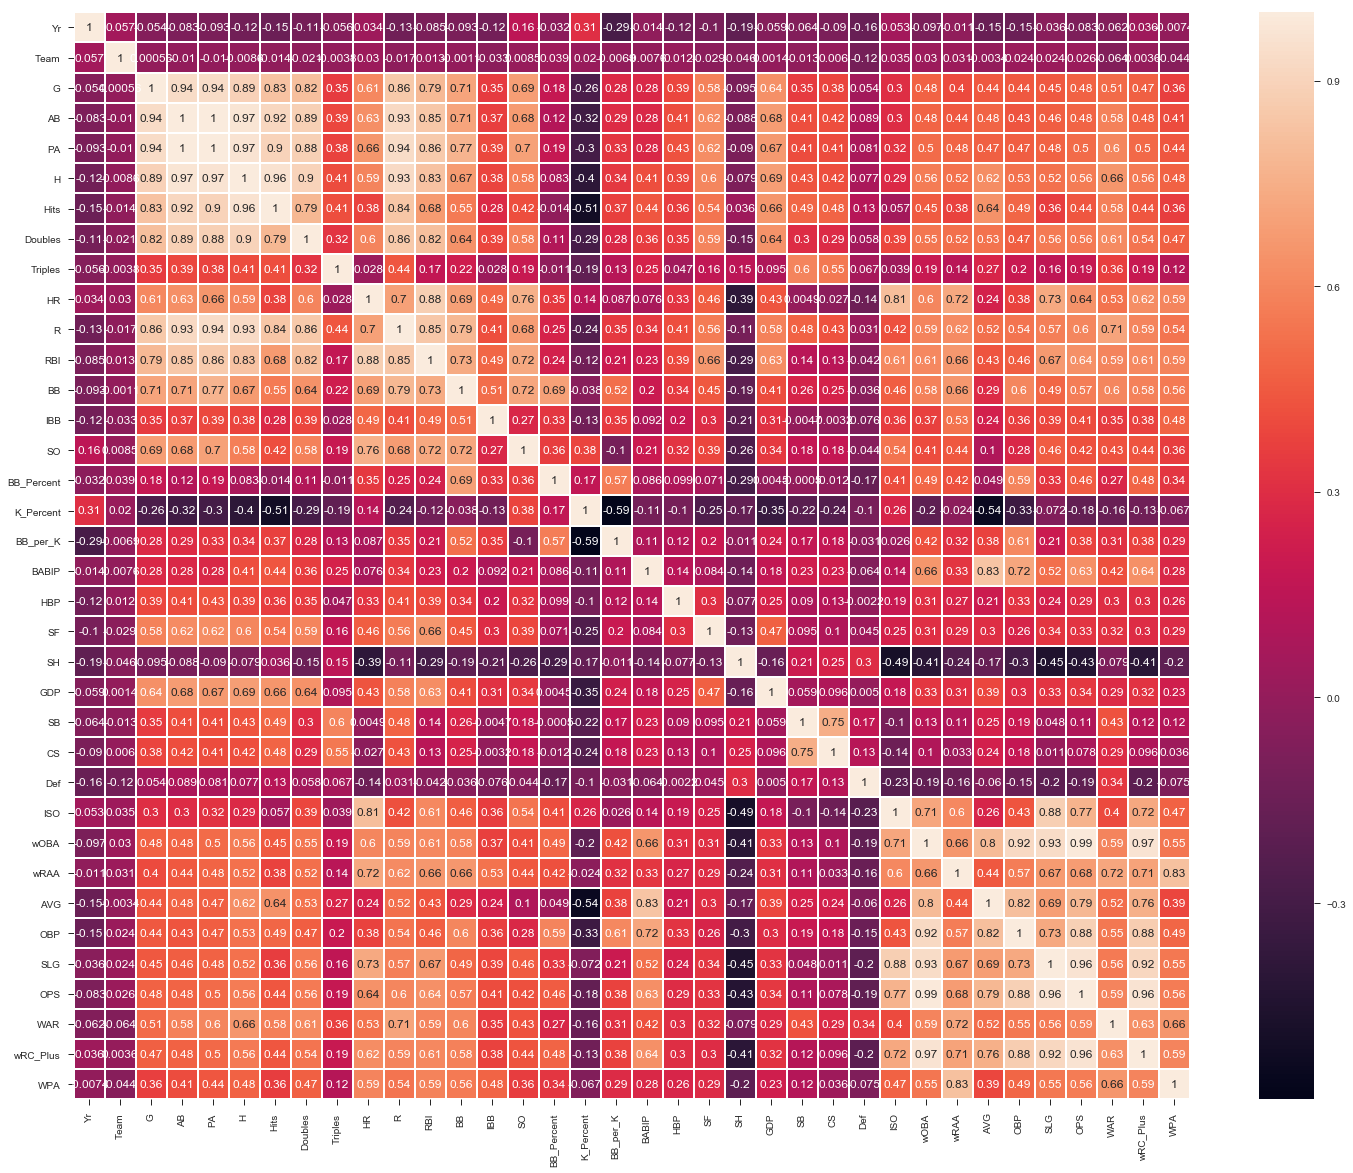

In [141]:
## Checking Correlation for Batters Independent Variables

plt.figure(figsize=(25, 20))
bat_df_corr = pd.DataFrame.corr(df_batX)
sns.heatmap(bat_df_corr, annot=True, linewidths=1)
plt.show()

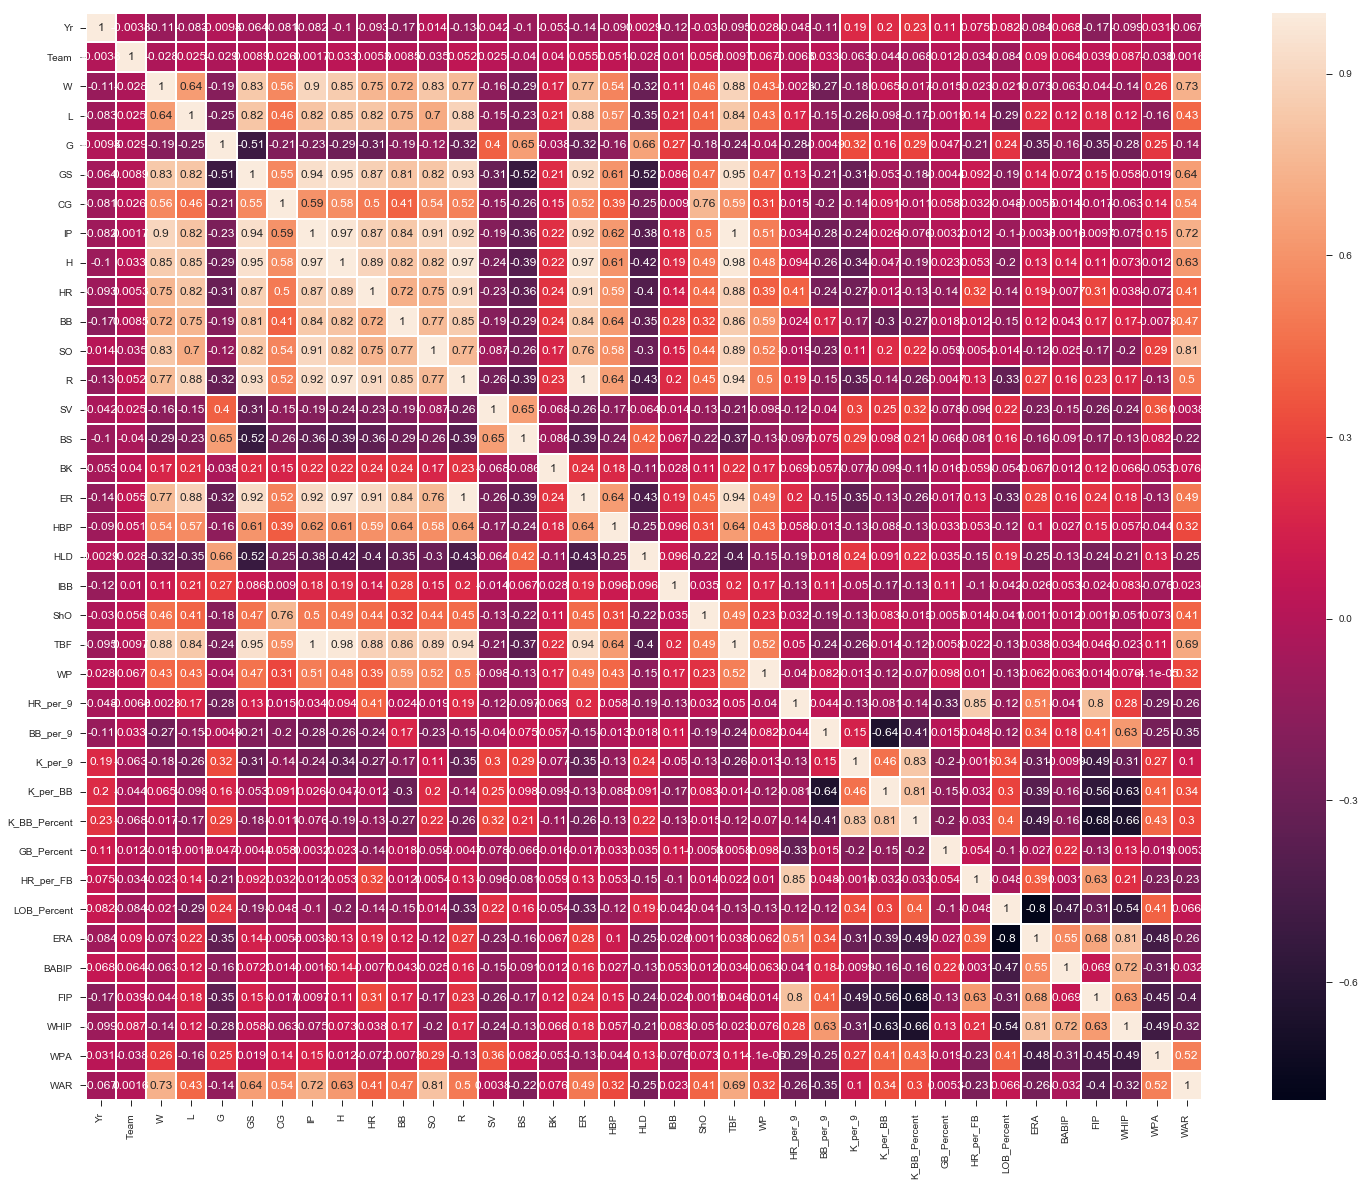

In [142]:
## Checking Correlation for Pitchers Independent Variables

plt.figure(figsize=(25, 20))
pit_df_corr = pd.DataFrame.corr(df_pitX)
sns.heatmap(pit_df_corr, annot=True, linewidths=1)
plt.show()

## * 1st  Batters info Modeling and P-VALUE check

In [143]:
bat_dfX = sm.add_constant(df_batX)
bat_dfY = pd.DataFrame(df_batY, columns=["Salary"])

In [144]:
model_bat = sm.OLS(df_batY, bat_dfX)
result_bat = model_bat.fit()
print(result_bat.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     24.83
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           6.03e-97
Time:                        14:35:01   Log-Likelihood:                -10864.
No. Observations:                 660   AIC:                         2.180e+04
Df Residuals:                     623   BIC:                         2.197e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.743e+07   4.61e+06      5.957      0.0

## * Eliminating Outliers Batters OLS analysis RESULT

In [145]:
idx_b = elim_outliers(result_bat, bat_dfX)
print(idx_b, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_b)))

[  4   5   9  12  16  26  27  31  37  38  44  61  63  65  82  83  94 104
 111 120 134 137 140 143 162 180 182 183 187 199 204 206 211 221 223 224
 230 232 235 236 242 259 261 263 266 269 291 294 296 313 314 317 331 345
 356 360 372 378 430 435 464 466 471 480 508 516 520 522 535 539 541 556
 566 570 574 585 592 594 600 604 616 628 641 653 659] 

There are '85' Outliers according to Fox criteria


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [146]:
dfX_b_idx = bat_dfX.drop(idx_b)
dfY_b_idx = df_batY.drop(idx_b)

In [147]:
dfX_b_idx_elimVer = sm.add_constant(dfX_b_idx)
model_b_idx_elimVer = sm.OLS(dfY_b_idx, dfX_b_idx_elimVer)
result_b_idx_elimVer = model_b_idx_elimVer.fit()
print(result_b_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     41.51
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.93e-131
Time:                        14:35:01   Log-Likelihood:                -9153.7
No. Observations:                 575   AIC:                         1.838e+04
Df Residuals:                     538   BIC:                         1.854e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.814e+07   3.01e+06      6.030      0.0

## * 1st Pitchers info Modeling and P-VALUE check

In [148]:
pit_dfX = sm.add_constant(df_pitX)
pit_dfY = pd.DataFrame(df_pitY, columns=['Salary'])

In [149]:
model_pit = sm.OLS(pit_dfY, pit_dfX)
result_pit = model_pit.fit()
print(result_pit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     31.56
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.61e-112
Time:                        14:35:01   Log-Likelihood:                -9566.0
No. Observations:                 589   AIC:                         1.921e+04
Df Residuals:                     551   BIC:                         1.937e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.676e+06   6.01e+06     -0.612   

## * Eliminating Outliers OLS analysis RESULT for Pitchers

In [150]:
idx_p = elim_outliers(result_pit, pit_dfX)
print(idx_p, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_p)))

[  3   4  10  12  13  18  20  35  48  50  53  55  56  62  63  68  70  76
  77  90  92  95 103 119 127 129 151 155 159 166 168 169 173 175 184 195
 197 205 220 223 228 237 249 261 281 291 326 328 331 336 347 349 352 354
 368 389 412 417 423 434 447 454 464 469 476 485 489 504 513 515 524 525
 530 542 543 544 548 557 560 562 564 574 575 576 588] 

There are '85' Outliers according to Fox criteria


In [151]:
dfX_p_idx = pit_dfX.drop(idx_p)
dfY_p_idx = df_pitY.drop(idx_p)

In [152]:
dfX_p_idx_elimVer = sm.add_constant(dfX_p_idx)
model_p_idx_elimVer = sm.OLS(dfY_p_idx, dfX_p_idx_elimVer)
result_p_idx_elimVer = model_p_idx_elimVer.fit()
print(result_p_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     44.45
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.46e-129
Time:                        14:35:01   Log-Likelihood:                -7952.7
No. Observations:                 504   AIC:                         1.598e+04
Df Residuals:                     466   BIC:                         1.614e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.055e+07   4.63e+06     -2.281   

## * Scaling Data for Batters and Pitchers

In [153]:
b_cols_list = df_batX.columns.tolist()
p_cols_list = df_pitX.columns.tolist()

In [154]:
bat_cols_list = " + ".join(b_cols_list)
pit_cols_list = " + ".join(p_cols_list)

---
# * Batters

### * OLS analysis that uses 'from-formula' for Batters

In [155]:
salary_str = "Salary ~ "

In [156]:
ols_bat_list = salary_str + bat_cols_list
ols_pit_list = salary_str + pit_cols_list
ols_bat_list

'Salary ~ Yr + Team + G + AB + PA + H + Hits + Doubles + Triples + HR + R + RBI + BB + IBB + SO + BB_Percent + K_Percent + BB_per_K + BABIP + HBP + SF + SH + GDP + SB + CS + Def + ISO + wOBA + wRAA + AVG + OBP + SLG + OPS + WAR + wRC_Plus + WPA'

## * Filtrating 5% P-VALUE of OLS modeling for Batters

In [157]:
dfX_bat1 = dmatrix(bat_cols_list, df_batX)
dfX_bat1_columns = dfX_bat1.design_info.column_names
dfX_bat1 = pd.DataFrame(dfX_bat1, columns=dfX_bat1_columns)

In [158]:
bat_pvalues1 = extracted_pvals(result_bat, 0.05)

extracted_feature_b1 = bat_pvalues1.index.values
extracted_bat_x1 = dfX_bat1.loc[:, extracted_feature_b1]

### * 2nd OLS analysis for Batters

In [159]:
model_bat2 = sm.OLS.from_formula(ols_bat_list, data=bat_df)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     25.05
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           1.23e-97
Time:                        14:35:01   Log-Likelihood:                -10862.
No. Observations:                 660   AIC:                         2.180e+04
Df Residuals:                     623   BIC:                         2.196e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.03e+07   6.57e+06      4.609      0.0

## * Filtrating 5% P-VALUE of from-formula OLS modeling for Batters

In [160]:
bat_pvalues1 = extracted_pvals(result_bat2, 0.05)

extracted_feature_b1 = bat_pvalues1.index.values
extracted_bat_x1 = dfX_bat1.loc[:, extracted_feature_b1]

### * 2-2 OLS analysis for Batters

In [161]:
dfX_bat2 = sm.add_constant(extracted_bat_x1)

model_bat2 = sm.OLS(df_batY, dfX_bat2)
result_bat2 = model_bat2.fit()
print(result_bat2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     51.33
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           9.34e-86
Time:                        14:35:01   Log-Likelihood:                -10937.
No. Observations:                 660   AIC:                         2.190e+04
Df Residuals:                     647   BIC:                         2.196e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G          -2.545e+04   6547.723     -3.887      0.0

## * Filtrating 5% P-VALUE of from-formula Elim OLS modeling for Batters

In [162]:
bat_elim_pvals = extracted_pvals(result_b_idx_elimVer, 0.05)

extracted_feature_b_elim = bat_elim_pvals.index.values
extracted_bat_elim_x = dfX_b_idx_elimVer.loc[:, extracted_feature_b_elim]

### * 2-3 Elim OLS analysis for Batters

In [163]:
dfX_bat_elim2 = sm.add_constant(extracted_bat_elim_x)

model_bat_elim2 = sm.OLS(dfY_b_idx, dfX_bat_elim2)
result_bat_elim2 = model_bat_elim2.fit()
print(result_bat_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     114.1
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.87e-128
Time:                        14:35:01   Log-Likelihood:                -9217.8
No. Observations:                 575   AIC:                         1.846e+04
Df Residuals:                     564   BIC:                         1.851e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Yr          1.728e+05   3.47e+04      4.976      0.0

In [164]:
bat_elim_pvals2 = extracted_pvals(result_bat_elim2, 0.05)

extracted_feature_b_elim2 = bat_elim_pvals2.index.values
extracted_bat_elim_x2 = dfX_b_idx_elimVer.loc[:, extracted_feature_b_elim2]

### * 2-4 Elim OLS analysis for Batters

In [165]:
dfX_bat_elim3 = sm.add_constant(extracted_bat_elim_x2)

model_bat_elim3 = sm.OLS(dfY_b_idx, dfX_bat_elim3)
result_bat_elim3 = model_bat_elim3.fit()
print(result_bat_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     143.0
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.57e-130
Time:                        14:35:01   Log-Likelihood:                -9218.0
No. Observations:                 575   AIC:                         1.845e+04
Df Residuals:                     566   BIC:                         1.849e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wRAA        2.609e+05   1.96e+04     13.304      0.0

=======================================================================================

## * Dividing 3Types OLS modeling(1.Numeric Variables ONLY, 2.One Categorical Variable(Yr) + Numeric Variables + ZERO, and 3.The other Categorical Variable(Team) + Numeric Variables + ZERO) for 'BATTERS'

In [166]:
cols_b = df_batX.columns.tolist()

cat_cols_b = cols_b[:2]
num_cols_b = cols_b[2:]

cat_cols_list_b = []
num_cols_list_b = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols_b:
        cat_cols_list_b.append("C(" + item1 + ")")
        
    for item2 in num_cols_b:
        num_cols_list_b.append("scale(" + item2 + ")")
        
    return cat_cols_list_b, num_cols_list_b

converted_cols_b = r_style_cat_cols(cat_cols_b, num_cols_b)

converted_cols_list_b = " + ".join(cat_cols_list_b + num_cols_list_b)
model_str_b = "Salary ~ "

zero = ' + 0'

ols_str_list_b = model_str_b + converted_cols_list_b + zero
merging_converted_cols_b = cat_cols_list_b + num_cols_list_b

## 1. Numeric Variables ONLY

### * 3rd OLS analysis

In [167]:
converted_num_ols_b = " + ".join(num_cols_list_b)

num_ols_model_b = model_str_b + converted_num_ols_b
num_ols_model_b

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA)'

In [168]:
model_bat3 = sm.OLS.from_formula(num_ols_model_b, data=bat_df)
result_bat3 = model_bat3.fit()
print(result_bat3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     26.08
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           1.67e-97
Time:                        14:35:02   Log-Likelihood:                -10866.
No. Observations:                 660   AIC:                         2.180e+04
Df Residuals:                     625   BIC:                         2.196e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.866e+06   1.37e+0

In [169]:
df_batX_num_list = list(df_batX_num.columns)
df_batX_num_list2 = num_cols_list_b
num_list_b = df_batX_num.copy()

for item, item2 in zip(df_batX_num_list, df_batX_num_list2):
    num_list_b.rename(columns={item : item2}, inplace=True)
        
df_batX_num = num_list_b
df_batX_num.tail()

scale(G)  scale(AB)  scale(PA)  scale(H)  scale(Hits)  scale(Doubles)  \
655        70        143        165        38           18              11   
656        84        319        344        83           57              13   
657       113        416        457       110           72              24   
658       131        482        523       148          101              25   
659       132        479        543       134           77              25   

     scale(Triples)  scale(HR)  scale(R)  scale(RBI)  scale(BB)  scale(IBB)  \
655               1          8        24          21         16           0   
656               1         12        35          47         19           0   
657               0         14        41          68         33           3   
658               0         22        58          80         35           2   
659               1         31        72          86         51           8   

     scale(SO)  scale(BB_Percent)  scale(K_Percent)  scale(BB_per_K)  \
655         31                9.7              18.8             0.52   
656         60                5.5              17.4             0.32   
657        121                7.2              26.5             0.27   
658         79                6.7              15.1             0.44   
659        108                9.4              19.9             0.47   

     scale(BABIP)  scale(HBP)  scale(SF)  scale(SH)  scale(GDP)  scale(SB)  \
655         0.278           2          4          0           3          0   
656         0.284           2          3          1          11          1   
657         0.337           4          4          0           5          2   
658         0.327           2          4          0          17          0   
659         0.298           7          6          0          14          3   

     scale(CS)  scale(Def)  scale(ISO)  scale(wOBA)  scale(wRAA)  scale(AVG)  \
655          1         0.0       0.259        0.362          5.9       0.266   
656          0         0.0       0.160        0.311          0.0       0.260   
657          0         9.8       0.159        0.319          0.4       0.264   
658          0         8.4       0.189        0.361         18.7       0.307   
659          1         0.0       0.251        0.369         22.8       0.280   

     scale(OBP)  scale(SLG)  scale(OPS)  scale(WAR)  scale(wRC_Plus)  \
655       0.339       0.524       0.864         0.7            124.0   
656       0.303       0.420       0.723         0.0             91.0   
657       0.322       0.423       0.745         1.6             91.0   
658       0.354       0.496       0.850         3.4            124.0   
659       0.354       0.530       0.884         3.2            135.0   

     scale(WPA)  
655        0.49  
656        0.50  
657        0.64  
658        2.58  
659        3.21

In [170]:
model_bat3_1 = sm.OLS(df_batY, df_batX_num)
result_bat3_1 = model_bat3_1.fit()
print(result_bat3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     55.03
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          5.31e-164
Time:                        14:35:02   Log-Likelihood:                -10902.
No. Observations:                 660   AIC:                         2.187e+04
Df Residuals:                     626   BIC:                         2.202e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
scale(G)           -7.05e+04   1.24e+0

## * Eliminating Outliers of Result-bat3 Model

In [171]:
idx_x_num = elim_outliers(result_bat3_1, df_batX_num)
print(idx_x_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_x_num)))

[  3   4   5   9  12  16  27  32  37  38  61  63  65  83  84  86  94 104
 111 120 134 137 162 180 182 183 187 199 204 211 221 223 224 228 230 232
 235 236 242 254 259 260 263 265 266 269 291 294 296 313 314 317 328 331
 356 378 395 430 433 434 435 441 461 464 466 471 480 497 508 512 516 520
 522 523 535 539 541 555 556 561 566 570 574 585 592 600 604 616 628 633
 637 641 642 648 659] 

There are '95' Outliers according to Fox criteria


In [172]:
dfX_num_idx = df_batX.drop(idx_x_num)
dfY_num_idx = df_batY.drop(idx_x_num)

### * 3-1 OLS analysis for Batters

In [173]:
dfX_num_idx_elim = sm.add_constant(dfX_num_idx)
model_num_idx_elim = sm.OLS(dfY_num_idx, dfX_num_idx_elim)
result_num_idx_elim = model_num_idx_elim.fit()
print(result_num_idx_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     40.59
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.51e-126
Time:                        14:35:02   Log-Likelihood:                -8991.7
No. Observations:                 565   AIC:                         1.806e+04
Df Residuals:                     529   BIC:                         1.821e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.824e+06   3.44e+06      2.857      0.0

## * Filtrating P-VALUE under 5% above model

In [174]:
bat_num_elim_pvals = extracted_pvals(result_num_idx_elim, 0.05)

extracted_feature_b_num_elim = bat_num_elim_pvals.index.values
extracted_bat_num_elim_x = dfX_num_idx_elim.loc[:, extracted_feature_b_num_elim]

### * 3-2 OLS analysis for Batters

In [175]:
dfX_bat_num_elim = sm.add_constant(extracted_bat_num_elim_x)

model_bat_num_elim = sm.OLS(dfY_num_idx, dfX_bat_num_elim)
result_bat_num_elim = model_bat_num_elim.fit()
print(result_bat_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     139.6
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.36e-136
Time:                        14:35:02   Log-Likelihood:                -9026.0
No. Observations:                 565   AIC:                         1.807e+04
Df Residuals:                     555   BIC:                         1.812e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G           -1.64e+04   4412.107     -3.718      0.0

## * 1st Filtrating P-VALUE under 5% of 3rd OLS model for Batters

In [176]:
dfX_bat3 = dmatrix(converted_num_ols_b, df_batX)
dfX_bat3_columns = dfX_bat3.design_info.column_names
dfX_bat3 = pd.DataFrame(dfX_bat3, columns=dfX_bat3_columns)

In [177]:
bat_pvalues3 = extracted_pvals(result_bat3, 0.05)

extracted_feature_b3 = list(bat_pvalues3.index.values)
extracted_bat_x3 = dfX_bat3.loc[:, extracted_feature_b3]

### * 4th OLS analysis for Batters

In [178]:
dfX_bat4 = sm.add_constant(extracted_bat_x3)
model_bat4 = sm.OLS(df_batY, dfX_bat4)
result_bat4 = model_bat4.fit()
print(result_bat4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     61.10
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           8.54e-87
Time:                        14:35:02   Log-Likelihood:                -10938.
No. Observations:                 660   AIC:                         2.190e+04
Df Residuals:                     649   BIC:                         2.195e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.866e+06    1.5e+05  

## * Filtrating P-VALUE under 5% of 4th OLS model for Batters

In [179]:
bat_pvalues4 = extracted_pvals(result_bat4, 0.05)

extracted_feature_b4 = list(bat_pvalues4.index.values)
extracted_bat_x4 = dfX_bat4.loc[:, extracted_feature_b4]

In [180]:
dfX_bat4_1 = sm.add_constant(extracted_bat_x4)
model_bat4_1 = sm.OLS(bat_dfY, dfX_bat4_1)
result_bat4_1 = model_bat4_1.fit()
print(result_bat4_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     87.02
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           3.77e-89
Time:                        14:35:03   Log-Likelihood:                -10940.
No. Observations:                 660   AIC:                         2.190e+04
Df Residuals:                     652   BIC:                         2.193e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.866e+06    1.5e+05     32.517      

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [181]:
yr_str_b = 'C(Yr) + '

cat_num_ols_list_b = model_str + yr_str_b + converted_num_ols_b + zero
cat_num_ols_list_b

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

### * 5th OLS analysis for Batters

In [182]:
model_bat5 = sm.OLS.from_formula(cat_num_ols_list_b, bat_df)
result_bat5 = model_bat5.fit()
print(result_bat5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     21.74
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           6.99e-99
Time:                        14:35:03   Log-Likelihood:                -10843.
No. Observations:                 660   AIC:                         2.178e+04
Df Residuals:                     614   BIC:                         2.198e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(Yr)[0]           4.659e+06   5.48e+0

## * Eliminating Outliers of Result-bat5 Model

In [183]:
converted_yr_num_list_b = yr_str_b + converted_num_ols_b + zero
converted_yr_num_list_b

'C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

In [184]:
dfX_bat5_elim = dmatrix(converted_yr_num_list_b, bat_df)
dfX_bat5_columns_elim = dfX_bat5_elim.design_info.column_names
dfX_bat5_elim = pd.DataFrame(dfX_bat5_elim, columns=dfX_bat5_columns_elim)

In [185]:
idx_yr_num = elim_outliers(result_bat5, dfX_bat5_elim)
print(idx_yr_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_yr_num)))

[  3   4   5   9  12  16  26  27  37  38  44  61  63  65  74  78  82  83
  84  92  94 104 111 120 124 134 137 140 143 162 182 183 187 199 204 211
 221 223 224 230 232 235 236 242 259 261 263 265 266 269 291 294 296 313
 314 317 331 345 356 372 376 378 430 433 435 457 462 464 466 471 480 486
 516 520 535 539 541 556 566 585 592 594 600 602 604 616 628 641 653 659] 

There are '90' Outliers according to Fox criteria


In [186]:
dfX_yr_num_idx = dfX_bat5_elim.drop(idx_yr_num)
dfY_yr_num_idx = df_batY.drop(idx_yr_num)

### * 5-1 OLS analysis for Batters

In [187]:
dfX_yr_num_idx_elimVer = sm.add_constant(dfX_yr_num_idx)
model_yr_num_idx_elimVer = sm.OLS(dfY_yr_num_idx, dfX_yr_num_idx_elimVer)
result_yr_num_idx_elimVer = model_yr_num_idx_elimVer.fit()
print(result_yr_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     39.10
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.42e-137
Time:                        14:35:03   Log-Likelihood:                -9059.5
No. Observations:                 570   AIC:                         1.821e+04
Df Residuals:                     525   BIC:                         1.840e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.256e+06   8.18e+0

## * Filtrating P-VALUE under 5% above model

In [188]:
bat_yr_num_elim_pvals = extracted_pvals(result_yr_num_idx_elimVer, 0.05)

extracted_feature_b_yr_num_elim = bat_yr_num_elim_pvals.index.values
extracted_bat_yr_num_elim_x = dfX_yr_num_idx_elimVer.loc[:, extracted_feature_b_yr_num_elim]

### * 5-2 OLS analysis for Batters

In [189]:
dfX_bat_yr_num_elim = sm.add_constant(extracted_bat_yr_num_elim_x)

model_bat_yr_num_elim = sm.OLS(dfY_yr_num_idx, dfX_bat_yr_num_elim)
result_bat_yr_num_elim = model_bat_yr_num_elim.fit()
print(result_bat_yr_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     55.68
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.45e-118
Time:                        14:35:03   Log-Likelihood:                -9157.8
No. Observations:                 570   AIC:                         1.836e+04
Df Residuals:                     549   BIC:                         1.845e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.421e+06   1.49e+05  

## * Filtrating P-VALUE under 5% above model2

In [190]:
bat_yr_num_elim_pvals2 = extracted_pvals(result_bat_yr_num_elim, 0.05)

extracted_feature_b_yr_num_elim2 = bat_yr_num_elim_pvals2.index.values
extracted_bat_yr_num_elim_x2 = dfX_bat_yr_num_elim.loc[:, extracted_feature_b_yr_num_elim2]

### * 5-3 OLS analysis for Batters

In [191]:
dfX_bat_yr_num_elim2 = sm.add_constant(extracted_bat_yr_num_elim_x2)

model_bat_yr_num_elim2 = sm.OLS(dfY_yr_num_idx, dfX_bat_yr_num_elim2)
result_bat_yr_num_elim2 = model_bat_yr_num_elim2.fit()
print(result_bat_yr_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     84.74
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.43e-122
Time:                        14:35:03   Log-Likelihood:                -9162.3
No. Observations:                 570   AIC:                         1.835e+04
Df Residuals:                     556   BIC:                         1.841e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.281e+06   1.14e+05  

## * Filtrating P-VALUE under 5% above model3

In [192]:
bat_yr_num_elim_pvals3 = extracted_pvals(result_bat_yr_num_elim2, 0.05)

extracted_feature_b_yr_num_elim3 = bat_yr_num_elim_pvals3.index.values
extracted_bat_yr_num_elim_x3 = dfX_bat_yr_num_elim2.loc[:, extracted_feature_b_yr_num_elim3]

### * 5-4 OLS analysis for Batters

In [193]:
dfX_bat_yr_num_elim3 = sm.add_constant(extracted_bat_yr_num_elim_x3)

model_bat_yr_num_elim3 = sm.OLS(dfY_yr_num_idx, dfX_bat_yr_num_elim3)
result_bat_yr_num_elim3 = model_bat_yr_num_elim3.fit()
print(result_bat_yr_num_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     99.44
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.00e-123
Time:                        14:35:03   Log-Likelihood:                -9164.3
No. Observations:                 570   AIC:                         1.835e+04
Df Residuals:                     558   BIC:                         1.840e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.223e+06   1.08e+05  

## * 1st Filtrating P-VALUE under 5% of 5th OLS model for Batters

In [194]:
dfX_bat5 = dmatrix(converted_yr_num_list_b, df_batX)
dfX_bat5_columns = dfX_bat5.design_info.column_names
dfX_bat5 = pd.DataFrame(dfX_bat5, columns=dfX_bat5_columns)

In [195]:
bat_pvalues5 = extracted_pvals(result_bat5, 0.05)

extracted_feature_b5 = list(bat_pvalues5.index.values)
extracted_bat_x5 = dfX_bat5.loc[:, extracted_feature_b5]

### * 6th OLS analysis for Batters

In [196]:
dfX_bat6 = sm.add_constant(extracted_bat_x5)
model_bat6 = sm.OLS(df_batY, dfX_bat6)
result_bat6 = model_bat6.fit()
print(result_bat6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     34.44
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           1.67e-90
Time:                        14:35:04   Log-Likelihood:                -10907.
No. Observations:                 660   AIC:                         2.186e+04
Df Residuals:                     638   BIC:                         2.196e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.609e+06   1.34e+05  

## * Filtrating P-VALUE under 5% of 6th OLS model for Batters

In [197]:
bat_pvalues6 = extracted_pvals(result_bat6, 0.05)

extracted_feature_b6 = list(bat_pvalues6.index.values)
extracted_bat_x6 = dfX_bat6.loc[:, extracted_feature_b6]

### * 7th OLS analysis for Batters

In [198]:
dfX_bat7 = sm.add_constant(extracted_bat_x6)
model_bat7 = sm.OLS(df_batY, dfX_bat7)
result_bat7 = model_bat7.fit()
print(result_bat7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     54.78
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           3.94e-95
Time:                        14:35:04   Log-Likelihood:                -10912.
No. Observations:                 660   AIC:                         2.185e+04
Df Residuals:                     646   BIC:                         2.191e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.721e+06    1.9e+05     24.891      

## * Filtrating P-VALUE under 5% of 7th OLS model for Batters

In [199]:
bat_pvalues7 = extracted_pvals(result_bat7, 0.05)
extracted_feature_b7 = list(bat_pvalues7.index.values)
extracted_bat_x7 = dfX_bat7.loc[:, extracted_feature_b7]

### * 8th OLS analysis for Batters

In [200]:
dfX_bat8 = sm.add_constant(extracted_bat_x7)
model_bat8 = sm.OLS(bat_dfY, dfX_bat8)
result_bat8 = model_bat8.fit()
print(result_bat8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     54.78
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           3.94e-95
Time:                        14:35:04   Log-Likelihood:                -10912.
No. Observations:                 660   AIC:                         2.185e+04
Df Residuals:                     646   BIC:                         2.191e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.721e+06    1.9e+05     24.891      

## 3. Categorical Variable(Team) + Numeric Variables + ZERO

In [201]:
team_str_b = 'C(Team) + '

cat_num_ols_list2_b = model_str + team_str_b + converted_num_ols_b + zero
cat_num_ols_list2_b

'Salary ~ C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

In [202]:
converted_team_num_list_b = team_str_b + converted_num_ols_b + zero
converted_team_num_list_b

'C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

### * 9th OLS analysis for Batters

In [203]:
model_bat9 = sm.OLS.from_formula(cat_num_ols_list2_b, bat_df)
result_bat9 = model_bat9.fit()
print(result_bat9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     14.68
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           2.86e-86
Time:                        14:35:04   Log-Likelihood:                -10845.
No. Observations:                 660   AIC:                         2.182e+04
Df Residuals:                     595   BIC:                         2.211e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(Team)[0]         2.868e+06   8.66e+0

## * Eliminating Outliers of Result-bat9 Model

In [204]:
dfX_bat9_elim = dmatrix(converted_team_num_list_b, bat_df)
dfX_bat9_columns_elim = dfX_bat9_elim.design_info.column_names
dfX_bat9_elim = pd.DataFrame(dfX_bat9_elim, columns=dfX_bat9_columns_elim)

In [205]:
idx_team_num = elim_outliers(result_bat9, dfX_bat9_elim)
print(idx_team_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_team_num)))

[  3   4   5   9  12  26  32  37  38  44  61  63  65  74  82  83 104 111
 120 134 137 139 140 162 180 182 183 187 199 204 211 223 224 230 232 235
 236 242 259 263 265 266 291 294 296 313 314 317 331 356 372 378 430 433
 435 457 462 464 471 480 486 504 508 516 522 535 539 541 549 556 566 570
 574 592 594 600 604 616 628 633 641 659] 

There are '82' Outliers according to Fox criteria


In [206]:
dfX_team_num_idx = dfX_bat9_elim.drop(idx_team_num)
dfY_team_num_idx = df_batY.drop(idx_team_num)

### * 9-1 OLS analysis for Batters

In [207]:
dfX_team_num_idx_elimVer = sm.add_constant(dfX_team_num_idx)
model_team_num_idx_elimVer = sm.OLS(dfY_team_num_idx, dfX_team_num_idx_elimVer)
result_team_num_idx_elimVer = model_team_num_idx_elimVer.fit()
print(result_team_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     24.70
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          7.08e-119
Time:                        14:35:05   Log-Likelihood:                -9193.6
No. Observations:                 578   AIC:                         1.852e+04
Df Residuals:                     514   BIC:                         1.879e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                4.3e+06   9.08e+0

## * Filtrating P-VALUE under 5% above model

In [208]:
bat_team_num_elim_pvals = extracted_pvals(result_team_num_idx_elimVer, 0.05)

extracted_feature_b_team_num_elim = bat_team_num_elim_pvals.index.values
extracted_bat_team_num_elim_x = dfX_team_num_idx_elimVer.loc[:, extracted_feature_b_team_num_elim]

### * 9-2 OLS analysis for Batters

In [209]:
dfX_bat_team_num_elim = sm.add_constant(extracted_bat_team_num_elim_x)

model_bat_team_num_elim = sm.OLS(dfY_team_num_idx, dfX_bat_team_num_elim)
result_bat_team_num_elim = model_bat_team_num_elim.fit()
print(result_bat_team_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     75.15
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          3.81e-132
Time:                        14:35:05   Log-Likelihood:                -9252.8
No. Observations:                 578   AIC:                         1.854e+04
Df Residuals:                     560   BIC:                         1.862e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.308e+06   1.02e+05  

## * Filtrating P-VALUE under 5% above model 2

In [210]:
bat_team_num_elim_pvals2 = extracted_pvals(result_bat_team_num_elim, 0.05)

extracted_feature_b_team_num_elim2 = bat_team_num_elim_pvals2.index.values
extracted_bat_team_num_elim_x2 = dfX_bat_team_num_elim.loc[:, extracted_feature_b_team_num_elim2]

### * 9-3 OLS analysis for Batters

In [211]:
dfX_bat_team_num_elim2 = sm.add_constant(extracted_bat_team_num_elim_x2)

model_bat_team_num_elim2 = sm.OLS(dfY_team_num_idx, dfX_bat_team_num_elim2)
result_bat_team_num_elim2 = model_bat_team_num_elim2.fit()
print(result_bat_team_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     96.27
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          9.66e-134
Time:                        14:35:05   Log-Likelihood:                -9258.3
No. Observations:                 578   AIC:                         1.854e+04
Df Residuals:                     564   BIC:                         1.861e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.353e+06   9.72e+04  

## * 1st Filtrating P-VALUE under 5% of 9th OLS model

In [212]:
filtration_str_list2_b = team_str_b + converted_num_ols_b + zero

dfX_bat9 = dmatrix(filtration_str_list2_b, data=bat_df)
dfX_bat9_columns = dfX_bat9.design_info.column_names
dfX_bat9 = pd.DataFrame(dfX_bat9, columns=dfX_bat9_columns)

In [213]:
bat_pvalues9 = extracted_pvals(result_bat9, 0.05)

extracted_features9 = list(bat_pvalues9.index.values)
extracted_bat_x9 = dfX_bat9.loc[:, extracted_features9]

### * 10th OLS analysis for Batters

In [214]:
dfX_bat10 = sm.add_constant(extracted_bat_x9)
model_bat10 = sm.OLS(bat_dfY, dfX_bat10)
result_bat10 = model_bat10.fit()
print(result_bat10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     18.07
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           2.61e-79
Time:                        14:35:05   Log-Likelihood:                -10902.
No. Observations:                 660   AIC:                         2.189e+04
Df Residuals:                     619   BIC:                         2.207e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.622e+06   1.49e+05  

## * Filtrating P-VALUE under 5% of 10th OLS model

In [215]:
bat_pvalues10 = extracted_pvals(result_bat10, 0.01)
extracted_feature_b10 = list(bat_pvalues10.index.values)
extracted_bat_x10 = dfX_bat10.loc[:, extracted_feature_b10]

### * 11th OLS analysis for Batters

In [216]:
dfX_bat11 = sm.add_constant(extracted_bat_x10)
model_bat11 = sm.OLS(bat_dfY, dfX_bat11)
result_bat11 = model_bat11.fit()
print(result_bat11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           2.43e-90
Time:                        14:35:05   Log-Likelihood:                -10942.
No. Observations:                 660   AIC:                         2.190e+04
Df Residuals:                     654   BIC:                         2.192e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.761e+06   1.54e+05     30.854      

**
※ In total(1.Numeric variables ONLY, 2.One categorical variable(Yr) + Numeric variables + ZERO, and 3.The other categorical variable(Team) and Numeric variables + ZERO), 5-4 OLS analysis(OLS modeling of the Categorical variable(Yr) and all numeric variables) and 9-3 OLS analysis(OLS modeling of the Categorical variable(team) and all numeric variables) showed the best results for the total number of remaining variables and the performance of the variables. **

=======================================================================================

# * Pitchers

### * OLS analysis that uses 'from-formula' for Pitchers

In [217]:
ols_pit_list = salary_str + pit_cols_list
ols_pit_list = salary_str + pit_cols_list
ols_pit_list

'Salary ~ Yr + Team + W + L + G + GS + CG + IP + H + HR + BB + SO + R + SV + BS + BK + ER + HBP + HLD + IBB + ShO + TBF + WP + HR_per_9 + BB_per_9 + K_per_9 + K_per_BB + K_BB_Percent + GB_Percent + HR_per_FB + LOB_Percent + ERA + BABIP + FIP + WHIP + WPA + WAR'

## * Filtrating 5% P-VALUE of OLS modeling for Pitchers

In [218]:
dfX_pit1 = dmatrix(pit_cols_list, df_pitX)
dfX_pit1_columns = dfX_pit1.design_info.column_names
dfX_pit1 = pd.DataFrame(dfX_pit1, columns=dfX_pit1_columns)

In [219]:
pit_pvalues1 = extracted_pvals(result_pit, 0.05)

extracted_feature_p1 = pit_pvalues1.index.values
extracted_pit_x1 = dfX_pit1.loc[:, extracted_feature_p1]

### * 2nd OLS analysis for Pitchers

In [220]:
dfX_pit2 = sm.add_constant(extracted_pit_x1)

model_pit2 = sm.OLS(pit_dfY, dfX_pit2)
result_pit2 = model_pit2.fit()
print(result_pit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     142.7
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          9.08e-122
Time:                        14:35:05   Log-Likelihood:                -9606.4
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     581   BIC:                         1.926e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.446e+05   2.74e+05      3.453      0.0

## * Eliminating Outliers above OLS model for Pitchers

In [221]:
pit_elim_pvals = extracted_pvals(result_p_idx_elimVer, 0.05)

extracted_feature_p_elim = pit_elim_pvals.index.values
extracted_pit_elim_x = dfX_p_idx_elimVer.loc[:, extracted_feature_p_elim]

### * 2-3 Elim OLS analysis for Pitchers

In [222]:
dfX_pit_elim2 = sm.add_constant(extracted_pit_elim_x)

model_pit_elim2 = sm.OLS(dfY_p_idx, dfX_pit_elim2)
result_pit_elim2 = model_pit_elim2.fit()
print(result_pit_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.63e-135
Time:                        14:35:06   Log-Likelihood:                -7988.5
No. Observations:                 504   AIC:                         1.601e+04
Df Residuals:                     489   BIC:                         1.607e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SO          5.277e+04   6074.183      8.687      0.0

In [223]:
pit_elim_pvals2 = extracted_pvals(result_pit_elim2, 0.05)

extracted_feature_p_elim2 = pit_elim_pvals2.index.values
extracted_pit_elim_x2 = dfX_pit_elim2.loc[:, extracted_feature_p_elim2]

### * 2-4 Elim OLS analysis for Pitchers

In [224]:
dfX_pit_elim3 = sm.add_constant(extracted_pit_elim_x2)

model_pit_elim3 = sm.OLS(dfY_p_idx, dfX_pit_elim3)
result_pit_elim3 = model_pit_elim3.fit()
print(result_pit_elim3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     118.4
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.23e-136
Time:                        14:35:06   Log-Likelihood:                -7990.9
No. Observations:                 504   AIC:                         1.601e+04
Df Residuals:                     491   BIC:                         1.606e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SO          5.263e+04   6080.045      8.656      0.0

In [225]:
pit_elim_pvals3 = extracted_pvals(result_pit_elim3, 0.05)

extracted_feature_p_elim3 = pit_elim_pvals3.index.values
extracted_pit_elim_x3 = dfX_pit_elim3.loc[:, extracted_feature_p_elim3]

### * 2-5 Elim OLS analysis for Pitchers

In [226]:
dfX_pit_elim4 = sm.add_constant(extracted_pit_elim_x3)

model_pit_elim4 = sm.OLS(dfY_p_idx, dfX_pit_elim4)
result_pit_elim4 = model_pit_elim4.fit()
print(result_pit_elim4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     118.4
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.23e-136
Time:                        14:35:06   Log-Likelihood:                -7990.9
No. Observations:                 504   AIC:                         1.601e+04
Df Residuals:                     491   BIC:                         1.606e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ER         -1.603e+05    1.6e+04    -10.031      0.0

=======================================================================================

 ## * Dividing 3Types OLS modeling(1.Numeric Variables ONLY, 2.One Categorical Variable(Yr) + Numeric Variables + ZERO, and 3.The other Categorical Variable(Team) + Numeric Variables + ZERO) for 'PITCHERS'

In [227]:
cols_p = df_pitX.columns.tolist()

cat_cols_p = cols_p[:2]
num_cols_p = cols_p[2:70]

cat_cols_list_p = []
num_cols_list_p = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols_p:
        cat_cols_list_p.append("C(" + item1 + ")")
        
    for item2 in num_cols_p:
        num_cols_list_p.append("scale(" + item2 + ")")
        
    return cat_cols_list_p, num_cols_list_p

converted_cols_p = r_style_cat_cols(cat_cols_p, num_cols_p)

converted_cols_list_p = " + ".join(cat_cols_list_p + num_cols_list_p)
model_str_p = "Salary ~ "

zero = ' + 0'

ols_str_list_p = model_str_p + converted_cols_list_p + zero
merging_converted_cols_p = cat_cols_list_p + num_cols_list_p

## 1. Numeric Variables ONLY

### * 3rd OLS analysis for Pitchers

In [228]:
converted_num_ols_p = " + ".join(num_cols_list_p)

num_ols_model_p = model_str_p + converted_num_ols_p
num_ols_model_p

'Salary ~ scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR)'

In [229]:
model_pit3 = sm.OLS.from_formula(num_ols_model_p, data=pit_df)
result_pit3 = model_pit3.fit()
print(result_pit3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     32.77
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          8.08e-112
Time:                        14:35:06   Log-Likelihood:                -9570.2
No. Observations:                 589   AIC:                         1.921e+04
Df Residuals:                     553   BIC:                         1.937e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.912e+06   1

## * Eliminating Outliers of Result-pit3 Model

In [230]:
idx_x_num = elim_outliers(result_pit3, df_pitX_num)
print(idx_x_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_x_num)))

[  3   4  10  12  13  18  20  35  48  50  53  55  56  62  63  65  68  76
  77  90  92  95 100 119 127 129 151 155 159 166 168 169 172 173 175 182
 184 195 197 205 209 220 223 225 228 245 249 263 281 291 326 328 331 336
 347 349 352 354 368 389 417 423 434 454 464 469 485 489 504 513 515 524
 525 530 542 543 544 548 557 560 562 564 574 575 576 588] 

There are '86' Outliers according to Fox criteria


In [231]:
dfX_num_idx = df_pitX.drop(idx_x_num)
dfY_num_idx = df_pitY.drop(idx_x_num)

### * 3-1 OLS analysis for Pitchers

In [232]:
dfX_num_idx_elimVer = sm.add_constant(dfX_num_idx)
model_num_idx_elimVer = sm.OLS(dfY_num_idx, dfX_num_idx_elimVer)
result_num_idx_elimVer = model_num_idx_elimVer.fit()
print(result_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     41.70
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.92e-124
Time:                        14:35:06   Log-Likelihood:                -7931.4
No. Observations:                 503   AIC:                         1.594e+04
Df Residuals:                     465   BIC:                         1.610e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.022e+07   4.59e+06     -2.226   

## * Filtrating P-VALUE under 5% above model

In [233]:
pit_num_elim_pvals = extracted_pvals(result_num_idx_elimVer, 0.05)

extracted_feature_p_num_elim = pit_num_elim_pvals.index.values
extracted_pit_num_elim_x = dfX_num_idx_elimVer.loc[:, extracted_feature_p_num_elim]

### * 3-2 OLS analysis for Pitchers

In [234]:
dfX_pit_num_elim = sm.add_constant(extracted_pit_num_elim_x)

model_pit_num_elim = sm.OLS(dfY_num_idx, dfX_pit_num_elim)
result_pit_num_elim = model_pit_num_elim.fit()
print(result_pit_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.88e-123
Time:                        14:35:06   Log-Likelihood:                -7990.5
No. Observations:                 503   AIC:                         1.600e+04
Df Residuals:                     491   BIC:                         1.606e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SO          5.516e+04   6165.512      8.947      0.0

## * Filtrating P-VALUE under 5% above model 2

In [235]:
pit_num_elim_pvals2 = extracted_pvals(result_pit_num_elim, 0.05)

extracted_feature__p_num_elim2 = pit_num_elim_pvals2.index.values
extracted_pit_num_elim_x2 = dfX_num_idx_elimVer.loc[:, extracted_feature__p_num_elim2]

### * 3-3 OLS analysis for Pitchers

In [236]:
dfX_pit_num_elim2 = sm.add_constant(extracted_pit_num_elim_x2)

model_pit_num_elim2 = sm.OLS(dfY_num_idx, dfX_pit_num_elim2)
result_pit_num_elim2 = model_pit_num_elim2.fit()
print(result_pit_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.72e-124
Time:                        14:35:06   Log-Likelihood:                -7997.8
No. Observations:                 503   AIC:                         1.601e+04
Df Residuals:                     495   BIC:                         1.605e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.416e+06   2.79e+05      5.072      0.0

## * 1st Filtrating P-VALUE under 5% of 3rd OLS model for Pitchers

In [237]:
dfX_pit3 = dmatrix(converted_num_ols_p, df_pitX)
dfX_pit3_columns = dfX_pit3.design_info.column_names
dfX_pit3 = pd.DataFrame(dfX_pit3, columns=dfX_pit3_columns)

In [238]:
pit_pvalues3 = extracted_pvals(result_pit3, 0.05)

extracted_feature_p3 = list(pit_pvalues3.index.values)
extracted_pit_x3 = dfX_pit3.loc[:, extracted_feature_p3]

### * 4th OLS analysis for Pitchers

In [239]:
dfX_pit4 = sm.add_constant(extracted_pit_x3)
model_pit4 = sm.OLS(df_pitY, dfX_pit4)
result_pit4 = model_pit4.fit()
print(result_pit4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.48e-120
Time:                        14:35:07   Log-Likelihood:                -9608.2
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     580   BIC:                         1.927e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.912e+06   1

## * Filtrating P-VALUE under 5% of 4th OLS model for Pitchers

In [240]:
pit_pvalues4 = extracted_pvals(result_pit4, 0.05)

extracted_feature_p4 = list(pit_pvalues4.index.values)
extracted_pit_x4 = dfX_pit4.loc[:, extracted_feature_p4]

In [241]:
dfX_pit4_1 = sm.add_constant(extracted_pit_x4)
model_pit4_1 = sm.OLS(pit_dfY, dfX_pit4_1)
result_pit4_1 = model_pit4_1.fit()
print(result_pit4_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          6.48e-120
Time:                        14:35:07   Log-Likelihood:                -9608.2
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     580   BIC:                         1.927e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.912e+06   1

## 2. Categorical Variable(Yr) + Numeric Variables + ZERO

In [242]:
yr_str_p = 'C(Yr) + '

cat_num_ols_list_p = model_str + yr_str_p + converted_num_ols_p + zero
cat_num_ols_list_p

'Salary ~ C(Yr) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

### * 5th OLS analysis for Pitchers

In [243]:
converted_yr_num_list_p = yr_str_p + converted_num_ols_p + zero
converted_yr_num_list_p

'C(Yr) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

In [244]:
model_pit5 = sm.OLS.from_formula(cat_num_ols_list_p, pit_df)
result_pit5 = model_pit5.fit()
print(result_pit5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     26.57
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.97e-110
Time:                        14:35:07   Log-Likelihood:                -9553.4
No. Observations:                 589   AIC:                         1.920e+04
Df Residuals:                     542   BIC:                         1.941e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             5.642e+06   4

## * Eliminating Outliers of Result-pit5 Model

In [245]:
dfX_pit5_elim = dmatrix(converted_yr_num_list_p, pit_df)
dfX_pit5_columns_elim = dfX_pit5_elim.design_info.column_names
dfX_pit5_elim = pd.DataFrame(dfX_pit5_elim, columns=dfX_pit5_columns_elim)

In [246]:
idx_yr_num = elim_outliers(result_pit5, dfX_pit5_elim)
print(idx_yr_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_yr_num)))

[  3   4   6  10  12  13  18  20  24  48  50  53  55  56  62  63  65  68
  76  77  90  92  95 119 127 129 137 141 151 153 155 159 166 168 173 175
 184 194 195 197 209 214 220 223 225 228 245 249 263 281 291 326 328 331
 336 347 349 354 368 389 412 417 423 434 447 454 464 469 476 478 485 489
 504 513 515 524 530 542 543 548 559 560 562 564 567 574 588] 

There are '87' Outliers according to Fox criteria


In [247]:
dfX_yr_num_idx = dfX_pit5_elim.drop(idx_yr_num)
dfY_yr_num_idx = df_pitY.drop(idx_yr_num)

### * 5-1 OLS analysis for Pitchers

In [248]:
dfX_yr_num_idx_elimVer = sm.add_constant(dfX_yr_num_idx)
model_yr_num_idx_elimVer = sm.OLS(dfY_yr_num_idx, dfX_yr_num_idx_elimVer)
result_yr_num_idx_elimVer = model_yr_num_idx_elimVer.fit()
print(result_yr_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     42.08
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.18e-135
Time:                        14:35:08   Log-Likelihood:                -7889.1
No. Observations:                 502   AIC:                         1.587e+04
Df Residuals:                     455   BIC:                         1.607e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.343e+06   7

## * Filtrating P-VALUE under 5% above model

In [249]:
pit_yr_num_elim_pvals = extracted_pvals(result_yr_num_idx_elimVer, 0.05)

extracted_feature_p_yr_num_elim = pit_yr_num_elim_pvals.index.values
extracted_pit_yr_num_elim_x = dfX_yr_num_idx_elimVer.loc[:, extracted_feature_p_yr_num_elim]

### * 5-2 OLS analysis for Pitchers

In [250]:
dfX_pit_yr_num_elim = sm.add_constant(extracted_pit_yr_num_elim_x)

model_pit_yr_num_elim = sm.OLS(dfY_yr_num_idx, dfX_pit_yr_num_elim)
result_pit_yr_num_elim = model_pit_yr_num_elim.fit()
print(result_pit_yr_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     102.8
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.19e-148
Time:                        14:35:08   Log-Likelihood:                -7921.9
No. Observations:                 502   AIC:                         1.588e+04
Df Residuals:                     484   BIC:                         1.596e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.367e+06   1

## * Filtrating P-VALUE under 5% above model 2

In [251]:
pit_yr_num_elim_pvals2 = extracted_pvals(result_pit_yr_num_elim, 0.05)

extracted_feature_p_yr_num_elim2 = pit_yr_num_elim_pvals2.index.values
extracted_pit_yr_num_elim_x2 = dfX_pit_yr_num_elim.loc[:, extracted_feature_p_yr_num_elim2]

### * 5-3 OLS analysis for Pitchers

In [252]:
dfX_pit_yr_num_elim2 = sm.add_constant(extracted_pit_yr_num_elim_x2)

model_pit_yr_num_elim2 = sm.OLS(dfY_yr_num_idx, dfX_pit_yr_num_elim2)
result_pit_yr_num_elim2 = model_pit_yr_num_elim2.fit()
print(result_pit_yr_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     115.3
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          2.83e-149
Time:                        14:35:08   Log-Likelihood:                -7924.7
No. Observations:                 502   AIC:                         1.588e+04
Df Residuals:                     486   BIC:                         1.595e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.307e+06    

## * 1st Filtrating P-VALUE under 5% of 5th OLS model for Pitchers

In [253]:
filtration_str_list_p = yr_str + converted_num_ols_p + zero

dfX_pit5 = dmatrix(filtration_str_list_p, df_pitX)
dfX_pit5_columns = dfX_pit5.design_info.column_names
dfX_pit5 = pd.DataFrame(dfX_pit5, columns=dfX_pit5_columns)

In [254]:
pit_pvalues5 = extracted_pvals(result_pit5, 0.05)

extracted_feature_p5 = list(pit_pvalues5.index.values)
extracted_pit_x5 = dfX_pit5.loc[:, extracted_feature_p5]

### * 6th OLS analysis for Pitchers

In [255]:
dfX_pit6 = sm.add_constant(extracted_pit_x5)
model_pit6 = sm.OLS(df_pitY, dfX_pit6)
result_pit6 = model_pit6.fit()
print(result_pit6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     56.01
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          3.09e-113
Time:                        14:35:08   Log-Likelihood:                -9601.1
No. Observations:                 589   AIC:                         1.924e+04
Df Residuals:                     570   BIC:                         1.932e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.519e+06   1.16e+05     38.935      0.0

## * Filtrating P-VALUE under 5% of 6th OLS model for Pitchers

In [256]:
pit_pvalues6 = extracted_pvals(result_pit6, 0.05)

extracted_feature_p6 = list(pit_pvalues6.index.values)
extracted_pit_x6 = dfX_pit6.loc[:, extracted_feature_p6]

### * 7th OLS analysis for Pitchers

In [257]:
dfX_pit7 = sm.add_constant(extracted_pit_x6)
model_pit7 = sm.OLS(df_pitY, dfX_pit7)
result_pit7 = model_pit7.fit()
print(result_pit7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     91.67
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          7.14e-119
Time:                        14:35:08   Log-Likelihood:                -9603.3
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     577   BIC:                         1.928e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.515e+06    1.5e+05     30.019      0.0

## * Filtrating P-VALUE under 5% of 7th OLS model for Pitchers

In [258]:
pit_pvalues7_1 = extracted_pvals(result_pit7, 0.05)

extracted_feature_p7_1 = list(pit_pvalues7_1.index.values)
extracted_pit_x7_1 = dfX_pit7.loc[:, extracted_feature_p7_1]

### * 7-1 OLS analysis for Pitchers

In [259]:
dfX_pit7_1 = sm.add_constant(extracted_pit_x7_1)
model_pit7_1 = sm.OLS(df_pitY, dfX_pit7_1)
result_pit7_1 = model_pit7_1.fit()
print(result_pit7_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          3.87e-119
Time:                        14:35:08   Log-Likelihood:                -9605.1
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     578   BIC:                         1.928e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.614e+06   1.41e+05     32.684      0.0

## 3. Categorical Variable(Team) + Numeric Variables + ZERO

In [260]:
team_str_p = 'C(Team) + '

cat_num_ols_list2_p = model_str + team_str_p + converted_num_ols_p + zero
cat_num_ols_list2_p

'Salary ~ C(Team) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

In [261]:
converted_team_num_list_p = team_str_p + converted_num_ols_p + zero
converted_team_num_list_p

'C(Team) + scale(W) + scale(L) + scale(G) + scale(GS) + scale(CG) + scale(IP) + scale(H) + scale(HR) + scale(BB) + scale(SO) + scale(R) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP) + scale(HLD) + scale(IBB) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP) + scale(FIP) + scale(WHIP) + scale(WPA) + scale(WAR) + 0'

### * 8th OLS analysis for Pitchers

In [262]:
model_pit8 = sm.OLS.from_formula(cat_num_ols_list2_p, pit_df)
result_pit8 = model_pit8.fit()
print(result_pit8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     18.22
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           8.73e-98
Time:                        14:35:09   Log-Likelihood:                -9552.5
No. Observations:                 589   AIC:                         1.924e+04
Df Residuals:                     523   BIC:                         1.953e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]           5.706e+06   6

## * Eliminating Outliers of Result-pit8 Model

In [263]:
dfX_pit8_elim = dmatrix(converted_team_num_list_p, pit_df)
dfX_pit8_columns_elim = dfX_pit8_elim.design_info.column_names
dfX_pit8_elim = pd.DataFrame(dfX_pit8_elim, columns=dfX_pit8_columns_elim)

In [264]:
idx_team_num = elim_outliers(result_pit8, dfX_pit8_elim)
print(idx_team_num, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx_team_num)))

[  3   4   8  10  12  13  18  21  35  50  53  55  56  62  63  65  68  76
  77  81  92  95 100 119 127 129 137 140 148 151 153 155 157 159 166 168
 173 175 178 184 195 197 203 205 214 216 220 223 225 228 242 245 249 250
 281 291 328 331 336 347 349 352 354 358 368 412 417 423 434 447 450 454
 464 469 476 485 489 504 513 515 524 530 542 543 548 557 562 564 574 575
 576 588] 

There are '92' Outliers according to Fox criteria


### * 9-1 OLS analysis for Pitchers

In [265]:
dfX_team_num_idx_elimVer = sm.add_constant(dfX_team_num_idx)
model_team_num_idx_elimVer = sm.OLS(dfY_team_num_idx, dfX_team_num_idx_elimVer)
result_team_num_idx_elimVer = model_team_num_idx_elimVer.fit()
print(result_team_num_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     24.70
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          7.08e-119
Time:                        14:35:09   Log-Likelihood:                -9193.6
No. Observations:                 578   AIC:                         1.852e+04
Df Residuals:                     514   BIC:                         1.879e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                4.3e+06   9.08e+0

## * Filtrating P-VALUE under 5% above model

In [266]:
pit_team_num_elim_pvals = extracted_pvals(result_team_num_idx_elimVer, 0.05)

extracted_feature_p_team_num_elim = pit_team_num_elim_pvals.index.values
extracted_pit_team_num_elim_x = dfX_team_num_idx_elimVer.loc[:, extracted_feature_p_team_num_elim]

### * 9-2 OLS analysis for Pitchers

In [267]:
dfX_pit_team_num_elim = sm.add_constant(extracted_pit_team_num_elim_x)

model_pit_team_num_elim = sm.OLS(dfY_team_num_idx, dfX_pit_team_num_elim)
result_pit_team_num_elim = model_pit_team_num_elim.fit()
print(result_pit_team_num_elim.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     75.15
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          3.81e-132
Time:                        14:35:09   Log-Likelihood:                -9252.8
No. Observations:                 578   AIC:                         1.854e+04
Df Residuals:                     560   BIC:                         1.862e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.308e+06   1.02e+05  

## * Filtrating P-VALUE under 5% above model 2

In [268]:
pit_team_num_elim_pvals2 = extracted_pvals(result_pit_team_num_elim, 0.05)

extracted_feature_p_team_num_elim2 = pit_team_num_elim_pvals2.index.values
extracted_pit_team_num_elim_x2 = dfX_pit_team_num_elim.loc[:, extracted_feature_p_team_num_elim2]

### * 9-3 OLS analysis for Pitchers

In [269]:
dfX_pit_team_num_elim2 = sm.add_constant(extracted_pit_team_num_elim_x2)

model_pit_team_num_elim2 = sm.OLS(dfY_team_num_idx, dfX_pit_team_num_elim2)
result_pit_team_num_elim2 = model_pit_team_num_elim2.fit()
print(result_pit_team_num_elim2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     96.27
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          9.66e-134
Time:                        14:35:09   Log-Likelihood:                -9258.3
No. Observations:                 578   AIC:                         1.854e+04
Df Residuals:                     564   BIC:                         1.861e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.353e+06   9.72e+04  

## * 1st Filtrating P-VALUE under 5% of 8th OLS model

In [270]:
filtration_str_list2_p = team_str_p + converted_num_ols_p + zero

dfX_pit8 = dmatrix(filtration_str_list2_p, data=pit_df)
dfX_pit8_columns = dfX_pit8.design_info.column_names
dfX_pit8 = pd.DataFrame(dfX_pit8, columns=dfX_pit8_columns)

In [271]:
pit_pvalues8 = extracted_pvals(result_pit8, 0.05)

extracted_features8 = list(pit_pvalues8.index.values)
extracted_pit_x8 = dfX_pit8.loc[:, extracted_features8]

### * 9th OLS analysis for Pitchers

In [272]:
dfX_pit9 = sm.add_constant(extracted_pit_x8)
model_pit9 = sm.OLS(pit_dfY, dfX_pit9)
result_pit9 = model_pit9.fit()
print(result_pit9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     28.86
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          1.75e-106
Time:                        14:35:10   Log-Likelihood:                -9578.0
No. Observations:                 589   AIC:                         1.923e+04
Df Residuals:                     550   BIC:                         1.940e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.775e+06   1.34e+05     35.763      

## * Filtrating P-VALUE under 5% of 9th OLS model

In [273]:
pit_pvalues9 = extracted_pvals(result_pit9, 0.01)
extracted_feature_p9 = list(pit_pvalues9.index.values)
extracted_pit_x9 = dfX_pit9.loc[:, extracted_feature_p9]

### * 10th OLS analysis for Pitchers

In [274]:
dfX_pit10 = sm.add_constant(extracted_pit_x9)
model_pit10 = sm.OLS(pit_dfY, dfX_pit10)
result_pit10 = model_pit10.fit()
print(result_pit10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     131.9
Date:                Wed, 24 Jan 2018   Prob (F-statistic):          3.15e-125
Time:                        14:35:10   Log-Likelihood:                -9595.7
No. Observations:                 589   AIC:                         1.921e+04
Df Residuals:                     580   BIC:                         1.925e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.837e+06   1.23e+05     39.383      

**
※ In total(1.Numeric variables ONLY, 2.One categorical variable(Yr) + Numeric variables + ZERO, and 3.The other categorical variable(Team) and Numeric variables + ZERO), 5-3 OLS analysis(OLS modeling of the Categorical variable(Yr) and all numeric variables) and 9-3 OLS analysis(OLS modeling of the Categorical variable(team) and all numeric variables) showed the best results for the total number of remaining variables and the performance of the variables. **

## ※ The three following are the analyses that gave the best choice of variables and their performance.

> #### 1. Best Result of Total(Batters + Pitchers) Data
>     : 10-2 OLS analysis (OLS modeling of the Categorical variable(Yr) and all numeric variables)
>---
> #### 2-1. Best Results of Divided Data (Batters)
>     :  1) 5-4 OLS analysis (OLS modeling of the Categorical variable(Yr) and all numeric variables) 
>        2) 9-3 OLS analysis (OLS modeling of the Categorical variable(team) and all numeric variables)
>---
> #### 2-2. Best Results of Divided Data (Pitchers)
>     :  1) 5-3 OLS analysis (OLS modeling of the Categorical variable(Yr) and all numeric variables)
>        2) 9-3 OLS analysis (OLS modeling of the Categorical variable(team) and all numeric variables)

In [275]:
print(dfX10_2.columns.tolist(), '\n')
print(dfX_bat_yr_num_elim3.columns.tolist(), '\n')
print(dfX_bat_team_num_elim2.columns.tolist(), '\n')
print(dfX_pit_yr_num_elim2.columns.tolist(), '\n')
print(dfX_pit_team_num_elim2.columns.tolist())

['const', 'scale(WAR)', 'scale(SO_p)', 'scale(wRAA)', 'scale(GDP)', 'C(Yr)[10]', 'scale(SV)', 'scale(ER)', 'scale(IBB_p)', 'scale(SB)', 'scale(IBB_b)', 'scale(W)', 'C(Yr)[9]', 'scale(G)', 'C(Yr)[8]', 'C(Yr)[3]', 'C(Yr)[7]'] 

['const', 'scale(BABIP)', 'scale(wRAA)', 'scale(WAR)', 'C(Yr)[11]', 'scale(G)', 'scale(IBB)', 'scale(SB)', 'scale(K_Percent)', 'C(Yr)[10]', 'scale(GDP)', 'scale(H)'] 

['const', 'scale(wOBA)', 'scale(wRAA)', 'scale(H)', 'scale(WAR)', 'scale(Hits)', 'scale(SB)', 'scale(Doubles)', 'scale(GDP)', 'C(Team)[6]', 'scale(G)', 'scale(Triples)', 'C(Team)[21]', 'scale(K_Percent)'] 

['const', 'scale(SO)', 'scale(SV)', 'scale(BB)', 'C(Yr)[11]', 'scale(IBB)', 'scale(GS)', 'scale(ER)', 'scale(WAR)', 'scale(K_BB_Percent)', 'C(Yr)[10]', 'C(Yr)[1]', 'C(Yr)[0]', 'scale(R)', 'scale(BK)', 'scale(GB_Percent)'] 

['const', 'scale(wOBA)', 'scale(wRAA)', 'scale(H)', 'scale(WAR)', 'scale(Hits)', 'scale(SB)', 'scale(Doubles)', 'scale(GDP)', 'C(Team)[6]', 'scale(G)', 'scale(Triples)', 'C(Te

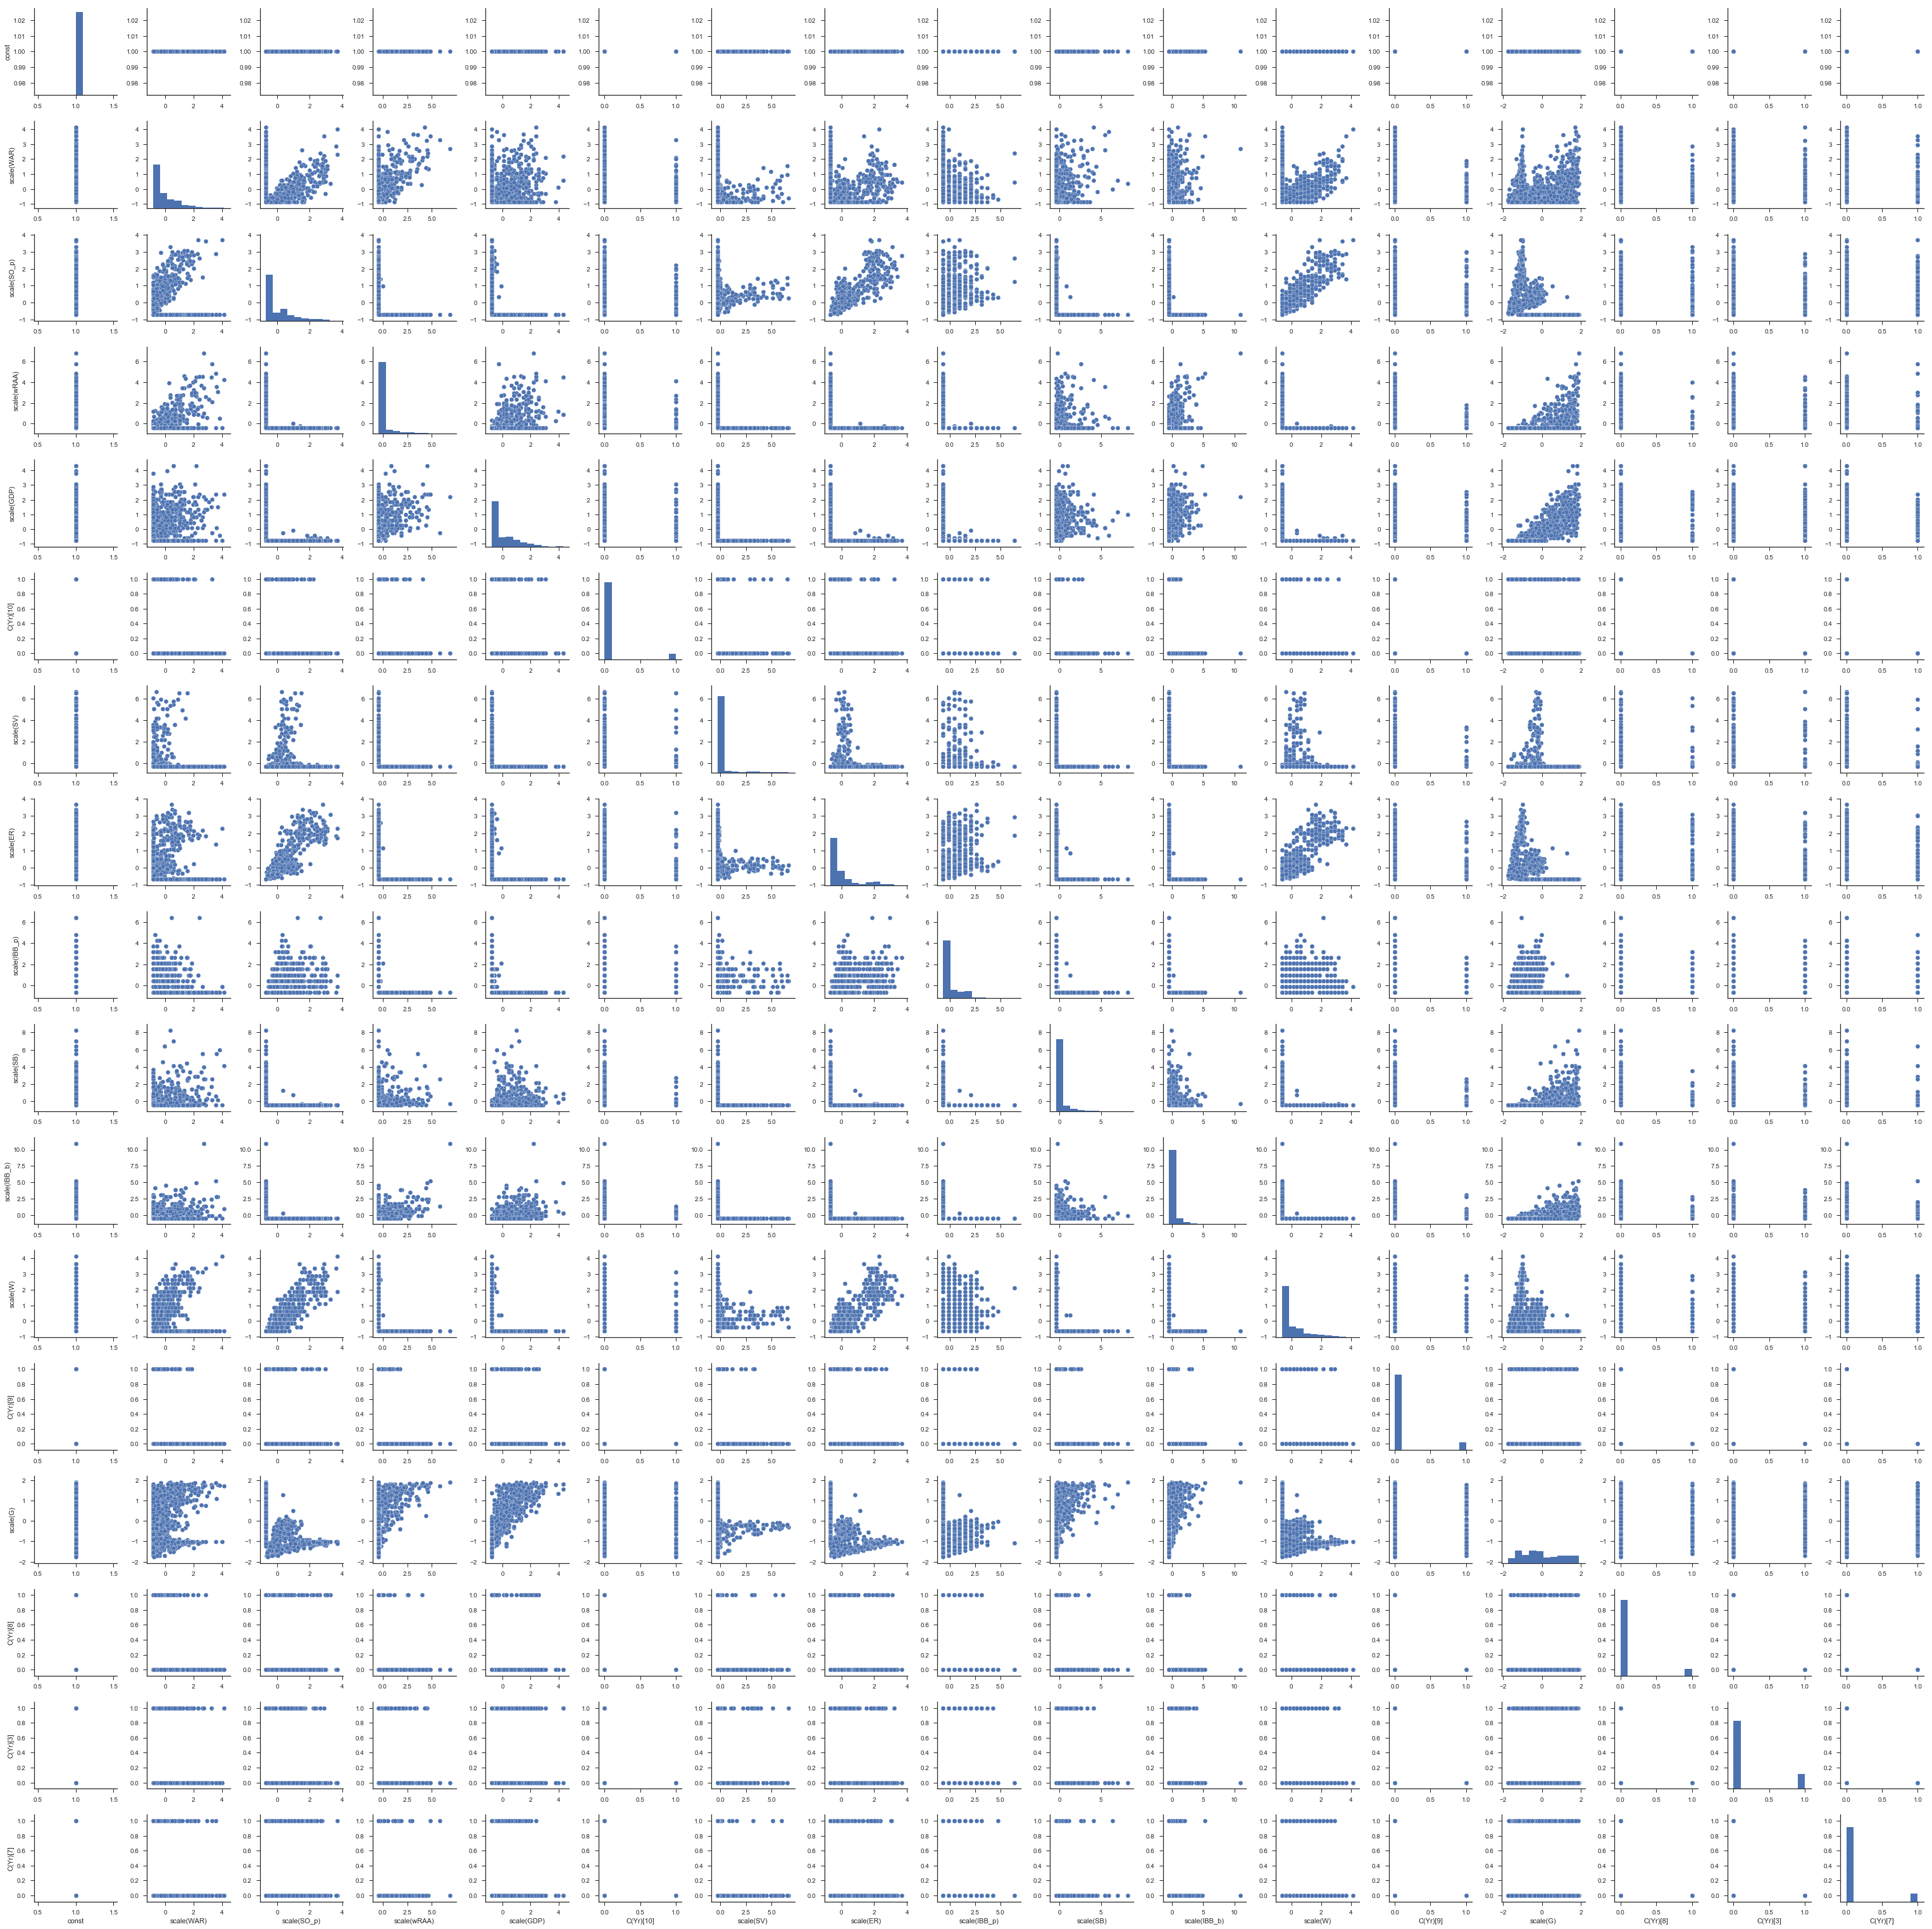

In [276]:
cols1 = ['const', 'scale(WAR)', 'scale(SO_p)', 'scale(wRAA)', 'scale(GDP)', 'C(Yr)[10]', 'scale(SV)', 'scale(ER)',
        'scale(IBB_p)', 'scale(SB)', 'scale(IBB_b)', 'scale(W)', 'C(Yr)[9]', 'scale(G)', 'C(Yr)[8]', 'C(Yr)[3]',
        'C(Yr)[7]']
sns.pairplot(extracted_df_x10_1[cols1])
plt.show()

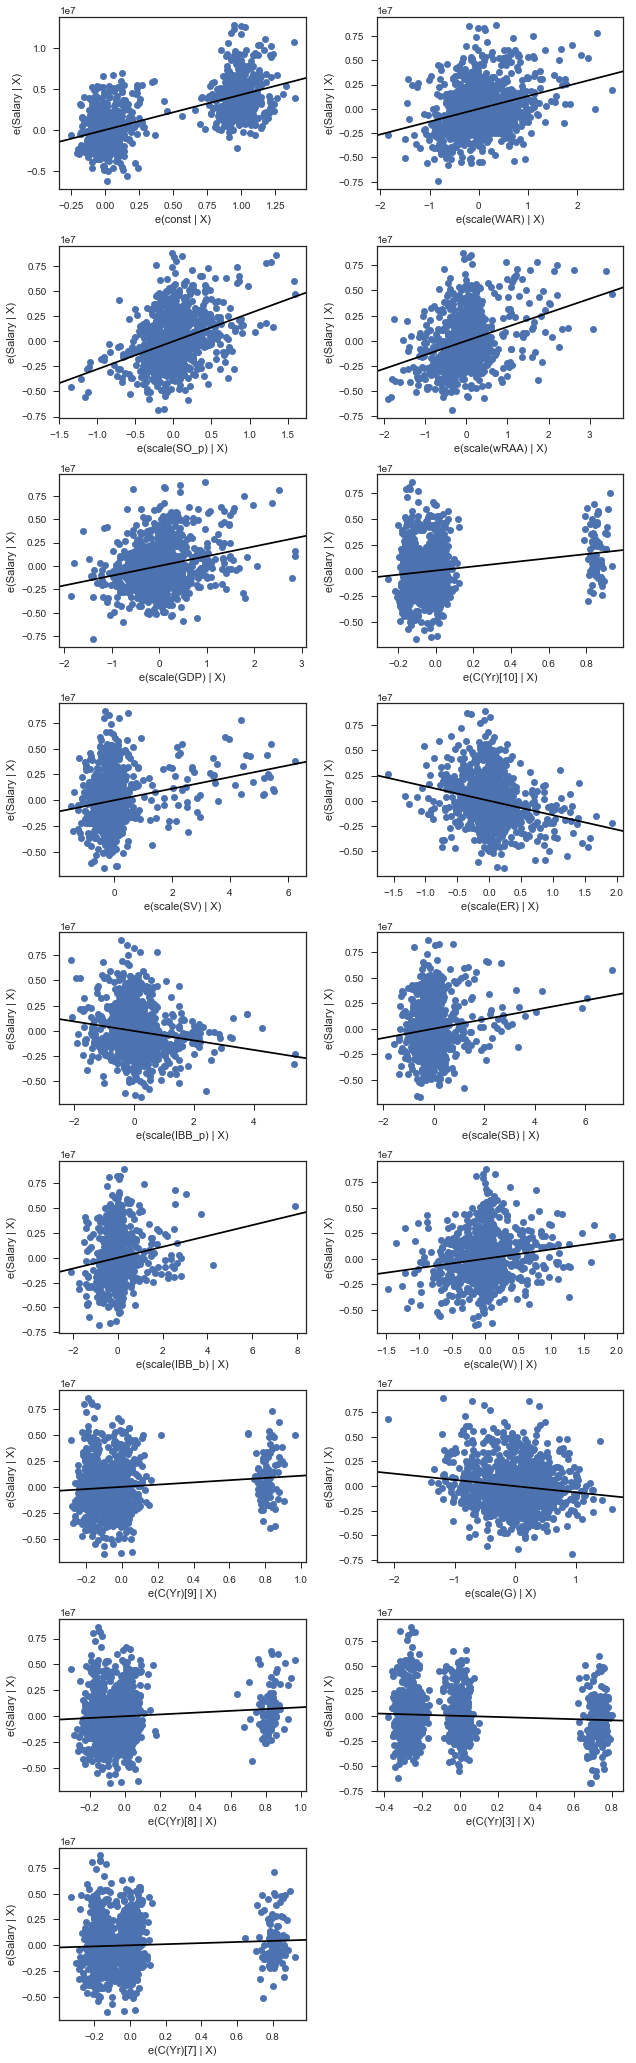

In [277]:
fig = plt.figure(figsize=(9,30))
sm.graphics.plot_partregress_grid(result10_2, fig=fig)
fig.suptitle("")
plt.show()

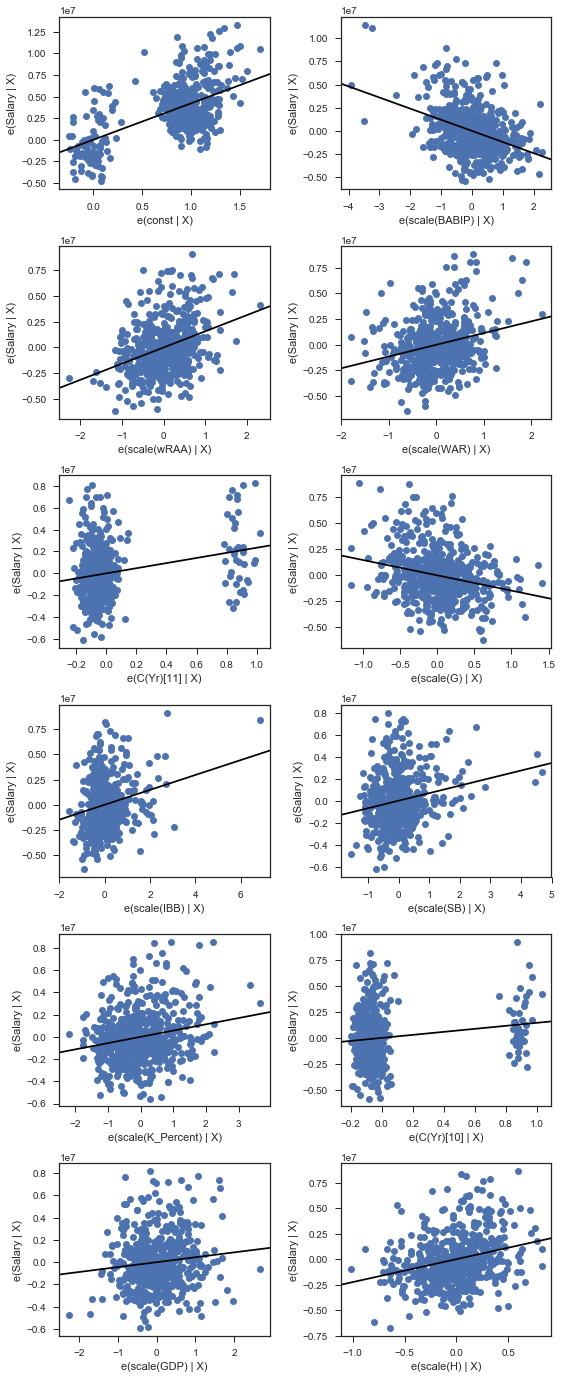

In [278]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_bat_yr_num_elim3, fig=fig)
fig.suptitle("")
plt.show()

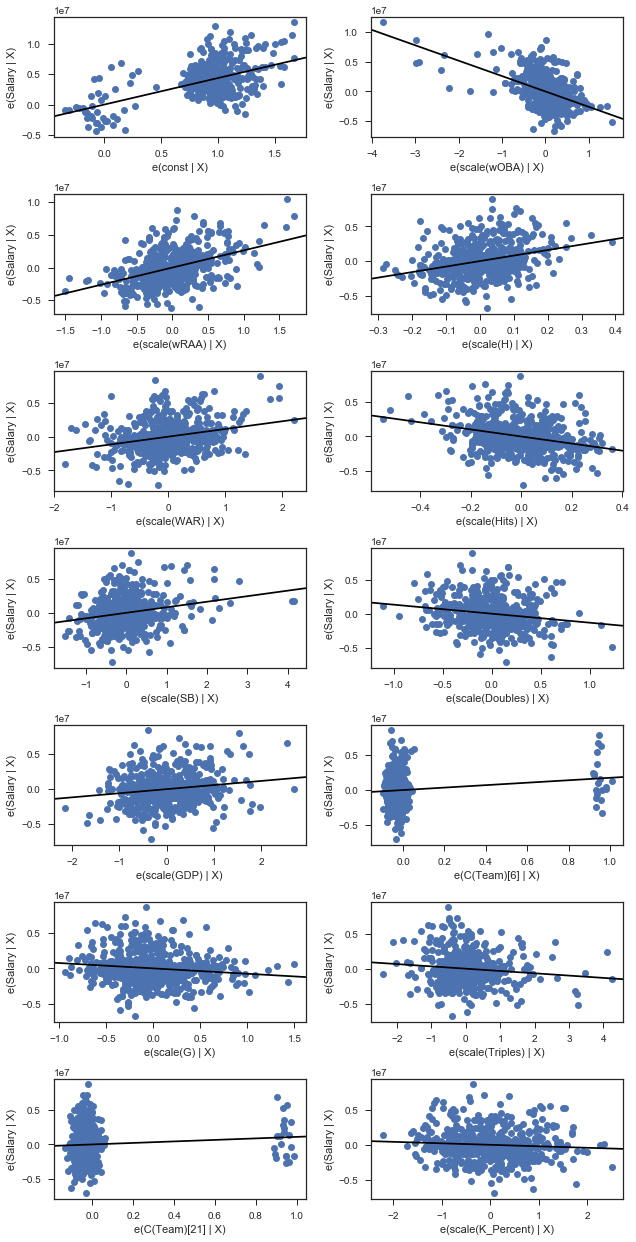

In [279]:
fig = plt.figure(figsize=(9,18))
sm.graphics.plot_partregress_grid(result_bat_team_num_elim2, fig=fig)
fig.suptitle("")
plt.show()

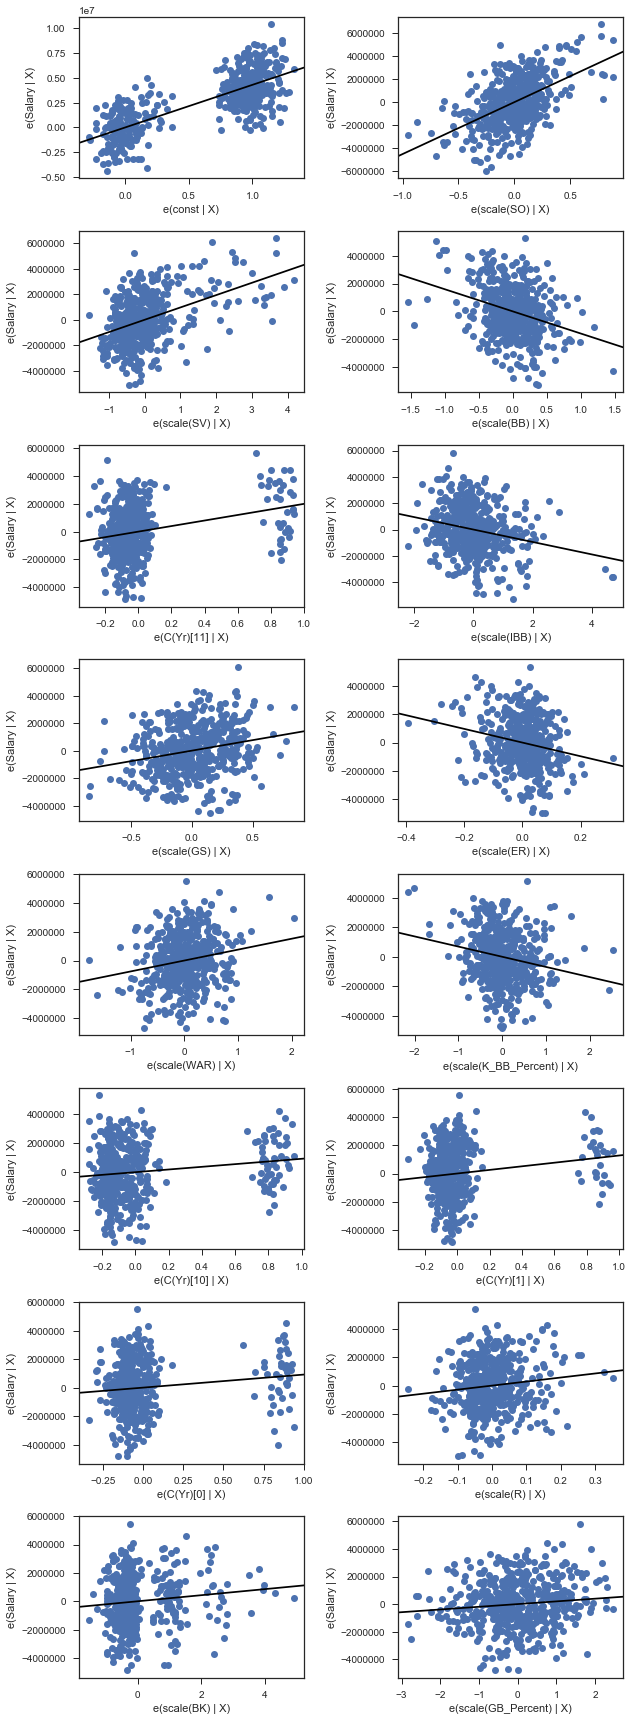

In [280]:
fig = plt.figure(figsize=(9,25))
sm.graphics.plot_partregress_grid(result_pit_yr_num_elim2, fig=fig)
fig.suptitle("")
plt.show()

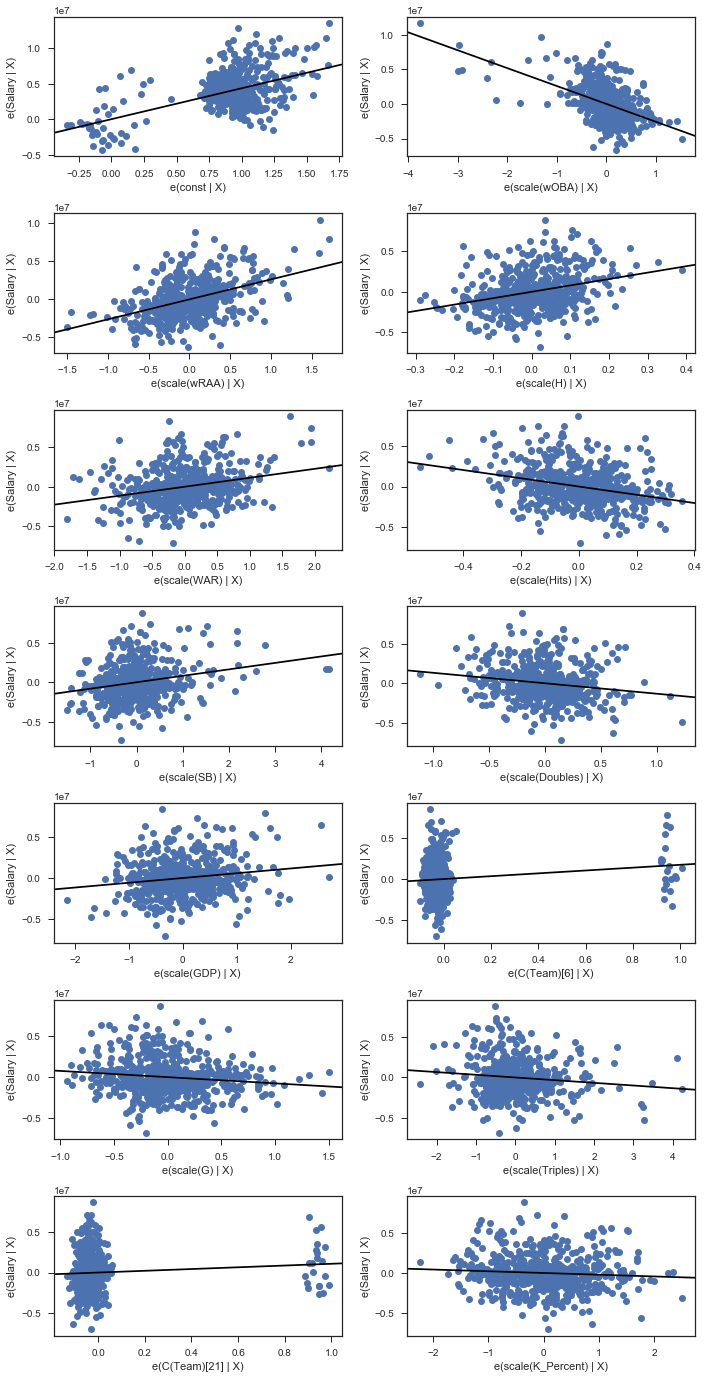

In [281]:
fig = plt.figure(figsize=(10,20))
sm.graphics.plot_partregress_grid(result_pit_team_num_elim2, fig=fig)
fig.suptitle("")
plt.show()

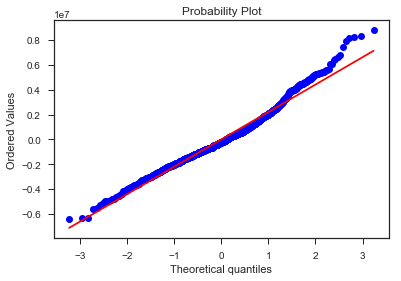

In [282]:
sp.stats.probplot(result10_2.resid, plot=plt)
plt.show()

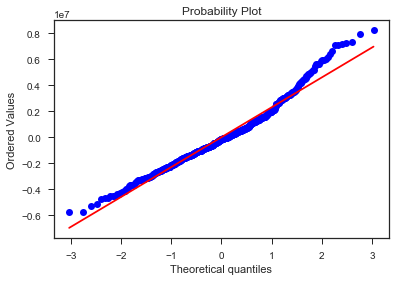

In [283]:
sp.stats.probplot(result_bat_yr_num_elim3.resid, plot=plt)
plt.show()

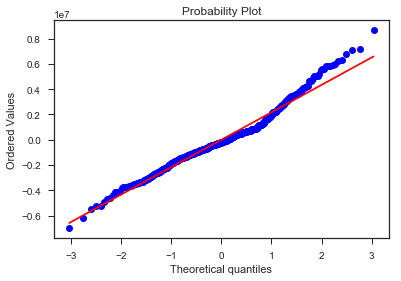

In [284]:
sp.stats.probplot(result_bat_team_num_elim2.resid, plot=plt)
plt.show()

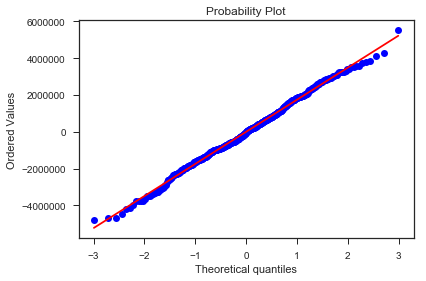

In [285]:
sp.stats.probplot(result_pit_yr_num_elim2.resid, plot=plt)
plt.show()

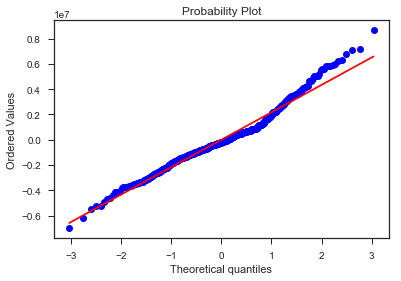

In [286]:
sp.stats.probplot(result_pit_team_num_elim2.resid, plot=plt)
plt.show()

### * Batters OLS model : 9-3 OLS model    |   Pitchers OLS model : 5-3 OLS model

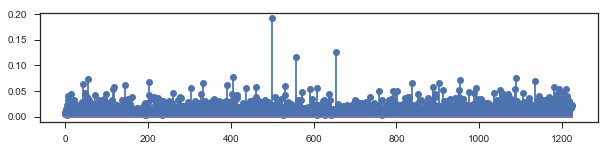

In [287]:
influence = result10.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

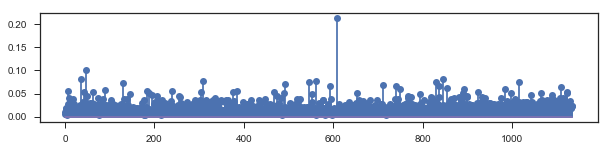

In [288]:
influence = result10_idx_elimVer.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

# * Checking SCORE and RMSE for the selected model

# 1. [10-2 model]

In [289]:
X1 = dfX10_2.values
y1 = dfY_idx10.values

In [290]:
## Why include shuffle of Signature?
## A: Because the data is aligned by year, the shuffle is set 'True' to eliminate sequential alignment.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1 ,test_size=0.2, shuffle=True, random_state=0)

In [291]:
X1_test.shape

(227, 17)

In [292]:
y1_test.shape

(227, 1)

## * Regression analysis using "Linear Regression" model

In [293]:
modelLR = LinearRegression(fit_intercept=True).fit(X1_train, y1_train)

In [294]:
print('RMSE of train: ', np.sqrt(mean_squared_error(y1_train, modelLR.predict(X1_train))))
print('RMSE of test: ', np.sqrt(mean_squared_error(y1_test, modelLR.predict(X1_test))))

RMSE of train:  2211505.18123
RMSE of test:  2308413.91458


In [295]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y1_test, modelLR.predict(X1_test))) - np.sqrt(mean_squared_error(y1_train, modelLR.predict(X1_train))))

96908.7333567


In [296]:
modelLR.score(X1_test, y1_test)

0.71429832802934878

## * Regression analysis using "XGBoost" model 1

In [297]:
df_xgb = XGBRegressor(subsample=0.75)

In [298]:
df_xgb.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)

In [299]:
xgb_pred = df_xgb.predict(X1_test)

print(np.sqrt(mean_squared_error(y1_train, df_xgb.predict(X1_train))))
print(np.sqrt(mean_squared_error(y1_test, xgb_pred)))

1671035.58069
2351909.59512


In [300]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y1_test, xgb_pred)) - np.sqrt(mean_squared_error(y1_train, df_xgb.predict(X1_train))))

680874.014432


In [301]:
df_xgb.predict(X1_test)
df_xgb.score(X1_test, y1_test)

0.70343037855245849

## * Regression analysis using "XGBoost" model 2 (Default)

In [302]:
xgb_model = XGBRegressor()

In [303]:
xgb_model.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [304]:
y_pred_xgb1_test = xgb_model.predict(X1_test)

print(np.sqrt(mean_squared_error(y1_train, xgb_model.predict(X1_train))))
print(np.sqrt(mean_squared_error(y1_test, y_pred_xgb1_test)))

1713237.99163
2399645.63943


In [305]:
# Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y1_test, y_pred_xgb1_test)) - np.sqrt(mean_squared_error(y1_train, xgb_model.predict(X1_train))))

686407.647809


In [306]:
xgb_model.predict(X1_test)
xgb_model.score(X1_test, y1_test)

0.69126942512986522

## * Regression analysis using "SVR" model

In [307]:
svm_model = SVR()
svm_model.fit(X1_train, y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [308]:
y_pred_svm = svm_model.predict(X1_test)
print(np.sqrt(mean_squared_error(y1_train, svm_model.predict(X1_train))))
print(np.sqrt(mean_squared_error(y1_test, y_pred_svm)))

4084251.43129
4656798.52954


In [309]:
svm_model.predict(X1_test)
svm_model.score(X1_test, y1_test)

-0.16268029806773621

## * Regression analysis using the "LassoLarsCV" model

In [310]:
modelLL = LassoLarsCV(cv=10, precompute=False).fit(X1_train, y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [311]:
print(np.sqrt(mean_squared_error(y1_train, modelLL.predict(X1_train))))
print(np.sqrt(mean_squared_error(y1_test, modelLL.predict(X1_test))))

2211505.18123
2308413.91458


In [312]:
print((np.sqrt(mean_squared_error(y1_test, modelLL.predict(X1_test)))) - (np.sqrt(mean_squared_error(y1_train, modelLL.predict(X1_train)))))

96908.7333567


In [313]:
modelLL.predict(X1_test)
modelLL.score(X1_test, y1_test)

0.71429832802934867

## * Regression analysis using the "LassoCV" model

In [314]:
modelLS = LassoCV(cv=10, precompute=False).fit(X1_train, y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [315]:
print(np.sqrt(mean_squared_error(y1_train, modelLS.predict(X1_train))))
print(np.sqrt(mean_squared_error(y1_test, modelLS.predict(X1_test))))

2211659.22602
2311592.14911


In [316]:
print((np.sqrt(mean_squared_error(y1_test, modelLS.predict(X1_test)))) - (np.sqrt(mean_squared_error(y1_train, modelLS.predict(X1_train)))))

99932.9230884


In [317]:
modelLS.predict(X1_test)
modelLS.score(X1_test, y1_test)

0.71351107579453998

## * Regression analysis using the "RidgeCV" model

In [318]:
modelRG = RidgeCV(cv=10).fit(X1_train, y1_train)

In [319]:
print(np.sqrt(mean_squared_error(y1_train, modelRG.predict(X1_train))))
print(np.sqrt(mean_squared_error(y1_test, modelRG.predict(X1_test))))

2215835.63962
2324980.82168


In [320]:
print((np.sqrt(mean_squared_error(y1_test, modelRG.predict(X1_test)))) - (np.sqrt(mean_squared_error(y1_train, modelRG.predict(X1_train)))))

109145.182062


In [321]:
modelRG.predict(X1_test)
modelRG.score(X1_test, y1_test)

0.71018279441850729

## * Regression analysis using the "ElasticNet" model

In [322]:
modelEN = ElasticNetCV(cv=10).fit(X1_train, y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [323]:
print(np.sqrt(mean_squared_error(y1_train, modelEN.predict(X1_train))))
print(np.sqrt(mean_squared_error(y1_test, modelEN.predict(X1_test))))

3861135.49904
4337075.04603


In [324]:
print((np.sqrt(mean_squared_error(y1_test, modelEN.predict(X1_test)))) - (np.sqrt(mean_squared_error(y1_train, modelEN.predict(X1_train)))))

475939.546989


In [325]:
# X1_train = sm.add_constant(X1_train)
# X1_test = sm.add_constant(X1_test)

modelEN_train_pred = modelEN.predict(X1_train)
modelEN_test_pred = modelEN.predict(X1_test)

train_rmsle = np.sqrt(np.square(np.log(modelEN_train_pred + 1) - np.log(y1_train + 1)).mean())
test_rmsle = np.sqrt(np.square(np.log(modelEN_test_pred + 1) - np.log(y1_test + 1)).mean())

In [326]:
print('RMSLE of train: ', train_rmsle)
print('RMSLE of test: ', test_rmsle)

RMSLE of train:  0.988868699246
RMSLE of test:  0.981069475868


In [327]:
modelEN.predict(X1_test)
modelEN.score(X1_test, y1_test)

-0.0085078637981883531

In [328]:
resultRG = model10_2.fit_regularized(alpha=0.01, L1_wt=0)
print(resultRG.params.mean())

838275.828701


In [329]:
resultLS = model10_2.fit_regularized(alpha=0.01, L1_wt=1)
print(resultLS.params.mean())

863658.1300778193


In [330]:
resultEN = model10_2.fit_regularized(alpha=0.01, L1_wt=0.5)
print(resultEN.params.mean())

850156.5491529439


### * The best Result is 'Linear Regression' model (Batters+Pithers)

# 2. [9-3 model for Batters]

In [331]:
X2 = dfX_bat_team_num_elim2.values
y2 = dfY_team_num_idx.values

In [332]:
## Why include shuffle of Signature?
## A: Because the data is aligned by year, the shuffle is set 'True' to eliminate sequential alignment.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 ,test_size=0.2, shuffle=True, random_state=0)

In [333]:
X2_test.shape

(116, 14)

In [334]:
y2_test.shape

(116, 1)

## * Regression analysis using "Linear Regression" model

In [335]:
result_bat_team_num_elim2

In [336]:
modelLR = LinearRegression(fit_intercept=True).fit(X2_train, y2_train)

In [337]:
print('RMSE of train: ', np.sqrt(mean_squared_error(y2_train, modelLR.predict(X2_train))))
print('RMSE of test: ', np.sqrt(mean_squared_error(y2_test, modelLR.predict(X2_test))))

RMSE of train:  2180507.66074
RMSE of test:  2286198.78025


In [338]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y2_test, modelLR.predict(X2_test))) - np.sqrt(mean_squared_error(y2_train, modelLR.predict(X2_train))))

105691.119512


In [339]:
modelLR.score(X2_test, y2_test)

0.75400958392971829

## * Regression analysis using "XGBoost" model 1

In [340]:
df_xgb = XGBRegressor(subsample=0.75)

In [341]:
df_xgb.fit(X2_train, y2_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)

In [342]:
xgb_pred = df_xgb.predict(X2_test)

print(np.sqrt(mean_squared_error(y2_train, df_xgb.predict(X2_train))))
print(np.sqrt(mean_squared_error(y2_test, xgb_pred)))

1340696.3076
2579915.82703


In [343]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y2_test, xgb_pred)) - np.sqrt(mean_squared_error(y2_train, df_xgb.predict(X2_train))))

1239219.51943


In [344]:
df_xgb.predict(X2_test)
df_xgb.score(X2_test, y2_test)

0.68674264022870934

## * Regression analysis using "XGBoost" model 2 (Default)

In [345]:
xgb_model = XGBRegressor()

In [346]:
xgb_model.fit(X2_train, y2_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [347]:
y_pred_xgb2_test = xgb_model.predict(X2_test)

print(np.sqrt(mean_squared_error(y2_train, xgb_model.predict(X2_train))))
print(np.sqrt(mean_squared_error(y2_test, y_pred_xgb2_test)))

1419834.00357
2614336.81108


In [348]:
# Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y2_test, y_pred_xgb2_test)) - np.sqrt(mean_squared_error(y2_train, xgb_model.predict(X2_train))))

1194502.80751


In [349]:
xgb_model.predict(X2_test)
xgb_model.score(X2_test, y2_test)

0.67832798046035747

## * Regression analysis using "SVR" model

In [350]:
svm_model = SVR()
svm_model.fit(X2_train, y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [351]:
y_pred_svm = svm_model.predict(X2_test)
print(np.sqrt(mean_squared_error(y2_train, svm_model.predict(X2_train))))
print(np.sqrt(mean_squared_error(y2_test, y_pred_svm)))

3969982.82028
4918778.98902


In [352]:
svm_model.predict(X2_test)
svm_model.score(X2_test, y2_test)

-0.13868822090410049

## * Regression analysis using the "LassoLarsCV" model

In [353]:
modelLL = LassoLarsCV(cv=10, precompute=False).fit(X2_train, y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [354]:
print(np.sqrt(mean_squared_error(y2_train, modelLL.predict(X2_train))))
print(np.sqrt(mean_squared_error(y2_test, modelLL.predict(X2_test))))

2180507.66074
2286198.78025


In [355]:
print((np.sqrt(mean_squared_error(y2_test, modelLL.predict(X2_test)))) - (np.sqrt(mean_squared_error(y2_train, modelLL.predict(X2_train)))))

105691.119512


In [356]:
modelLL.predict(X2_test)
modelLL.score(X2_test, y2_test)

0.75400958392971862

## * Regression analysis using the "LassoCV" model

In [357]:
modelLS = LassoCV(cv=10, precompute=False).fit(X2_train, y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [358]:
print(np.sqrt(mean_squared_error(y2_train, modelLS.predict(X2_train))))
print(np.sqrt(mean_squared_error(y2_test, modelLS.predict(X2_test))))

2181059.77425
2290326.1028


In [359]:
print((np.sqrt(mean_squared_error(y2_test, modelLS.predict(X2_test)))) - (np.sqrt(mean_squared_error(y2_train, modelLS.predict(X2_train)))))

109266.328558


In [360]:
modelLS.predict(X2_test)
modelLS.score(X2_test, y2_test)

0.75312059889875416

## * Regression analysis using the "RidgeCV" model

In [361]:
modelRG = RidgeCV(cv=10).fit(X2_train, y2_train)

In [362]:
print(np.sqrt(mean_squared_error(y2_train, modelRG.predict(X2_train))))
print(np.sqrt(mean_squared_error(y2_test, modelRG.predict(X2_test))))

2180667.83926
2286360.94223


In [363]:
print((np.sqrt(mean_squared_error(y2_test, modelRG.predict(X2_test)))) - (np.sqrt(mean_squared_error(y2_train, modelRG.predict(X2_train)))))

105693.102968


In [364]:
modelRG.predict(X2_test)
modelRG.score(X2_test, y2_test)

0.75397468608365759

## * Regression analysis using the "ElasticNet" model

In [365]:
modelEN = ElasticNetCV(cv=10).fit(X2_train, y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [366]:
print(np.sqrt(mean_squared_error(y2_train, modelEN.predict(X2_train))))
print(np.sqrt(mean_squared_error(y2_test, modelEN.predict(X2_test))))

3729850.13547
4620517.15252


In [367]:
print((np.sqrt(mean_squared_error(y2_test, modelEN.predict(X2_test)))) - (np.sqrt(mean_squared_error(y2_train, modelEN.predict(X2_train)))))

890667.017054


In [368]:
modelEN.predict(X2_test)
modelEN.score(X2_test, y2_test)

-0.0047809285140940627

### * The best Result is 'Linear Regression' model (for Batters)

# 3. [5-3 model for Pitchers]

In [369]:
X3 = dfX_pit_yr_num_elim2.values
y3 = dfY_yr_num_idx.values

In [370]:
## Why include shuffle of Signature?
## A: Because the data is aligned by year, the shuffle is set 'True' to eliminate sequential alignment.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3 ,test_size=0.2, shuffle=True, random_state=0)

In [371]:
X3_test.shape

(101, 16)

In [372]:
y3_test.shape

(101, 1)

## * Regression analysis using "Linear Regression" model

In [373]:
modelLR = LinearRegression(fit_intercept=True).fit(X3_train, y3_train)

In [374]:
print('RMSE of train: ', np.sqrt(mean_squared_error(y3_train, modelLR.predict(X3_train))))
print('RMSE of test: ', np.sqrt(mean_squared_error(y3_test, modelLR.predict(X3_test))))

RMSE of train:  1745447.62842
RMSE of test:  1738267.29421


In [375]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y3_test, modelLR.predict(X3_test))) - np.sqrt(mean_squared_error(y3_train, modelLR.predict(X3_train))))

-7180.33420681


In [376]:
modelLR.score(X3_test, y3_test)

0.79128416965841286

## * Regression analysis using "XGBoost" model 1

In [377]:
df_xgb = XGBRegressor(subsample=0.75)

In [378]:
df_xgb.fit(X3_train, y3_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)

In [379]:
xgb_pred = df_xgb.predict(X3_test)

print(np.sqrt(mean_squared_error(y3_train, df_xgb.predict(X3_train))))
print(np.sqrt(mean_squared_error(y3_test, xgb_pred)))

1012351.83722
1842673.7298


In [380]:
## Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y3_test, xgb_pred)) - np.sqrt(mean_squared_error(y3_train, df_xgb.predict(X3_train))))

830321.892582


In [381]:
df_xgb.predict(X3_test)
df_xgb.score(X3_test, y3_test)

0.76545879028832631

## * Regression analysis using "XGBoost" model 2 (Default)

In [382]:
xgb_model = XGBRegressor()

In [383]:
xgb_model.fit(X3_train, y3_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [384]:
y_pred_xgb3_test = xgb_model.predict(X3_test)

print(np.sqrt(mean_squared_error(y3_train, xgb_model.predict(X3_train))))
print(np.sqrt(mean_squared_error(y3_test, y_pred_xgb3_test)))

1064588.80146
1815633.76596


In [385]:
# Checking difference y_test from y_train

print(np.sqrt(mean_squared_error(y3_test, y_pred_xgb3_test)) - np.sqrt(mean_squared_error(y3_train, xgb_model.predict(X3_train))))

751044.964493


In [386]:
xgb_model.predict(X3_test)
xgb_model.score(X3_test, y3_test)

0.77229174568234416

## * Regression analysis using "SVR" model

In [387]:
svm_model = SVR()
svm_model.fit(X3_train, y3_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [388]:
y_pred_svm = svm_model.predict(X3_test)
print(np.sqrt(mean_squared_error(y3_train, svm_model.predict(X3_train))))
print(np.sqrt(mean_squared_error(y3_test, y_pred_svm)))

3847980.48597
4018641.8465


In [389]:
svm_model.predict(X3_test)
svm_model.score(X3_test, y3_test)

-0.11552903014604232

## * Regression analysis using the "LassoLarsCV" model

In [390]:
modelLL = LassoLarsCV(cv=10, precompute=False).fit(X3_train, y3_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [391]:
print(np.sqrt(mean_squared_error(y3_train, modelLL.predict(X3_train))))
print(np.sqrt(mean_squared_error(y3_test, modelLL.predict(X3_test))))

1745447.62842
1738267.29421


In [392]:
print((np.sqrt(mean_squared_error(y3_test, modelLL.predict(X3_test)))) - (np.sqrt(mean_squared_error(y3_train, modelLL.predict(X3_train)))))

-7180.33420681


In [393]:
modelLL.predict(X3_test)
modelLL.score(X3_test, y3_test)

0.79128416965841286

## * Regression analysis using the "LassoCV" model

In [394]:
modelLS = LassoCV(cv=10, precompute=False).fit(X3_train, y3_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [395]:
print(np.sqrt(mean_squared_error(y3_train, modelLS.predict(X3_train))))
print(np.sqrt(mean_squared_error(y3_test, modelLS.predict(X3_test))))

1746687.27189
1743313.51293


In [396]:
print((np.sqrt(mean_squared_error(y3_test, modelLS.predict(X3_test)))) - (np.sqrt(mean_squared_error(y3_train, modelLS.predict(X3_train)))))

-3373.75895973


In [397]:
modelLS.predict(X3_test)
modelLS.score(X3_test, y3_test)

0.79007059968547733

## * Regression analysis using the "RidgeCV" model

In [398]:
modelRG = RidgeCV(cv=10).fit(X3_train, y3_train)

In [399]:
print(np.sqrt(mean_squared_error(y3_train, modelRG.predict(X3_train))))
print(np.sqrt(mean_squared_error(y3_test, modelRG.predict(X3_test))))

1745606.46915
1739744.08266


In [400]:
print((np.sqrt(mean_squared_error(y3_test, modelRG.predict(X3_test)))) - (np.sqrt(mean_squared_error(y3_train, modelRG.predict(X3_train)))))

-5862.38648957


In [401]:
modelRG.predict(X3_test)
modelRG.score(X3_test, y3_test)

0.7909293795060488

## * Regression analysis using the "ElasticNet" model

In [402]:
modelEN = ElasticNetCV(cv=10).fit(X3_train, y3_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [403]:
print(np.sqrt(mean_squared_error(y3_train, modelEN.predict(X3_train))))
print(np.sqrt(mean_squared_error(y3_test, modelEN.predict(X3_test))))

3679782.94462
3806275.8169


In [404]:
print((np.sqrt(mean_squared_error(y3_test, modelEN.predict(X3_test)))) - (np.sqrt(mean_squared_error(y3_train, modelEN.predict(X3_train)))))

126492.872282


In [405]:
modelEN.predict(X3_test)
modelEN.score(X3_test, y3_test)

-0.00074351275909845249

### * The best Result is 'LassoCV' model (for Pitchers)

# [Last Selected model]

### Divided Data (not all data-Batters + Pitchers)
> ### * Batters : 'Linear Regression' model
> ### * Pitchers : 'LassoCV' model

# * Load TEST data

In [406]:
test_bat = pd.read_csv('../dataset/fa_2018_bat_list.csv')
test_pit = pd.read_csv('../dataset/fa_2018_pit_list.csv')

In [407]:
test_bat.shape, test_pit.shape

((11, 40), (26, 41))

## * Preprocessing TEST data

In [408]:
test_bat.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples","BB%": "BB_Percent", "K%": "K_Percent",
                       "BB/K" : "BB_per_K", "wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs",
                       "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"}, inplace=True)

test_pit.rename(columns={"HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                       "K-BB%": "K_BB_Percent", "GB%": "GB_Percent", "HR/FB" : "HR_per_FB", "LOB%": "LOB_Percent",
                       "Contract Yrs" : "Contract_Yrs", "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"},
              inplace=True)

In [409]:
## Encoding Categorical Columns of Batters and Pitchers

def encode_df_x(df1, df2):
    
    ## categorical variables of Yr
    df_yr_le_b = LabelEncoder()
    test_bat['Yr'] = df_yr_le_b.fit_transform(test_bat['Yr'])
    
    df_yr_le_p = LabelEncoder()
    test_pit['Yr'] = df_yr_le_p.fit_transform(test_pit['Yr'])
    
    enc_dict_yr_b = {'Yr' : df_yr_le_b}
    enc_dict_yr_p = {'Yr' : df_yr_le_p}
        
    ## categorical variables of Team
    df_team_le_b = LabelEncoder()
    test_bat['Team'] = df_team_le_b.fit_transform(test_bat['Team'])
    
    df_team_le_p = LabelEncoder()
    test_pit['Team'] = df_team_le_p.fit_transform(test_pit['Team'])
    
    enc_dict_team_b = {'Team' : df_team_le_b}
    enc_dict_team_p = {'Team' : df_team_le_p}
    
    return test_bat, test_pit, enc_dict_yr_b, enc_dict_yr_p, enc_dict_team_b, enc_dict_team_p

test_df_x = encode_df_x(test_bat, test_pit)

In [410]:
test_batX = test_bat.iloc[:, 1:37]
test_pitX = test_pit.iloc[:, 1:38]

test_batX[test_batX < 0] = 0
test_pitX[test_pitX < 0] = 0

In [411]:
test_batY = pd.DataFrame(test_bat['Salary'])
test_pitY = pd.DataFrame(test_pit['Salary'])

In [412]:
merged_test_bat = pd.concat([test_batX, test_batY], axis=1)
merged_test_pit = pd.concat([test_pitX, test_pitY], axis=1)

In [413]:
cols_b = df_batX.columns.tolist()

cat_cols_b = cols_b[:2]
num_cols_b = cols_b[2:]

cat_cols_list_b = []
num_cols_list_b = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols_b:
        cat_cols_list_b.append("C(" + item1 + ")")
        
    for item2 in num_cols_b:
        num_cols_list_b.append("scale(" + item2 + ")")
        
    return cat_cols_list_b, num_cols_list_b

converted_cols_b = r_style_cat_cols(cat_cols_b, num_cols_b)

converted_cols_list_b = " + ".join(cat_cols_list_b + num_cols_list_b)
model_str_b = "Salary ~ "

zero = ' + 0'

ols_str_list_b = model_str_b + converted_cols_list_b + zero
merging_converted_cols_b = cat_cols_list_b + num_cols_list_b

In [414]:
test_batX_team_num = test_batX.iloc[:, 1:37]
test_pitX_yr_num = test_pitX.iloc[:, 0:38]

In [415]:
test_batX_team_num.tail()

Team    G   AB   PA    H  Hits  Doubles  Triples  HR   R  RBI  BB  IBB  \
6      3  101  287  303   70    38       23        0   9  27   35  12    2   
7      1   74  218  237   55    36        9        0  10  23   35  14    3   
8      6   96  341  365   96    65       11        0  20  44   53  22    0   
9      5  142  451  521  120    70       22        0  28  72   67  68    6   
10     8  122  438  507  130    75       24        7  24  80   63  62    0   

     SO  BB_Percent  K_Percent  BB_per_K  BABIP  HBP  SF  SH  GDP  SB  CS  \
6    81         4.0       26.7      0.15  0.307    0   2   2    6   0   0   
7    70         5.9       29.5      0.20  0.324    3   1   1    4   0   1   
8    97         6.0       26.6      0.23  0.336    0   2   0   10   0   0   
9   118        13.1       22.6      0.58  0.302    2   0   0    9   2   0   
10   78        12.2       15.4      0.79  0.312    3   4   0    5   3   0   

     Def    ISO   wOBA  wRAA    AVG    OBP    SLG    OPS  WAR  wRC_Plus   WPA  
6    4.1  0.174  0.289   0.0  0.244  0.272  0.418  0.691  0.4      78.0  0.00  
7    7.6  0.179  0.310   0.0  0.252  0.305  0.431  0.736  1.0      91.0  0.00  
8   10.8  0.208  0.344   7.0  0.282  0.323  0.490  0.813  2.7     113.0  1.72  
9    0.0  0.235  0.366  19.7  0.266  0.365  0.501  0.866  2.4     132.0  2.72  
10   8.6  0.251  0.392  30.5  0.297  0.385  0.548  0.933  5.0     141.0  2.27

In [416]:
del test_pitX_yr_num['Team']

In [417]:
test_pitX_yr_num.tail()

Yr  W   L   G  GS  CG     IP    H  HR  BB   SO   R  SV  BS  BK  ER  HBP  \
21   0  8  15  33  25   1  147.2  136  20  77  120  79   1   0   2  77    4   
22   0  4   2  59   0   0   58.2   39   6  28   79  16  32   1   0  15    3   
23   0  5   4  19   8   0   57.1   73  10  32   52  51   0   0   0  50    1   
24   0  5  10  28  22   0  130.2  138  24  60   94  84   1   0   0  83    2   
25   0  5   2  60   1   0   91.1   69   9  18  101  32   4   1   0  28    1   

    HLD  IBB  ShO  TBF  WP  HR_per_9  BB_per_9  K_per_9  K_per_BB  \
21    0    2    1  631  12      1.22      4.69     7.31      1.56   
22    0    1    0  242   7      0.92      4.30    12.12      2.82   
23    0    2    0  269   5      1.57      5.02     8.16      1.63   
24    0    3    0  578   7      1.65      4.13     6.47      1.57   
25   14    4    0  354   0      0.89      1.77     9.95      5.61   

    K_BB_Percent  GB_Percent  HR_per_FB  LOB_Percent   ERA  BABIP   FIP  WHIP  \
21           6.8        58.1       22.0         73.0  4.69  0.283  4.94  1.44   
22          21.1        40.5       12.0         87.7  2.30  0.262  3.38  1.14   
23           7.4        44.5       16.4         59.8  7.85  0.362  5.34  1.83   
24           5.9        44.1       15.9         69.7  5.72  0.286  5.53  1.52   
25          23.5        32.9        8.0         74.3  2.76  0.267  2.85  0.95   

     WPA  WAR  
21  0.00  1.1  
22  3.54  1.1  
23  0.00  0.0  
24  0.00  0.0  
25  2.90  2.2

In [418]:
team_str = ['Team']
team_num_cols_list_b = team_str + num_cols_list_b
print(team_num_cols_list_b)

['Team', 'scale(G)', 'scale(AB)', 'scale(PA)', 'scale(H)', 'scale(Hits)', 'scale(Doubles)', 'scale(Triples)', 'scale(HR)', 'scale(R)', 'scale(RBI)', 'scale(BB)', 'scale(IBB)', 'scale(SO)', 'scale(BB_Percent)', 'scale(K_Percent)', 'scale(BB_per_K)', 'scale(BABIP)', 'scale(HBP)', 'scale(SF)', 'scale(SH)', 'scale(GDP)', 'scale(SB)', 'scale(CS)', 'scale(Def)', 'scale(ISO)', 'scale(wOBA)', 'scale(wRAA)', 'scale(AVG)', 'scale(OBP)', 'scale(SLG)', 'scale(OPS)', 'scale(WAR)', 'scale(wRC_Plus)', 'scale(WPA)']


In [419]:
test_batX_team_num.columns

Index(['Team', 'G', 'AB', 'PA', 'H', 'Hits', 'Doubles', 'Triples', 'HR', 'R',
       'RBI', 'BB', 'IBB', 'SO', 'BB_Percent', 'K_Percent', 'BB_per_K',
       'BABIP', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA',
       'wRAA', 'AVG', 'OBP', 'SLG', 'OPS', 'WAR', 'wRC_Plus', 'WPA'],
      dtype='object')

In [420]:
# test_batX_team_num_md = sm.OLS.from_formula(cat_num_ols_list_b, test_bat)
# test_batX_team_num_rt = test_batX_team_num_md.fit()

In [421]:
cat_num_ols_list_b

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR) + scale(R) + scale(RBI) + scale(BB) + scale(IBB) + scale(SO) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP) + scale(HBP) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + 0'

In [422]:
print(test_bat.columns.tolist())

['Name', 'Yr', 'Team', 'G', 'AB', 'PA', 'H', 'Hits', 'Doubles', 'Triples', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'BB_Percent', 'K_Percent', 'BB_per_K', 'BABIP', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA', 'wRAA', 'AVG', 'OBP', 'SLG', 'OPS', 'WAR', 'wRC_Plus', 'WPA', 'Contract_Yrs', 'Total_Salary', 'Salary']


In [423]:
test_batX_team_num_list = list(test_batX_team_num.columns)
test_batX_team_num_list2 = team_num_cols_list_b
team_num_list_b = test_batX_team_num.copy()

for item, item2 in zip(test_batX_team_num_list, test_batX_team_num_list2):
    team_num_list_b.rename(columns={item : item2}, inplace=True)
        
test_batX_team_num = team_num_list_b
print(test_batX_team_num.shape)
test_batX_team_num.tail()

(11, 35)


Team  scale(G)  scale(AB)  scale(PA)  scale(H)  scale(Hits)  \
6      3       101        287        303        70           38   
7      1        74        218        237        55           36   
8      6        96        341        365        96           65   
9      5       142        451        521       120           70   
10     8       122        438        507       130           75   

    scale(Doubles)  scale(Triples)  scale(HR)  scale(R)  scale(RBI)  \
6               23               0          9        27          35   
7                9               0         10        23          35   
8               11               0         20        44          53   
9               22               0         28        72          67   
10              24               7         24        80          63   

    scale(BB)  scale(IBB)  scale(SO)  scale(BB_Percent)  scale(K_Percent)  \
6          12           2         81                4.0              26.7   
7          14           3         70                5.9              29.5   
8          22           0         97                6.0              26.6   
9          68           6        118               13.1              22.6   
10         62           0         78               12.2              15.4   

    scale(BB_per_K)  scale(BABIP)  scale(HBP)  scale(SF)  scale(SH)  \
6              0.15         0.307           0          2          2   
7              0.20         0.324           3          1          1   
8              0.23         0.336           0          2          0   
9              0.58         0.302           2          0          0   
10             0.79         0.312           3          4          0   

    scale(GDP)  scale(SB)  scale(CS)  scale(Def)  scale(ISO)  scale(wOBA)  \
6            6          0          0         4.1       0.174        0.289   
7            4          0          1         7.6       0.179        0.310   
8           10          0          0        10.8       0.208        0.344   
9            9          2          0         0.0       0.235        0.366   
10           5          3          0         8.6       0.251        0.392   

    scale(wRAA)  scale(AVG)  scale(OBP)  scale(SLG)  scale(OPS)  scale(WAR)  \
6           0.0       0.244       0.272       0.418       0.691         0.4   
7           0.0       0.252       0.305       0.431       0.736         1.0   
8           7.0       0.282       0.323       0.490       0.813         2.7   
9          19.7       0.266       0.365       0.501       0.866         2.4   
10         30.5       0.297       0.385       0.548       0.933         5.0   

    scale(wRC_Plus)  scale(WPA)  
6              78.0        0.00  
7              91.0        0.00  
8             113.0        1.72  
9             132.0        2.72  
10            141.0        2.27

In [424]:
test_batX_team_num.rename(columns={'Team' : 'C(Team)'}, inplace=True)
test_batX_team_num

C(Team)  scale(G)  scale(AB)  scale(PA)  scale(H)  scale(Hits)  \
0         4       154        571        667       148           85   
1         2        89        272        316        69           33   
2         4       146        555        617       141           74   
3         1        49        128        138        22           15   
4         0       131        339        367        93           50   
5         7       149        508        576       125           69   
6         3       101        287        303        70           38   
7         1        74        218        237        55           36   
8         6        96        341        365        96           65   
9         5       142        451        521       120           70   
10        8       122        438        507       130           75   

    scale(Doubles)  scale(Triples)  scale(HR)  scale(R)  scale(RBI)  \
0               37               3         23        90          79   
1               19               0         17        38          43   
2               29               2         36        82         101   
3                3               1          3        14           9   
4               22               1         20        46          65   
5               34               0         22        73          79   
6               23               0          9        27          35   
7                9               0         10        23          35   
8               11               0         20        44          53   
9               22               0         28        72          67   
10              24               7         24        80          63   

    scale(BB)  scale(IBB)  scale(SO)  scale(BB_Percent)  scale(K_Percent)  \
0          88           6         94               13.2              14.1   
1          37           0         87               11.7              27.5   
2          57           0        139                9.2              22.5   
3           8           1         33                5.8              23.9   
4          23           5         88                6.3              24.0   
5          57           6        120                9.9              20.8   
6          12           2         81                4.0              26.7   
7          14           3         70                5.9              29.5   
8          22           0         97                6.0              26.6   
9          68           6        118               13.1              22.6   
10         62           0         78               12.2              15.4   

    scale(BB_per_K)  scale(BABIP)  scale(HBP)  scale(SF)  scale(SH)  \
0              0.94         0.274           6          2          0   
1              0.43         0.308           6          1          0   
2              0.41         0.274           2          3          0   
3              0.24         0.207           2          0          0   
4              0.26         0.311           1          4          0   
5              0.48         0.278           6          5          0   
6              0.15         0.307           0          2          2   
7              0.20         0.324           3          1          1   
8              0.23         0.336           0          2          0   
9              0.58         0.302           2          0          0   
10             0.79         0.312           3          4          0   

    scale(GDP)  scale(SB)  scale(CS)  scale(Def)  scale(ISO)  scale(wOBA)  \
0           11          5          1         0.0       0.196        0.350   
1            3          0          0         5.4       0.257        0.367   
2           11          1          1         0.0       0.254        0.350   
3            2          7          4         2.1       0.109        0.224   
4            5          0          0         0.0       0.248        0.346   
5           14          0          1         0.0       0.197        0.

In [425]:
test_batX_team_num['C(Team)[6]'] = (test_batX_team_num['C(Team)'] == 6).astype(int)
test_batX_team_num['C(Team)[21]'] = (test_batX_team_num['C(Team)'] == 21).astype(int)

In [426]:
print(test_batX_team_num.columns.tolist())

['C(Team)', 'scale(G)', 'scale(AB)', 'scale(PA)', 'scale(H)', 'scale(Hits)', 'scale(Doubles)', 'scale(Triples)', 'scale(HR)', 'scale(R)', 'scale(RBI)', 'scale(BB)', 'scale(IBB)', 'scale(SO)', 'scale(BB_Percent)', 'scale(K_Percent)', 'scale(BB_per_K)', 'scale(BABIP)', 'scale(HBP)', 'scale(SF)', 'scale(SH)', 'scale(GDP)', 'scale(SB)', 'scale(CS)', 'scale(Def)', 'scale(ISO)', 'scale(wOBA)', 'scale(wRAA)', 'scale(AVG)', 'scale(OBP)', 'scale(SLG)', 'scale(OPS)', 'scale(WAR)', 'scale(wRC_Plus)', 'scale(WPA)', 'C(Team)[6]', 'C(Team)[21]']


In [427]:
to_list = ['C(Team)', 'C(Team)[6]', 'C(Team)[21]', 'scale(G)', 'scale(AB)', 'scale(PA)', 'scale(H)', 'scale(Hits)',
           'scale(Doubles)', 'scale(Triples)', 'scale(HR)', 'scale(R)', 'scale(RBI)', 'scale(BB)', 'scale(IBB)',
           'scale(SO)', 'scale(BB_Percent)', 'scale(K_Percent)', 'scale(BB_per_K)', 'scale(BABIP)', 'scale(HBP)',
           'scale(SF)', 'scale(SH)', 'scale(GDP)', 'scale(SB)', 'scale(CS)', 'scale(Def)', 'scale(ISO)', 'scale(wOBA)',
           'scale(wRAA)', 'scale(AVG)', 'scale(OBP)', 'scale(SLG)', 'scale(OPS)', 'scale(WAR)', 'scale(wRC_Plus)',
           'scale(WPA)']
test_batX_team_num = test_batX_team_num[to_list]
test_batX_team_num

C(Team)  C(Team)[6]  C(Team)[21]  scale(G)  scale(AB)  scale(PA)  \
0         4           0            0       154        571        667   
1         2           0            0        89        272        316   
2         4           0            0       146        555        617   
3         1           0            0        49        128        138   
4         0           0            0       131        339        367   
5         7           0            0       149        508        576   
6         3           0            0       101        287        303   
7         1           0            0        74        218        237   
8         6           1            0        96        341        365   
9         5           0            0       142        451        521   
10        8           0            0       122        438        507   

    scale(H)  scale(Hits)  scale(Doubles)  scale(Triples)  scale(HR)  \
0        148           85              37               3         23   
1         69           33              19               0         17   
2        141           74              29               2         36   
3         22           15               3               1          3   
4         93           50              22               1         20   
5        125           69              34               0         22   
6         70           38              23               0          9   
7         55           36               9               0         10   
8         96           65              11               0         20   
9        120           70              22               0         28   
10       130           75              24               7         24   

    scale(R)  scale(RBI)  scale(BB)  scale(IBB)  scale(SO)  scale(BB_Percent)  \
0         90          79         88           6         94               13.2   
1         38          43         37           0         87               11.7   
2         82         101         57           0        139                9.2   
3         14           9          8           1         33                5.8   
4         46          65         23           5         88                6.3   
5         73          79         57           6        120                9.9   
6         27          35         12           2         81                4.0   
7         23          35         14           3         70                5.9   
8         44          53         22           0         97                6.0   
9         72          67         68           6        118               13.1   
10        80          63         62           0         78               12.2   

    scale(K_Percent)  scale(BB_per_K)  scale(BABIP)  scale(HBP)  scale(SF)  \
0               14.1             0.94         0.274           6          2   
1               27.5             0.43         0.308           6          1   
2               22.5             0.41         0.274           2          3   
3               23.9             0.24         0.207           2          0   
4               24.0             0.26         0.311           1          4   
5               20.8             0.48         0.278           6          5   
6               26.7             0.15         0.307           0          2   
7               29.5             0.20         0.324           3          1   
8               26.6             0.23         0.336           0          2   
9               22.6             0.58         0.302           2          0   
10              15.4             0.79         0.312           3          4   

    scale(SH)  scale(GDP)  scale(SB)  scale(CS)  scale(Def)  scale(ISO)  \
0           0          11          5          1         0.0       0.196   
1           0           3          0          0         5.4       0.257   
2           0          11          1          1         0.0       0.254   
3           0           2          7          4         2.1     

In [428]:
print(dfX_bat_team_num_elim2.columns.tolist())

['const', 'scale(wOBA)', 'scale(wRAA)', 'scale(H)', 'scale(WAR)', 'scale(Hits)', 'scale(SB)', 'scale(Doubles)', 'scale(GDP)', 'C(Team)[6]', 'scale(G)', 'scale(Triples)', 'C(Team)[21]', 'scale(K_Percent)']


In [429]:
dfX_bat_team_num_elim2

const  scale(wOBA)  scale(wRAA)  scale(H)  scale(WAR)  scale(Hits)  \
0      1.0    -0.389489    -1.226083  0.673946   -0.602155     0.811179   
1      1.0     0.169028    -0.192278  0.695208    1.309142     1.177562   
2      1.0    -0.968692    -1.146560 -0.729357   -0.283606    -0.562760   
6      1.0     1.596351     2.082093  1.014141    1.118013     0.536391   
7      1.0     0.065599    -0.438801  1.226763   -0.602155     1.177562   
8      1.0     0.458630     0.229196  0.610160    0.353494     0.841711   
10     1.0     0.044913    -0.247945 -0.665570   -1.048125    -0.379568   
11     1.0     0.148342    -0.152516 -0.920716   -0.347316    -0.776483   
13     1.0     0.189714    -0.208183  1.184238    1.054303     1.208094   
14     1.0     0.913718     0.412100 -0.856930   -0.092476    -0.898611   
15     1.0     0.003542    -0.327468 -0.601784   -0.347316    -0.807015   
16     1.0    -0.161945    -0.939799  1.566957    0.353494     1.879798   
17     1.0    -0.161945    -0.677371  0.291227   -1.048125     0.322667   
18     1.0     0.562059     0.396196  0.440062    0.735753     0.444795   
19     1.0    -0.058516    -0.391087 -0.559259   -0.665865    -0.593292   
20     1.0     0.044913    -0.192278 -1.303435   -0.474735    -1.326059   
21     1.0     0.893032     0.889241  0.716471    0.480913     0.689051   
22     1.0    -1.216922    -1.146560 -1.027027   -1.048125    -0.776483   
23     1.0    -0.596347    -1.027275 -0.410424   -0.411026    -0.349036   
24     1.0     0.251772    -0.080945  0.355014    0.544623     0.536391   
25     1.0    -0.451547    -0.494467 -1.133338   -0.347316    -1.051271   
27     1.0     0.500002    -0.025279 -1.388484    0.098654    -1.356591   
28     1.0     0.148342    -0.232040  0.355014    0.417203     0.383731   
29     1.0     0.044913    -0.335420 -0.282851    0.034944    -0.410100   
30     1.0     0.830975     0.316672 -0.856930    0.353494    -0.868079   
31     1.0    -1.816811    -0.613753 -1.622368   -0.474735    -1.448187   
33     1.0    -0.244688    -1.210179  1.885890    0.289784     2.612565   
34     1.0     0.500002     0.507528  1.907152    2.201081     2.215649   
35     1.0     0.913718     0.777908  0.652684    1.755112     1.208094   
36     1.0     0.396572     0.173530  0.631422   -0.411026     0.689051   
39     1.0     0.417258    -0.009374 -1.197124   -0.283606    -1.173399   
40     1.0     0.065599    -0.359277  0.440062   -0.283606     0.963839   
41     1.0    -0.844577    -1.361273 -0.219065   -1.048125     0.017348   
42     1.0     0.106971    -0.287706  0.227441    0.034944     0.139476   
43     1.0     1.679094     2.169569  0.950354    1.372852     0.994371   
45     1.0    -0.120573    -0.796657  1.056665    0.480913     0.811179   
46     1.0     0.582745     0.523433  0.907830   -0.283606     0.536391   
47     1.0    -0.658405    -0.470610 -1.303435   -1.239255    -1.051271   
48     1.0     0.582745     0.531386  1.099190    1.054303     1.147030   
49     1.0     0.500002     0.300767  0.588898    0.544623     0.597455   
50     1.0     0.355201     0.062197  0.248703    0.480913    -0.074248   
51     1.0    -0.327432    -1.138608  1.035403   -0.665865     1.391286   
52     1.0     0.582745     0.491624  0.376276    0.226074     0.322667   
53     1.0     0.706860     0.793813  1.545695    0.098654     1.910329   
54     1.0    -0.058516    -0.661467  1.248025   -0.920705     1.513414   
55     1.0     0.624117     0.698385  1.715792    0.608333     1.696606   
56     1.0    -0.327432    -0.907989  0.673946    0.226074     1.147030   
57     1.0     0.706860     0.602957  0.418800    1.691402     0.231071   
58     1.0     0.789603     0.237149 -0.899454   -0.283606    -0.898611   
59     1.0    -0.265374    -0.884132 -0.070230   -1.239255     0.017348   
60     1.0    -0.472232    -1.377178  0.418800   -1.111835     0.719583   
62     1.0    -0.761834    -2.156508  0.652684    0.672043     0.658519   
64     1.0     1.244691     1.

In [430]:
dfX_bat_team_num_elim2.shape

(578, 14)

In [431]:
test_batX_team_num = test_batX_team_num.loc[:, ['const', 'scale(wOBA)', 'scale(wRAA)', 'scale(H)', 'scale(WAR)',
                                                'scale(Hits)', 'scale(SB)', 'scale(Doubles)', 'scale(GDP)', 'C(Team)[6]',
                                                'scale(G)', 'scale(Triples)', 'C(Team)[21]', 'scale(K_Percent)']]
test_batX_team_num

const  scale(wOBA)  scale(wRAA)  scale(H)  scale(WAR)  scale(Hits)  \
0     NaN        0.350         16.5       148         3.0           85   
1     NaN        0.367         12.3        69         2.2           33   
2     NaN        0.350         15.1       141         2.7           74   
3     NaN        0.224          0.0        22         0.0           15   
4     NaN        0.346          7.8        93         1.6           50   
5     NaN        0.326          2.3       125         0.9           69   
6     NaN        0.289          0.0        70         0.4           38   
7     NaN        0.310          0.0        55         1.0           36   
8     NaN        0.344          7.0        96         2.7           65   
9     NaN        0.366         19.7       120         2.4           70   
10    NaN        0.392         30.5       130         5.0           75   

    scale(SB)  scale(Doubles)  scale(GDP)  C(Team)[6]  scale(G)  \
0           5              37          11           0       154   
1           0              19           3           0        89   
2           1              29          11           0       146   
3           7               3           2           0        49   
4           0              22           5           0       131   
5           0              34          14           0       149   
6           0              23           6           0       101   
7           0               9           4           0        74   
8           0              11          10           1        96   
9           2              22           9           0       142   
10          3              24           5           0       122   

    scale(Triples)  C(Team)[21]  scale(K_Percent)  
0                3            0              14.1  
1                0            0              27.5  
2                2            0              22.5  
3                1            0              23.9  
4                1            0              24.0  
5                0            0              20.8  
6                0            0              26.7  
7                0            0              29.5  
8                0            0              26.6  
9                0            0              22.6  
10               7            0              15.4

In [432]:
# pred_salary = np.exp(result_bat_team_num_elim2.predict(test_batX_team_num))
# pred_salary.tail()

## * Load New Data for Batters

In [433]:
merged_bat = pd.read_csv('../dataset/merged_bat.csv')

In [434]:
merged_bat.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples","BB%": "BB_Percent", "K%": "K_Percent",
                          "BB/K" : "BB_per_K", "wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs",
                          "Total Salary($)" : "Total_Salary", "Avg Salary($)": "Salary"}, inplace=True)

In [435]:
## Encoding Categorical Columns of Batters and Pitchers

def encode_df_x(df):
    
    ## categorical variables of Yr
    df_yr_le_b = LabelEncoder()
    df['Yr'] = df_yr_le_b.fit_transform(df['Yr'])
       
    enc_dict_yr_b = {'Yr' : df_yr_le_b}
       
    ## categorical variables of Team
    df_team_le_b = LabelEncoder()
    df['Team'] = df_team_le_b.fit_transform(df['Team'])
     
    enc_dict_team_b = {'Team' : df_team_le_b}
    
    return df, enc_dict_yr_b, enc_dict_team_b

test_df_x = encode_df_x(merged_bat)

In [436]:
bat_df = merged_bat.loc[:659, :]

In [437]:
test_dfX = merged_bat.loc[660:, :]

In [438]:
test_batX = test_dfX.iloc[:, 1:37]
bat_df = bat_df.iloc[:, 1:37]

In [439]:
test_batY = pd.DataFrame(merged_bat['Salary'])

In [440]:
bat_df[bat_df < 0] = 0
test_batX[test_batX < 0] = 0

In [441]:
test_dfX.sample(3)

Name  Yr  Team    G   AB   PA    H  Hits  Doubles  Triples  HR  \
661  Chris Iannetta  12     9   89  272  316   69    33       19        0  17   
663   Leonys Martin  12     7   49  128  138   22    15        3        1   3   
662       Jay Bruce  12    12  146  555  617  141    74       29        2  36   

      R  RBI  BB  IBB   SO  BB_Percent  K_Percent  BB_per_K  BABIP  HBP  SF  \
661  38   43  37    0   87        11.7       27.5      0.43  0.308    6   1   
663  14    9   8    1   33         5.8       23.9      0.24  0.207    2   0   
662  82  101  57    0  139         9.2       22.5      0.41  0.274    2   3   

     SH  GDP  SB  CS  Def    ISO   wOBA  wRAA    AVG    OBP    SLG    OPS  \
661   0    3   0   0  5.4  0.257  0.367  12.3  0.254  0.354  0.511  0.865   
663   0    2   7   4  2.1  0.109  0.224 -11.3  0.172  0.232  0.281  0.513   
662   0   11   1   1 -5.6  0.254  0.350  15.1  0.254  0.324  0.508  0.832   

     WAR  wRC_Plus   WPA  Contract_Yrs  Total_Salary      Salary  
661  2.2     120.0  1.32           2.0     8500000.0   4250000.0  
663 -0.4      35.0 -0.92           1.0     1750000.0   1750000.0  
662  2.7     118.0  2.14           3.0    39000000.0  13000000.0

In [442]:
test_dfX_team_num = test_dfX.iloc[:, 2:]
test_dfX_team_num

Team    G   AB   PA    H  Hits  Doubles  Triples  HR   R  RBI  BB  IBB  \
660    12  154  571  667  148    85       37        3  23  90   79  88    6   
661     9   89  272  316   69    33       19        0  17  38   43  37    0   
662    12  146  555  617  141    74       29        2  36  82  101  57    0   
663     7   49  128  138   22    15        3        1   3  14    9   8    1   
664     4  131  339  367   93    50       22        1  20  46   65  23    5   
665    23  149  508  576  125    69       34        0  22  73   79  57    6   
666    11  101  287  303   70    38       23        0   9  27   35  12    2   
667     7   74  218  237   55    36        9        0  10  23   35  14    3   
668    17   96  341  365   96    65       11        0  20  44   53  22    0   
669    13  142  451  521  120    70       22        0  28  72   67  68    6   
670    24  122  438  507  130    75       24        7  24  80   63  62    0   

      SO  BB_Percent  K_Percent  BB_per_K  BABIP  HBP  SF  SH  GDP  SB  CS  \
660   94        13.2       14.1      0.94  0.274    6   2   0   11   5   1   
661   87        11.7       27.5      0.43  0.308    6   1   0    3   0   0   
662  139         9.2       22.5      0.41  0.274    2   3   0   11   1   1   
663   33         5.8       23.9      0.24  0.207    2   0   0    2   7   4   
664   88         6.3       24.0      0.26  0.311    1   4   0    5   0   0   
665  120         9.9       20.8      0.48  0.278    6   5   0   14   0   1   
666   81         4.0       26.7      0.15  0.307    0   2   2    6   0   0   
667   70         5.9       29.5      0.20  0.324    3   1   1    4   0   1   
668   97         6.0       26.6      0.23  0.336    0   2   0   10   0   0   
669  118        13.1       22.6      0.58  0.302    2   0   0    9   2   0   
670   78        12.2       15.4      0.79  0.312    3   4   0    5   3   0   

      Def    ISO   wOBA  wRAA    AVG    OBP    SLG    OPS  WAR  wRC_Plus  \
660  -7.3  0.196  0.350  16.5  0.259  0.363  0.455  0.818  3.0     117.0   
661   5.4  0.257  0.367  12.3  0.254  0.354  0.511  0.865  2.2     120.0   
662  -5.6  0.254  0.350  15.1  0.254  0.324  0.508  0.832  2.7     118.0   
663   2.1  0.109  0.224 -11.3  0.172  0.232  0.281  0.513 -0.4      35.0   
664  -2.3  0.248  0.346   7.8  0.274  0.319  0.522  0.841  1.6     112.0   
665  -7.0  0.197  0.326   2.3  0.246  0.326  0.443  0.769  0.9      98.0   
666   4.1  0.174  0.289  -8.2  0.244  0.272  0.418  0.691  0.4      78.0   
667   7.6  0.179  0.310  -2.2  0.252  0.305  0.431  0.736  1.0      91.0   
668  10.8  0.208  0.344   7.0  0.282  0.323  0.490  0.813  2.7     113.0   
669 -12.0  0.235  0.366  19.7  0.266  0.365  0.501  0.866  2.4     132.0   
670   8.6  0.251  0.392  30.5  0.297  0.385  0.548  0.933  5.0     141.0   

      WPA  Contract_Yrs  Total_Salary        Salary  
660  0.56           3.0    60000000.0  2.000000e+07  
661  1.32           2.0     8500000.0  4.250000e+06  
662  2.14           3.0    39000000.0  1.300000e+07  
663 -0.92           1.0     1750000.0  1.750000e+06  
664  0.68           1.0     4000000.0  4.000000e+06  
665  0.58           2.0    13000000.0  6.500000e+06  
666 -0.64           1.0     2500000.0  2.500000e+06  
667 -0.55           1.0     2800000.0  2.800000e+06  
668  1.72           2.0    15000000.0  7.500000e+06  
669  2.72           2.0    16000000.0  8.000000e+06  
670  2.27           3.0    38000000.0  1.266667e+07

In [443]:
test_dfX_team_num_list = list(test_dfX_team_num.columns)
test_dfX_team_num_list2 = team_num_cols_list_b
team_num_list_b = test_dfX_team_num.copy()

for item, item2 in zip(test_dfX_team_num_list, test_dfX_team_num_list2):
    team_num_list_b.rename(columns={item : item2}, inplace=True)
        
test_dfX_team_num = team_num_list_b
print(test_dfX_team_num.shape)
test_dfX_team_num.tail()

(11, 38)


Team  scale(G)  scale(AB)  scale(PA)  scale(H)  scale(Hits)  \
666    11       101        287        303        70           38   
667     7        74        218        237        55           36   
668    17        96        341        365        96           65   
669    13       142        451        521       120           70   
670    24       122        438        507       130           75   

     scale(Doubles)  scale(Triples)  scale(HR)  scale(R)  scale(RBI)  \
666              23               0          9        27          35   
667               9               0         10        23          35   
668              11               0         20        44          53   
669              22               0         28        72          67   
670              24               7         24        80          63   

     scale(BB)  scale(IBB)  scale(SO)  scale(BB_Percent)  scale(K_Percent)  \
666         12           2         81                4.0              26.7   
667         14           3         70                5.9              29.5   
668         22           0         97                6.0              26.6   
669         68           6        118               13.1              22.6   
670         62           0         78               12.2              15.4   

     scale(BB_per_K)  scale(BABIP)  scale(HBP)  scale(SF)  scale(SH)  \
666             0.15         0.307           0          2          2   
667             0.20         0.324           3          1          1   
668             0.23         0.336           0          2          0   
669             0.58         0.302           2          0          0   
670             0.79         0.312           3          4          0   

     scale(GDP)  scale(SB)  scale(CS)  scale(Def)  scale(ISO)  scale(wOBA)  \
666           6          0          0         4.1       0.174        0.289   
667           4          0          1         7.6       0.179        0.310   
668          10          0          0        10.8       0.208        0.344   
669           9          2          0       -12.0       0.235        0.366   
670           5          3          0         8.6       0.251        0.392   

     scale(wRAA)  scale(AVG)  scale(OBP)  scale(SLG)  scale(OPS)  scale(WAR)  \
666         -8.2       0.244       0.272       0.418       0.691         0.4   
667         -2.2       0.252       0.305       0.431       0.736         1.0   
668          7.0       0.282       0.323       0.490       0.813         2.7   
669         19.7       0.266       0.365       0.501       0.866         2.4   
670         30.5       0.297       0.385       0.548       0.933         5.0   

     scale(wRC_Plus)  scale(WPA)  Contract_Yrs  Total_Salary        Salary  
666             78.0       -0.64           1.0     2500000.0  2.500000e+06  
667             91.0       -0.55           1.0     2800000.0  2.800000e+06  
668            113.0        1.72           2.0    15000000.0  7.500000e+06  
669            132.0        2.72           2.0    16000000.0  8.000000e+06  
670            141.0        2.27           3.0    38000000.0  1.266667e+07

In [444]:
test_dfX_team_num.rename(columns={'Team' : 'C(Team)'}, inplace=True)
test_dfX_team_num

C(Team)  scale(G)  scale(AB)  scale(PA)  scale(H)  scale(Hits)  \
660       12       154        571        667       148           85   
661        9        89        272        316        69           33   
662       12       146        555        617       141           74   
663        7        49        128        138        22           15   
664        4       131        339        367        93           50   
665       23       149        508        576       125           69   
666       11       101        287        303        70           38   
667        7        74        218        237        55           36   
668       17        96        341        365        96           65   
669       13       142        451        521       120           70   
670       24       122        438        507       130           75   

     scale(Doubles)  scale(Triples)  scale(HR)  scale(R)  scale(RBI)  \
660              37               3         23        90          79   
661              19               0         17        38          43   
662              29               2         36        82         101   
663               3               1          3        14           9   
664              22               1         20        46          65   
665              34               0         22        73          79   
666              23               0          9        27          35   
667               9               0         10        23          35   
668              11               0         20        44          53   
669              22               0         28        72          67   
670              24               7         24        80          63   

     scale(BB)  scale(IBB)  scale(SO)  scale(BB_Percent)  scale(K_Percent)  \
660         88           6         94               13.2              14.1   
661         37           0         87               11.7              27.5   
662         57           0        139                9.2              22.5   
663          8           1         33                5.8              23.9   
664         23           5         88                6.3              24.0   
665         57           6        120                9.9              20.8   
666         12           2         81                4.0              26.7   
667         14           3         70                5.9              29.5   
668         22           0         97                6.0              26.6   
669         68           6        118               13.1              22.6   
670         62           0         78               12.2              15.4   

     scale(BB_per_K)  scale(BABIP)  scale(HBP)  scale(SF)  scale(SH)  \
660             0.94         0.274           6          2          0   
661             0.43         0.308           6          1          0   
662             0.41         0.274           2          3          0   
663             0.24         0.207           2          0          0   
664             0.26         0.311           1          4          0   
665             0.48         0.278           6          5          0   
666             0.15         0.307           0          2          2   
667             0.20         0.324           3          1          1   
668             0.23         0.336           0          2          0   
669             0.58         0.302           2          0          0   
670             0.79         0.312           3          4          0   

     scale(GDP)  scale(SB)  scale(CS)  scale(Def)  scale(ISO)  scale(wOBA)  \
660          11          5          1        -7.3       0.196        0.350   
661           3          0          0         5.4       0.257        0.367   
662          11          1          1        -5.6       0.254        0.350   
663           2          7          4         2.1       0.109        0.224   
664           5          0          0        -2.3       0.248        0.346   
665          14  

In [445]:
def scale2(series):
    return (series - series.mean()) / series.std()

In [446]:
%%time
for col in test_dfX_team_num.columns:
    if col[:5] == 'scale':
        test_dfX_team_num[col] = scale2(test_dfX_team_num[col])

Wall time: 19 ms


In [447]:
test_dfX_team_num.tail()

C(Team)  scale(G)  scale(AB)  scale(PA)  scale(H)  scale(Hits)  \
666       11 -0.373762  -0.604287  -0.689487 -0.682589    -0.785418   
667        7 -1.155504  -1.086572  -1.080251 -1.059269    -0.875414   
668       17 -0.518529  -0.226846  -0.322407 -0.029678     0.429526   
669       13  0.813327   0.542015   0.601216  0.573009     0.654515   
670       24  0.234259   0.451150   0.518327  0.824129     0.879505   

     scale(Doubles)  scale(Triples)  scale(HR)  scale(R)  scale(RBI)  \
666        0.175309       -0.592243  -1.106334 -0.992832   -0.864236   
667       -1.174571       -0.592243  -0.998638 -1.142437   -0.864236   
668       -0.981731       -0.592243   0.078325 -0.357012   -0.162930   
669        0.078889       -0.592243   0.939895  0.690222    0.382531   
670        0.271729        2.665093   0.509110  0.989432    0.226685   

     scale(BB)  scale(IBB)  scale(SO)  scale(BB_Percent)  scale(K_Percent)  \
666  -1.066891   -0.239591  -0.366032          -1.436946          0.754982   
667  -0.992614    0.136909  -0.754539          -0.873491          1.334868   
668  -0.695505   -0.992592   0.199070          -0.843835          0.734272   
669   1.012871    1.266411   0.940765           1.261709         -0.094137   
670   0.790039   -0.992592  -0.471988           0.994809         -1.585274   

     scale(BB_per_K)  scale(BABIP)  scale(HBP)  scale(SF)  scale(SH)  \
666        -1.089976      0.372797   -1.240198  -0.109370   2.671027   
667        -0.894065      0.856915    0.080013  -0.710903   1.124643   
668        -0.776519      1.198645   -1.240198  -0.109370  -0.421741   
669         0.594856      0.230409   -0.360058  -1.312436  -0.421741   
670         1.417681      0.515185    0.080013   1.093697  -0.421741   

     scale(GDP)  scale(SB)  scale(CS)  scale(Def)  scale(ISO)  scale(wOBA)  \
666   -0.326253  -0.676290  -0.610705    0.485867   -0.786849    -0.962397   
667   -0.838935  -0.676290   0.229014    0.945472   -0.677010    -0.504018   
668    0.699113  -0.676290  -0.610705    1.365681   -0.039942     0.238119   
669    0.442771   0.150287  -0.610705   -1.628312    0.553191     0.718325   
670   -0.582594   0.563575  -0.610705    1.076787    0.904677     1.285841   

     scale(wRAA)  scale(AVG)  scale(OBP)  scale(SLG)  scale(OPS)  scale(WAR)  \
666    -1.309390   -0.331974   -1.189452   -0.631957   -0.866634   -1.051731   
667    -0.828479   -0.080132   -0.439849   -0.454761   -0.467950   -0.645800   
668    -0.091082    0.864277   -0.030975    0.349435    0.214242    0.504339   
669     0.926847    0.360592    0.923064    0.499370    0.683803    0.301373   
670     1.792487    1.336482    1.377369    1.140000    1.277399    2.060409   

     scale(wRC_Plus)  scale(WPA)  Contract_Yrs  Total_Salary        Salary  
666        -0.923381   -1.230405           1.0     2500000.0  2.500000e+06  
667        -0.478790   -1.158413           1.0     2800000.0  2.800000e+06  
668         0.273594    0.657380           2.0    15000000.0  7.500000e+06  
669         0.923381    1.457288           2.0    16000000.0  8.000000e+06  
670         1.231174    1.097329           3.0    38000000.0  1.266667e+07

In [448]:
testX =test_batX_team_num.copy()
testX = testX.loc[:, ['const', 'scale(wOBA)', 'scale(wRAA)', 'scale(H)', 'scale(WAR)', 'scale(Hits)', 'scale(SB)',
                      'scale(Doubles)', 'scale(GDP)', 'C(Team)[6]', 'scale(G)', 'scale(Triples)', 'C(Team)[21]',
                      'scale(K_Percent)']]
testX_ = sm.add_constant(testX)

In [449]:
testX.shape

(11, 14)

In [450]:
testX

const  scale(wOBA)  scale(wRAA)  scale(H)  scale(WAR)  scale(Hits)  \
0     NaN        0.350         16.5       148         3.0           85   
1     NaN        0.367         12.3        69         2.2           33   
2     NaN        0.350         15.1       141         2.7           74   
3     NaN        0.224          0.0        22         0.0           15   
4     NaN        0.346          7.8        93         1.6           50   
5     NaN        0.326          2.3       125         0.9           69   
6     NaN        0.289          0.0        70         0.4           38   
7     NaN        0.310          0.0        55         1.0           36   
8     NaN        0.344          7.0        96         2.7           65   
9     NaN        0.366         19.7       120         2.4           70   
10    NaN        0.392         30.5       130         5.0           75   

    scale(SB)  scale(Doubles)  scale(GDP)  C(Team)[6]  scale(G)  \
0           5              37          11           0       154   
1           0              19           3           0        89   
2           1              29          11           0       146   
3           7               3           2           0        49   
4           0              22           5           0       131   
5           0              34          14           0       149   
6           0              23           6           0       101   
7           0               9           4           0        74   
8           0              11          10           1        96   
9           2              22           9           0       142   
10          3              24           5           0       122   

    scale(Triples)  C(Team)[21]  scale(K_Percent)  
0                3            0              14.1  
1                0            0              27.5  
2                2            0              22.5  
3                1            0              23.9  
4                1            0              24.0  
5                0            0              20.8  
6                0            0              26.7  
7                0            0              29.5  
8                0            0              26.6  
9                0            0              22.6  
10               7            0              15.4

In [451]:
dfX_bat_team_num_elim2.tail(10)

const  scale(wOBA)  scale(wRAA)  scale(H)  scale(WAR)  scale(Hits)  \
649    1.0     0.582745     0.929003  0.865306   -0.156186     0.444795   
650    1.0    -0.161945    -0.454706  0.312489   -0.474735     0.078412   
651    1.0     0.169028    -0.001422 -0.367900   -0.474735    -0.532228   
652    1.0     0.706860     0.658623 -0.176540    0.034944    -0.593292   
653    1.0    -0.265374    -0.637610  0.440062    0.480913     0.444795   
654    1.0     0.996461     0.905146 -0.240327    0.417203    -0.471164   
655    1.0     0.975776     0.364386 -1.154600   -0.283606    -1.326059   
656    1.0    -0.079202    -0.271802 -0.197803   -0.984415    -0.135312   
657    1.0     0.086285    -0.072993  0.376276    0.289784     0.322667   
658    1.0     0.955090     1.382287  1.184238    1.436562     1.208094   

     scale(SB)  scale(Doubles)  scale(GDP)  C(Team)[6]  scale(G)  \
649  -0.023380        0.357949    1.215328         0.0  1.157594   
650  -0.505584        0.260769   -0.045295         0.0  1.074035   
651  -0.626136        0.163588    0.675061         0.0 -0.708567   
652  -0.505584        0.163588   -0.405473         0.0  0.015615   
653   4.557565        0.455130    0.134794         0.0  0.711944   
654  -0.385033       -0.225136   -0.405473         0.0  0.879062   
655  -0.626136       -0.711040   -0.945740         0.0 -1.070658   
656  -0.505584       -0.516678    0.494972         0.0 -0.680714   
657  -0.385033        0.552311   -0.585562         0.0  0.127027   
658  -0.626136        0.649492    1.575506         0.0  0.628384   

     scale(Triples)  C(Team)[21]  scale(K_Percent)  
649       -0.259292          0.0          1.651884  
650       -0.742718          1.0          0.699769  
651       -0.259292          0.0          0.266990  
652       -0.742718          0.0          1.031567  
653        0.224134          0.0          0.396824  
654       -0.259292          0.0          1.608606  
655       -0.259292          0.0          0.021748  
656       -0.259292          0.0         -0.180216  
657       -0.742718          0.0          1.132549  
658       -0.742718          0.0         -0.512013

In [452]:
del testX_['const']

In [453]:
testX_ = sm.add_constant(testX_)

In [454]:
print(testX_.columns.tolist())

['const', 'scale(wOBA)', 'scale(wRAA)', 'scale(H)', 'scale(WAR)', 'scale(Hits)', 'scale(SB)', 'scale(Doubles)', 'scale(GDP)', 'C(Team)[6]', 'scale(G)', 'scale(Triples)', 'C(Team)[21]', 'scale(K_Percent)']


In [455]:
pred_salary = result_bat_team_num_elim2.predict(testX_)
pred_salary.tail()

6     2.568380e+08
7     1.859716e+08
8     3.707447e+08
9     5.192959e+08
10    6.148359e+08
dtype: float64

In [456]:
pred_salary

0     6.330068e+08
1     3.210191e+08
2     6.413114e+08
3     6.225022e+07
4     3.782628e+08
5     4.971331e+08
6     2.568380e+08
7     1.859716e+08
8     3.707447e+08
9     5.192959e+08
10    6.148359e+08
dtype: float64

In [457]:
test_dfY = pd.DataFrame(test_dfX, columns=['Salary'])
test_dfY

Salary
660  2.000000e+07
661  4.250000e+06
662  1.300000e+07
663  1.750000e+06
664  4.000000e+06
665  6.500000e+06
666  2.500000e+06
667  2.800000e+06
668  7.500000e+06
669  8.000000e+06
670  1.266667e+07

In [458]:
true_y = np.array(test_dfY).flatten()

In [459]:
true_y.shape

(11,)

In [460]:
pred_y = np.array(pred_salary)

In [461]:
pred_y.shape

(11,)

In [462]:
answer = np.sqrt(mean_squared_error(true_y, pred_y))
answer

437925544.23204178

In [463]:
pred_y

array([  6.33006825e+08,   3.21019072e+08,   6.41311391e+08,
         6.22502229e+07,   3.78262810e+08,   4.97133092e+08,
         2.56837961e+08,   1.85971639e+08,   3.70744691e+08,
         5.19295850e+08,   6.14835937e+08])

In [464]:
pred_Y = pred_y.copy()
true_Y = true_y.copy()

In [465]:
pred_Y = pred_Y.reshape(-1, 1)
true_Y = true_Y.reshape(-1, 1)

In [466]:
X2_train.shape

(462, 14)

In [467]:
modelLR = LinearRegression(fit_intercept=True).fit(X2_train, y2_train)

In [468]:
testX_.shape

(11, 14)

In [469]:
true_y.shape

(11,)

In [470]:
print('RMSE of test: ', np.sqrt(mean_squared_error(true_y, modelLR.predict(testX_))))

RMSE of test:  445532778.333


In [471]:
modelLR.score(testX_, true_y)

-6878.5376490067329

In [472]:
modelLR.predict(testX_)

array([[  6.43346098e+08],
       [  3.24947778e+08],
       [  6.52219756e+08],
       [  6.49549410e+07],
       [  3.85420288e+08],
       [  5.06906201e+08],
       [  2.62061367e+08],
       [  1.91513847e+08],
       [  3.78990194e+08],
       [  5.27680944e+08],
       [  6.23030303e+08]])

In [473]:
true_y

array([ 20000000.        ,   4250000.        ,  13000000.        ,
         1750000.        ,   4000000.        ,   6500000.        ,
         2500000.        ,   2800000.        ,   7500000.        ,
         8000000.        ,  12666666.66666666])

# UNFINISHED